In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_all = pd.read_csv('../data/util_payments_merged.csv')

In [3]:
df_all.head()

npi  last_name first_name        credentials gender        city  \
0  1003000126  ENKESHAFI    ARDALAN                 MD      M  CUMBERLAND   
1  1003892589     GARROW     GEORGE                 MD      M  CUMBERLAND   
2  1003951625   MATYASIK    STANLEY                 DO      M  CUMBERLAND   
3  1003975400       WILT       MARK                P A      M  CUMBERLAND   
4  1013224534     MORRIS     CONNIE  MSN, CRNP, FNP-BC      F      LAVALE   

  state        provider_type  num_hcpcs  num_services     ...       \
0    MD    Internal Medicine         22          1648     ...        
1    MD     Medical Oncology         10            67     ...        
2    MD    Pulmonary Disease         18          2914     ...        
3    MD  Physician Assistant         33           177     ...        
4    MD   Nurse Practitioner         11           399     ...        

   num_diabetes  num_heart_failure  num_hypertension  num_ischemic_heart  \
0        359.10             332.50            498.75              445.55   
1         15.96                NaN             41.04               34.77   
2        294.69             307.23            470.25              401.28   
3         57.50              63.75             93.75               93.75   
4         38.10              16.51             91.44               41.91   

   num_osteoporosis  num_rheumatoid_arthritis_osteoarthirtis  \
0             86.45                                   312.55   
1               NaN                                    18.81   
2             81.51                                   313.50   
3               NaN                                    66.25   
4             11.43                                    49.53   

   num_schizophrenia_psychotic  num_stroke    county  county_fips  
0                       106.40      133.00  Allegany        24001  
1                          NaN         NaN  Allegany        24001  
2                        62.70       81.51  Allegany        24001  
3                          NaN       11.25  Allegany        24001  
4                        11.43       11.43  Allegany        24001  

[5 rows x 76 columns]

In [20]:
df_all[df_all['county']=='Baldwin']

npi        last_name   first_name credentials gender  \
529703  1003858242            SCOTT        CAROL          MD      F   
529704  1013193549             RYAN       ASHLEY          MD      M   
529705  1023111408          CAULTON      CHARLES          MD      M   
529706  1033173505          RITCHIE        DAVID          OD      M   
529707  1033249081         JOHNSTON        MARIA          PT      F   
529708  1033406517          SANDERS        JULIE        None      F   
529709  1033447610          GODDARD      KESHANA        APRN      F   
529710  1033559653         ETHRIDGE         ANNA        NP-C      F   
529711  1063503233           BHUTTA       TAYYAB          MD      M   
529712  1063546877            WELCH    STEPHANIE        NP-C      F   
529713  1073507828         MARTINEZ       GEORGE          MD      M   
529714  1073509279            BROWN      CHARLES          MD      M   
529715  1083784375           WALKER      VALERIE          MD      F   
529716  1083912414            LIEBE         ALAN          DC      M   
529717  1093958050             LUIS      ANTONIO          MD      M   
529718  1104919737           LITTLE       ROBERT          MD      M   
529719  1104933357             RION  CHRISTOPHER          MD      M   
529720  1114222668          BURNETT        TONYA        NP-C      F   
529721  1124093216           SCARPA      WILLIAM        CRNA      M   
529722  1124095005             WOOD       DENNIS         MPT      M   
529723  1144327958           GARNTO      WILLIAM          MD      M   
529724  1144398140           WILSON        JAMES          MD      M   
529725  1154424604            HOODA    SUDERSHAN          MD      M   
529726  1164446340            GREEN        TRACY          DC      F   
529727  1174518856             PURI          RAM          MD      M   
529728  1174796130             JOHN     OLUSEGUN          MD      M   
529729  1174841647          THAXTON       MARIAH          PA      F   
529730  1184698904         MITCHELL        DAVID        CRNA      M   
529731  1194827303            STARK         CARL        LCSW      M   
529732  1215900881           MANDEL       SAMUEL          MD      M   
...            ...              ...          ...         ...    ...   
878037  1194765776  O'KELLEY-HUGHES     PATRICIA          OD      F   
881649  1245394303           PIERCE        BRIAN          DC      M   
881650  1366532137          JOHNSON        PETER          MD      M   
881651  1366611816          HARTMAN      RACHAEL         DPT      F   
881652  1437379021          COLBERT          JAY          DO      M   
881653  1457625097            PARKS     KATHLEEN        CRNP      F   
881654  1508874751           PORTER         LYNN          MD      F   
881655  1538169164           COOPER      DOUGLAS          DC      M   
881656  1538176391           STEELE       JOSEPH          MD      M   
881657  1639186596             BELL        TERRY          MD      M   
881658  1669644944            HEINS        JANET        CRNP      F   
881659  1780775148          BODALIA       NIKETA         MPT      F   
881660  1861538738           ZITNIK      RICHARD      MS, PT      M   
883388  1285604363            COYLE    RADCLIFFE      MD MPH      M   
883389  1417057548          TWEITEN       NORMAN        None      M   
883390  1770627440             LAND      MICHAEL         DPT      M   
883391  1881701449             PACE        JAMES          MD      M   
884396  1306928999           HURSON        JAMES        None      M   
884397  1376785014            BROWN      SUZANNE        PA-C      F   
884398  1417978321       SPRAYBERRY       ASHLEY          PT      F   
884399  1689614679          KNUTSON      RANDALL          MD      M   
884400  1790861615          GRAVELY       STEVEN          DC      M   
884401  1902968696             HALL     KIMBERLY          PT      F   
884402  1962511790          PROCTOR      RUSSELL          MD      M   
884403  1972697308           PARDUE    

County/fips on index 878037 is incorrect. Ocean Springs, MS is in Jackson County through a Google search. A couple of others were obviously incorrect as well

In [45]:
df_all.ix[878037,'county'] = 'Jackson'
df_all.ix[878037, 'county_fips'] = 53520

In [46]:
df_all.iloc[878037]

npi                                              1194765776
last_name                                   O'KELLEY-HUGHES
first_name                                         PATRICIA
credentials                                              OD
gender                                                    F
city                                          OCEAN SPRINGS
state                                                    MS
provider_type                                     Optometry
num_hcpcs                                                22
num_services                                           1129
num_unique_bene                                         515
total_submitted_charges                              130453
total_medicare_allowed_amt                          97522.3
total_medicare_payment_amt                          66341.4
drug_suppress_indicator                                   0
num_hcpcs_associated_drug_srvc                            0
num_drug_srvc                           

In [49]:
df_all[df_all['county_fips']==56043]

npi  last_name first_name credentials gender       city state  \
638830  1003979105      FRANK     HOWARD          MD      M    WORLAND    WY   
638831  1144296245   THURSTON       JOHN          MD      M    WORLAND    WY   
638832  1144349598  RADABAUGH      SARAH          DC      F    WORLAND    WY   
638833  1194895748      WILDE    BRADLEY          DC      M    WORLAND    WY   
638834  1225292303     ANDERS      DIANA        PA-C      F    WORLAND    WY   
638835  1295773505   CLIFFORD       RYAN          MD      M    WORLAND    WY   
638836  1295997013      WILDE   BENJAMIN          DO      M    WORLAND    WY   
638837  1376781872     SHOLEY    THORMAN          OD      M    WORLAND    WY   
638838  1386646669  ZIMMERMAN     EDWARD          MD      M    WORLAND    WY   
638839  1407986243   SAUNDERS       CHAD          MD      M    WORLAND    WY   
638840  1497849053      TREAT      KIRBY          OD      M    WORLAND    WY   
638841  1588656136      NOTON      DIANE          MD      F    WORLAND    WY   
638842  1609095934      BABER     REAGAN          MD      M  JONESBORO    AR   
638843  1942370879    FLINNER       MARK          MD      M    WORLAND    WY   
638844  1952333221     WEAVER     GERALD          MD      M    WORLAND    WY   

              provider_type  num_hcpcs  num_services       ...        \
638830   Orthopedic Surgery         43           315       ...         
638831      Family Practice        168          7045       ...         
638832         Chiropractic          1           698       ...         
638833         Chiropractic          2           192       ...         
638834  Physician Assistant         34           446       ...         
638835      Family Practice          9            69       ...         
638836      Family Practice         56           844       ...         
638837            Optometry          5            19       ...         
638838      Family Practice         16           624       ...         
638839    Internal Medicine         21           389       ...         
638840            Optometry         18           883       ...         
638841      Family Practice         56          1102       ...         
638842       Anesthesiology         16            71       ...         
638843      Family Practice         41          1382       ...         
638844      General Surgery         99           822       ...         

        num_hypertension  num_ischemic_heart  num_osteoporosis  \
638830             58.80               26.40             16.80   
638831            244.14              150.24             50.08   
638832             44.45               22.86               NaN   
638833               NaN                 NaN               NaN   
638834             40.70               27.50               NaN   
638835             39.00               13.20               NaN   
638836            104.16               65.10             15.19   
638837               NaN                0.00               NaN   
638838             55.50               28.50               NaN   
638839             74.25               50.49             16.83   
638840            132.46               82.34             21.48   
638841             91.76               59.52             12.40   
638842             45.75               29.89               NaN   
638843            112.14               66.75               NaN   
638844            133.40               82.80             25.30   

        num_rheumatoid_arthritis_osteoarthirtis  num_schizophrenia_psychotic  \
638830                                    68.40                          NaN   
638831                                   156.50                        18.78   
638832                                    35.56                          NaN   
638833                                      NaN                          NaN   
638834                                    27.50                          NaN   
638835                                    34

In [50]:
df_all.ix[638842,'county'] = 'Craighead'
df_all.ix[638842, 'county_fips'] = 35710

In [57]:
df_all.ix[114144,'state'] = 'WY'

In [56]:
df_all[(df_all['county_fips']==56021) & (df_all['state']!='WY')].T

114144
npi                                               1932471133
last_name                                             GIRANY
first_name                                              JILL
credentials                                            FNP-C
gender                                                     F
city                                                CHEYENNE
state                                                     WA
provider_type                             Nurse Practitioner
num_hcpcs                                                 40
num_services                                             454
num_unique_bene                                           90
total_submitted_charges                              34947.2
total_medicare_allowed_amt                           18577.5
total_medicare_payment_amt                           12760.4
drug_suppress_indicator                                    1
num_hcpcs_associated_drug_srvc                           NaN
num_drug_srvc                                            NaN
num_unique_bene_with_drug_srvc                           NaN
total_drug_submitted_charges                             NaN
total_drug_medicare_allowed_amt                          NaN
total_drug_medicare_payment_amt                          NaN
medical_suppress_indicator                                 1
num_hcpcs_associated_med_srvc                            NaN
num_med_srvc                                             NaN
num_unique_bene_with_med_srvc                            NaN
total_med_submitted_charges                              NaN
total_med_medicare_allowed_amt                           NaN
total_med_medicare_payment_amt                           NaN
avg_age_bene                                              66
num_bene_le65                                             33
...                                                      ...
pcnt_diabetes                                             22
pcnt_heart_failure                                        14
pcnt_hyperlipidemia                                       31
pcnt_hypertension                                         54
pcnt_ischemic_heart                                       29
pcnt_osteoporosis                                        NaN
pcnt_rheumatoid_arthritis_osteoarthirtis                  31
pcnt_schizophrenia_psychotic                             NaN
pcnt_stroke                                              NaN
avg_hcc_risk_score                                    0.9185
zip_1                                                  82001
drug_srvc_bin                                              1
num_asthma                                               NaN
num_alzheimers_dementia                                  NaN
num_artrial_fibrillation                                 NaN
num_cancer                                               NaN
num_chronic_obstructive_pulmonary                       20.7
num_depression                                          25.2
num_diabetes                                            19.8
num_heart_failure                                       12.6
num_hypertension                                        48.6
num_ischemic_heart                                      26.1
num_osteoporosis                                         NaN
num_rheumatoid_arthritis_osteoarthirtis                 27.9
num_schizophrenia_psychotic                              NaN
num_stroke                                               NaN
county                                               Laramie
county_fips                                            56021
total_age                                               5940
total_hcc_risk                                        82.665

[78 rows x 1 columns]

In [5]:
df_all['total_age'] = df_all['avg_age_bene'] * df_all['num_unique_bene']

In [6]:
df_all['total_hcc_risk'] = df_all['avg_hcc_risk_score'] * df_all['num_unique_bene']

In [8]:
df_all.columns

Index([u'npi', u'last_name', u'first_name', u'credentials', u'gender', u'city',
       u'state', u'provider_type', u'num_hcpcs', u'num_services',
       u'num_unique_bene', u'total_submitted_charges',
       u'total_medicare_allowed_amt', u'total_medicare_payment_amt',
       u'drug_suppress_indicator', u'num_hcpcs_associated_drug_srvc',
       u'num_drug_srvc', u'num_unique_bene_with_drug_srvc',
       u'total_drug_submitted_charges', u'total_drug_medicare_allowed_amt',
       u'total_drug_medicare_payment_amt', u'medical_suppress_indicator',
       u'num_hcpcs_associated_med_srvc', u'num_med_srvc',
       u'num_unique_bene_with_med_srvc', u'total_med_submitted_charges',
       u'total_med_medicare_allowed_amt', u'total_med_medicare_payment_amt',
       u'avg_age_bene', u'num_bene_le65', u'num_bene_65to74',
       u'num_bene_75to84', u'num_bene_ge84', u'num_female', u'num_male',
       u'num_non_his_white', u'num_african_american', u'num_asian',
       u'num_hispanic', u'num_american_

In [9]:
smash_cols = ['state',
              'num_hcpcs',
              'num_services',
              'num_unique_bene',
              'total_submitted_charges',
              'total_medicare_allowed_amt',
              'total_medicare_payment_amt',
              'total_drug_submitted_charges',
              'total_drug_medicare_allowed_amt',
              'total_drug_medicare_payment_amt',
              'num_hcpcs_associated_med_srvc',
              'num_med_srvc',
              'num_unique_bene_with_med_srvc',
              'total_med_submitted_charges',
              'total_med_medicare_allowed_amt',
              'total_med_medicare_payment_amt',
              'num_bene_le65', 
              'num_bene_65to74',
              'num_bene_75to84',
              'num_bene_ge84',
              'num_female',
              'num_male',
              'num_non_his_white',
              'num_african_american',
              'num_asian',
              'num_hispanic',
              'num_american_indian',
              'num_asthma',
              'num_alzheimers_dementia',
              'num_artrial_fibrillation',
              'num_cancer',
              'num_chronic_obstructive_pulmonary',
              'num_depression',
              'num_diabetes',
              'num_heart_failure',
              'num_hypertension',
              'num_ischemic_heart',
              'num_osteoporosis',
              'num_rheumatoid_arthritis_osteoarthirtis',
              'num_schizophrenia_psychotic',
              'num_stroke',
              'county',
              'county_fips',
              'total_age',
              'total_hcc_risk'
             ]

In [61]:
df_agg = df_all.groupby(['county_fips', 'county'])[smash_cols].sum()

In [62]:
df_agg[100:200]

num_hcpcs  num_services  num_unique_bene  \
county_fips county                                                   
4019        Pima             108465     6701629.4           905452   
4021        Pinal              5798      385987.5            50362   
4023        Santa Cruz          801       18881.0             4410   
4025        Yavapai           21579     2051771.0           273743   
4027        Yuma              11610     1009592.0           143866   
5001        Arkansas            552       28669.0             4769   
5003        Ashley              830       42494.0             6301   
5005        Baxter            10455      765893.5           112097   
5007        Benton            20097     1048142.4           156965   
5009        Boone              4544      240274.0            39843   
5011        Bradley             813       41099.0             4307   
5013        Calhoun              99        5129.0              955   
5015        Carroll            1764       64947.5            14260   
5017        Chicot              645       21576.0             6724   
5019        Clark               917       48077.1             9576   
5021        Clay                484       16879.0             3472   
5023        Cleburne           1050       80142.0            10599   
5025        Cleveland            18         626.0              180   
5027        Columbia           1377       87029.0            11371   
5029        Conway             1374       49818.0             7301   
5031        Craighead         22947     1505228.0           259893   
5033        Crawford           1795       63770.5            11876   
5035        Crittenden         2739      143770.0            29935   
5037        Cross               751       42114.0             6142   
5039        Dallas              303       17302.0             1711   
5041        Desha               349       14442.0             3362   
5043        Drew               1182      105382.5            10975   
5045        Faulkner           8065      765633.0            85471   
5047        Franklin            617       30353.0             4013   
5049        Fulton              492       21283.0             3617   
...                             ...           ...              ...   
5131        Sebastian         22673     1564942.7           279788   
5133        Sevier              640       41012.0             6400   
5135        Sharp               602       48170.0             6574   
5137        Stone               826       48467.0             6092   
5139        Union              5279      278154.6            53092   
5141        Van Buren           450       15953.0             3169   
5143        Washington        25094     2111737.7           225551   
5145        White              6922      316778.0            77273   
5147        Woodruff            214        6872.0             2124   
5149        Yell               1046       41593.0             6680   
6001        Alameda           83180     5122041.1           795152   
6003        Alpine               16         114.0               44   
6005        Amador             2965      302773.0            37321   
6007        Butte             24433     1695107.0           344868   
6009        Calaveras          1525       70901.0            13565   
6011        Colusa              669       31259.0             6016   
6013        Contra Costa      55937     4232686.5           512328   
6015        Del Norte          1957      100535.0            23481   
6017        El Dorado          9851      503100.0           107617   
6019        Fresno            62137     6855661.6           655143   
6021        Glenn               534       26248.5             5133   
6023        Humboldt          12531      836756.5           122608   
6025        Imperial           6363      552949.6            80568   
6027        Inyo               1074       32111.0             7955   
6029        Kern              43154 

In [63]:
df_agg.to_csv('../data/county_agg.csv', index=False)

In [65]:
df_agg.describe().T

count             mean           std  \
num_hcpcs                                 3050     10150.956066  3.039977e+04   
num_services                              3050    632044.209082  2.033095e+06   
num_unique_bene                           3050    101790.358361  3.115819e+05   
total_submitted_charges                   3050  85320021.294790  2.960533e+08   
total_medicare_allowed_amt                3050  32466054.711141  1.113585e+08   
total_medicare_payment_amt                3050  24539495.548931  8.483870e+07   
total_drug_submitted_charges              3033   8057631.340663  2.896595e+07   
total_drug_medicare_allowed_amt           3033   3772179.555503  1.316157e+07   
total_drug_medicare_payment_amt           3033   2948678.060541  1.028595e+07   
num_hcpcs_associated_med_srvc             3033      8521.574679  2.551157e+04   
num_med_srvc                              3033    358972.325354  1.142252e+06   
num_unique_bene_with_med_srvc             3033     91620.048467  2.792698e+05   
total_med_submitted_charges               3033  69888598.647497  2.429156e+08   
total_med_medicare_allowed_amt            3033  25781512.479218  8.847906e+07   
total_med_medicare_payment_amt            3033  19401662.584915  6.720775e+07   
num_bene_le65                             2975     17640.464202  5.181545e+04   
num_bene_65to74                           3021     37746.152929  1.139653e+05   
num_bene_75to84                           3009     29396.200731  9.046680e+04   
num_bene_ge84                             2978     15706.624916  5.093072e+04   
num_female                                3036     58746.354084  1.785641e+05   
num_male                                  3036     42480.285244  1.298767e+05   
num_non_his_white                         3050     80583.073115  2.288195e+05   
num_african_american                      3050     10786.890492  4.589422e+04   
num_asian                                 3050      2613.963934  1.902014e+04   
num_hispanic                              3050      6712.293115  3.880320e+04   
num_american_indian                       3050       406.174098  3.184128e+03   
num_asthma                                2925     10106.025152  3.359609e+04   
num_alzheimers_dementia                   2982     16110.413293  5.576832e+04   
num_artrial_fibrillation                  2982     15842.083011  5.047441e+04   
num_cancer                                2949     13815.805314  4.527228e+04   
num_chronic_obstructive_pulmonary         3003     22416.986220  6.918494e+04   
num_depression                            3020     27853.856245  8.710380e+04   
num_diabetes                              3028     37945.279102  1.234961e+05   
num_heart_failure                         3014     28144.691178  9.469227e+04   
num_hypertension                          3046     71614.238953  2.210469e+05   
num_ischemic_heart                        3030     44972.549300  1.477317e+05   
num_osteoporosis                          2951     10106.667364  3.493997e+04   
num_rheumatoid_arthritis_osteoarthirtis   3033     44975.802087  1.445697e+05   
num_schizophrenia_psychotic               2930      6584.213109  2.294279e+04   
num_stroke                                2921      8385.860185  2.872162e+04   
county_fips                               3050   8378109.395738  2.813009e+07   
total_age                                 3050   7356222.191803  2.265634e+07   
total_hcc_risk                            3050    165547.628765  5.583491e+05   

                                               min            25%  \
num_hcpcs                                   1.0000      302.25000   
num_services                               13.0000    11693.00000   
num_unique_bene                            12.0000     2171.00000   
total_submitted_charges                   333.0000  1046628.05250   
total_medicare_allowed_amt                117.6200   515525.71500   
total_medicare_payment_amt                 83.3700   372334.04

In [66]:
df_agg.shape

(3050, 43)

(0, 2000000)

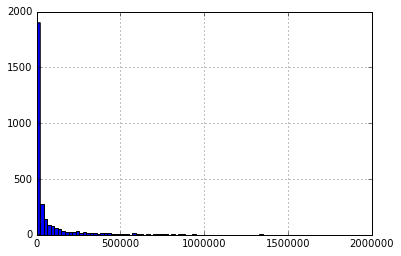

In [69]:
df_agg['num_unique_bene'].hist(bins=300)
plt.xlim(0,2000000)

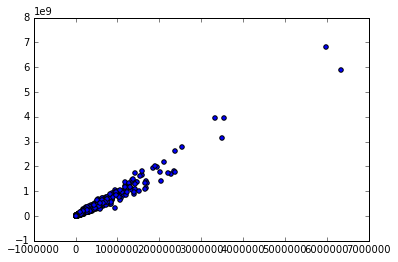

In [74]:
plt.scatter(df_agg['num_unique_bene'], df_agg['total_submitted_charges'])

In [82]:
df_agg[df_agg['total_submitted_charges']>2800000000]

num_hcpcs  num_services  num_unique_bene  \
county_fips county                                                  
4013        Maricopa        359139    27885667.6          3499948   
6037        Los Angeles     629711    46152614.6          5991823   
17031       Cook            546147    35530218.1          6337634   
36061       New York        304448    18206877.5          3338746   
48201       Harris          362190    20964411.2          3538737   

                         total_submitted_charges  total_medicare_allowed_amt  \
county_fips county                                                             
4013        Maricopa                3.144730e+09                1.360772e+09   
6037        Los Angeles             6.830780e+09                2.730312e+09   
17031       Cook                    5.881705e+09                2.111182e+09   
36061       New York                3.942714e+09                1.202521e+09   
48201       Harris                  3.938987e+09                1.240912e+09   

                         total_medicare_payment_amt  \
county_fips county                                    
4013        Maricopa                   1.033330e+09   
6037        Los Angeles                2.093957e+09   
17031       Cook                       1.601108e+09   
36061       New York                   9.211079e+08   
48201       Harris                     9.402302e+08   

                         total_drug_submitted_charges  \
county_fips county                                      
4013        Maricopa                     3.767016e+08   
6037        Los Angeles                  5.761719e+08   
17031       Cook                         5.444538e+08   
36061       New York                     1.701899e+08   
48201       Harris                       3.637955e+08   

                         total_drug_medicare_allowed_amt  \
county_fips county                                         
4013        Maricopa                        1.954453e+08   
6037        Los Angeles                     2.394802e+08   
17031       Cook                            2.247927e+08   
36061       New York                        9.379544e+07   
48201       Harris                          1.487715e+08   

                         total_drug_medicare_payment_amt  \
county_fips county                                         
4013        Maricopa                        1.522197e+08   
6037        Los Angeles                     1.883756e+08   
17031       Cook                            1.759619e+08   
36061       New York                        7.379399e+07   
48201       Harris                          1.149723e+08   

                         num_hcpcs_associated_med_srvc       ...        \
county_fips county                                           ...         
4013        Maricopa                            293767       ...         
6037        Los Angeles                         521296       ...         
17031       Cook                                463997       ...         
36061       New York                            252178       ...         
48201       Harris                              306944       ...         

                         num_heart_failure  num_hypertension  \
county_fips county                                             
4013        Maricopa             751328.15        2385625.45   
6037        Los Angeles         1917220.96        4252735.21   
17031       Cook                2040055.44        4539861.09   
36061       New York             956329.85        2252974.28   
48201       Harris              1185219.59        2563193.13   

                         num_ischemic_heart  num_osteoporosis  \
county_fips county                                              
4013        Maricopa             1417769.69         344458.89   
6037        Los Angeles          3001307.85         847834.78   
17031       Cook                 2930718.52         687762.86   
36061       New York             1649807.37         435765.

In [83]:
df_ranks = pd.read_csv('../data/county_health_ranks.csv')

In [85]:
df_ranks.head()

FIPS    State   County  Z-Score Rank  Z-Score.1 Rank.1    zip  county_fip
0  1001  Alabama  Autauga -0.60225   15  -0.503973      9  36006        1001
1  1001  Alabama  Autauga -0.60225   15  -0.503973      9  36003        1001
2  1001  Alabama  Autauga -0.60225   15  -0.503973      9  36067        1001
3  1001  Alabama  Autauga -0.60225   15  -0.503973      9  36066        1001
4  1001  Alabama  Autauga -0.60225   15  -0.503973      9  36051        1001

In [87]:
df_ranks = pd.read_excel('../data/2013CountyHealthRankingsNationalData.xls', sheetname=1, header=1)

In [88]:
df_ranks.head()

FIPS    State   County   Z-Score Rank  Z-Score.1 Rank.1
0  1000  Alabama      NaN       NaN  NaN        NaN    NaN
1  1001  Alabama  Autauga -0.602250   15  -0.503973      9
2  1003  Alabama  Baldwin -1.352926    2  -0.803070      4
3  1005  Alabama  Barbour -0.029855   33   0.388564     57
4  1007  Alabama     Bibb  0.638328   53   0.291682     52

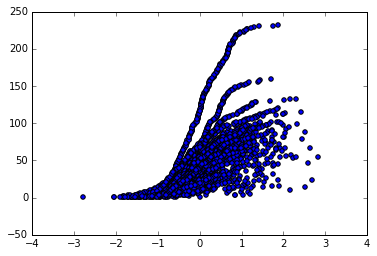

In [89]:
plt.scatter(df_ranks['Z-Score'], df_ranks['Rank'])

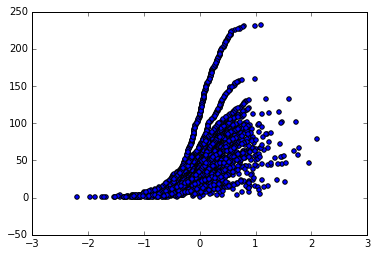

In [90]:
plt.scatter(df_ranks['Z-Score.1'], df_ranks['Rank.1'])

z-scores/ranks for outcomes and factors rankings are per state (sheet 1)

In [114]:
df_full_ranks = pd.read_excel('../data/Copy of 2013CountyHealthRankingsNationalData.xlsx', sheetname=3, header=[0,1])

In [115]:
df_full_ranks.shape

(3192, 56)

In [116]:
df_full_ranks.columns.values

array([ (u'*Data for measures with an asterisk should not be compared with prior years due to changes in definition.', u'State'),
       (u'*Data for measures with an asterisk should not be compared with prior years due to changes in definition.', u'County'),
       (u'Premature death (Years of Potential Life Lost)', u'YPLL Rate'),
       (u'Premature death (Years of Potential Life Lost)', u'Z-Score'),
       (u'Poor or fair health', u'% Fair/Poor'),
       (u'Poor or fair health', u'Z-Score'),
       (u'Poor physical health days', u'Physically Unhealthy Days'),
       (u'Poor physical health days', u'Z-Score'),
       (u'Poor mental health days', u'Mentally Unhealthy Days'),
       (u'Poor mental health days', u'Z-Score'),
       (u'Low Birth Weight', u'% LBW'), (u'Low Birth Weight', u'Z-Score'),
       (u'Smokers', u'% Smokers'), (u'Smokers', u'Z-Score'),
       (u'Adult obesity', u'% Obese'), (u'Adult obesity', u'Z-Score'),
       (u'Physical inactivity', u'% Physically Inactive'),


In [117]:
df_full_ranks.columns = ['_'.join(col).strip() for col in df_full_ranks.columns.values]

In [118]:
for i in df_full_ranks.columns:
    print i

*Data for measures with an asterisk should not be compared with prior years due to changes in definition._State
*Data for measures with an asterisk should not be compared with prior years due to changes in definition._County
Premature death (Years of Potential Life Lost)_YPLL Rate
Premature death (Years of Potential Life Lost)_Z-Score
Poor or fair health_% Fair/Poor
Poor or fair health_Z-Score
Poor physical health days_Physically Unhealthy Days
Poor physical health days_Z-Score
Poor mental health days_Mentally Unhealthy Days
Poor mental health days_Z-Score
Low Birth Weight_% LBW
Low Birth Weight_Z-Score
Smokers_% Smokers
Smokers_Z-Score
Adult obesity_% Obese
Adult obesity_Z-Score
Physical inactivity_% Physically Inactive
Physical inactivity_Z-Score
Excessive Drinking_% Excessive Drinking
Excessive Drinking_Z-Score
Motor Vehicle Mortality_MV Mortality Rate
Motor Vehicle Mortality_Z-Score
Sexually Transmitted Diseases_Chlamydia Rate
Sexually Transmitted Diseases_Z-Score
Teen Birth Rate_T

In [109]:
df_full_ranks.head()

*Data for measures with an asterisk should not be compared with prior years due to changes in definition._State  \
1000                                            Alabama                                                                
1001                                            Alabama                                                                
1003                                            Alabama                                                                
1005                                            Alabama                                                                
1007                                            Alabama                                                                

     *Data for measures with an asterisk should not be compared with prior years due to changes in definition._County  \
1000                                                NaN                                                                 
1001                                            Autauga                                                                 
1003                                            Baldwin                                                                 
1005                                            Barbour                                                                 
1007                                               Bibb                                                                 

      Premature death (Years of Potential Life Lost)_Deaths  \
1000                                              70721       
1001                                                729       
1003                                               2325       
1005                                                422       
1007                                                390       

      Premature death (Years of Potential Life Lost)_YPLL Rate  \
1000                                            9608.90          
1001                                            8376.42          
1003                                            7770.16          
1005                                            9458.14          
1007                                           11543.90          

      Premature death (Years of Potential Life Lost)_95% CI - Low  \
1000                                           9509.469             
1001                                           7522.076             
1003                                           7291.646             
1005                                           8107.935             
1007                                           9945.206             

      Premature death (Years of Potential Life Lost)_95% CI - High  \
1000                                           9708.331              
1001                                           9230.764              
1003                                           8248.674              
1005                                          10808.345              
1007                                          13142.594              

      Premature death (Years of Potential Life Lost)_Z-Score  \
1000                                                NaN        
1001                                          -1.135994        
1003                                          -1.474250        
1005                                          -0.532461        
1007                                           0.631264        

      Poor or fair health_Sample Size  Poor or fair health_% Fair/Poor  \
1000                            41125                             20.1   
1001                              383                             23.2   
1003                             1526                             12.5   
1005                              377                             22.4   
1007                              330                             21.0   

      Poor or fair health_95% CI - Low              ...                \
1000                              19.6    

In [128]:
df_full_ranks.rename(columns={'*Data for measures with an asterisk should not be compared with prior years due to changes in definition._State': 'state'}, inplace=True)
df_full_ranks.rename(columns={'*Data for measures with an asterisk should not be compared with prior years due to changes in definition._County': 'county'}, inplace=True)

In [129]:
df_full_ranks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3192 entries, 1000 to 56045
Data columns (total 56 columns):
state                                                                          3192 non-null object
county                                                                         3141 non-null object
Premature death (Years of Potential Life Lost)_YPLL Rate                       3038 non-null float64
Premature death (Years of Potential Life Lost)_Z-Score                         3053 non-null float64
Poor or fair health_% Fair/Poor                                                2794 non-null float64
Poor or fair health_Z-Score                                                    3053 non-null float64
Poor physical health days_Physically Unhealthy Days                            2948 non-null float64
Poor physical health days_Z-Score                                              3053 non-null float64
Poor mental health days_Mentally Unhealthy Days                                2913

In [138]:
def norm_agg_payments(df):
    """
    Takes pandas df of county aggregated data and normalizes/cleans necessary columns (by unique_bene)
    """

    sum_cols = ['num_hcpcs',
                'num_services',
                'total_submitted_charges',
                'total_medicare_allowed_amt',
                'total_medicare_payment_amt',
                #'num_hcpcs_associated_drug_srvc',
                #'num_drug_srvc',
                #'num_unique_bene_with_drug_srvc',
                'total_drug_submitted_charges', 
                'total_drug_medicare_allowed_amt',
                'total_drug_medicare_payment_amt',
                'num_hcpcs_associated_med_srvc',
                'num_med_srvc', 
                'num_unique_bene_with_med_srvc', 
                'total_med_submitted_charges',
                'total_med_medicare_allowed_amt', 
                'total_med_medicare_payment_amt',
                'num_bene_le65',
                'num_bene_65to74',
                'num_bene_75to84',
                'num_bene_ge84', 
                'num_female', 
                'num_male',
                'num_non_his_white',
                'num_african_american',
                'num_asian',
                'num_hispanic', 
                'num_american_indian', 
                #'num_no_race',
                'num_asthma', 
                'num_alzheimers_dementia',
                'num_artrial_fibrillation',
                'num_cancer',
                'num_chronic_obstructive_pulmonary',
                'num_depression',
                'num_diabetes',
                'num_heart_failure',
                'num_hypertension',
                'num_ischemic_heart',
                'num_osteoporosis',
                'num_rheumatoid_arthritis_osteoarthirtis',
                'num_schizophrenia_psychotic',
                'num_stroke',
                'total_age',
                'total_hcc_risk'
                ]
    for name in sum_cols:
        df['{}_norm'.format(name)] = df[name].divide(df['num_unique_bene']) 

In [140]:
norm_agg_payments(df_agg)

In [141]:
df_agg.columns

Index([u'num_hcpcs', u'num_services', u'num_unique_bene',
       u'total_submitted_charges', u'total_medicare_allowed_amt',
       u'total_medicare_payment_amt', u'total_drug_submitted_charges',
       u'total_drug_medicare_allowed_amt', u'total_drug_medicare_payment_amt',
       u'num_hcpcs_associated_med_srvc', u'num_med_srvc',
       u'num_unique_bene_with_med_srvc', u'total_med_submitted_charges',
       u'total_med_medicare_allowed_amt', u'total_med_medicare_payment_amt',
       u'num_bene_le65', u'num_bene_65to74', u'num_bene_75to84',
       u'num_bene_ge84', u'num_female', u'num_male', u'num_non_his_white',
       u'num_african_american', u'num_asian', u'num_hispanic',
       u'num_american_indian', u'num_asthma', u'num_alzheimers_dementia',
       u'num_artrial_fibrillation', u'num_cancer',
       u'num_chronic_obstructive_pulmonary', u'num_depression',
       u'num_diabetes', u'num_heart_failure', u'num_hypertension',
       u'num_ischemic_heart', u'num_osteoporosis',
       u

In [142]:
df_agg.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3050 entries, (1001, Autauga) to (56045, Weston)
Data columns (total 84 columns):
num_hcpcs                                       3050 non-null int64
num_services                                    3050 non-null float64
num_unique_bene                                 3050 non-null int64
total_submitted_charges                         3050 non-null float64
total_medicare_allowed_amt                      3050 non-null float64
total_medicare_payment_amt                      3050 non-null float64
total_drug_submitted_charges                    3033 non-null float64
total_drug_medicare_allowed_amt                 3033 non-null float64
total_drug_medicare_payment_amt                 3033 non-null float64
num_hcpcs_associated_med_srvc                   3033 non-null float64
num_med_srvc                                    3033 non-null float64
num_unique_bene_with_med_srvc                   3033 non-null float64
total_med_submitted_charges     

In [144]:
df_agg.head()

num_hcpcs  num_services  num_unique_bene  \
county_fips county                                              
1001        Autauga       2057      120187.0            20422   
1003        Baldwin      19299     1163082.5           175932   
1005        Barbour       1232       66673.0            10459   
1007        Bibb           230        7221.0             1863   
1009        Blount         751       28179.0             6268   

                     total_submitted_charges  total_medicare_allowed_amt  \
county_fips county                                                         
1001        Autauga             1.145194e+07                  5956382.03   
1003        Baldwin             1.266541e+08                 55270877.03   
1005        Barbour             6.497972e+06                  3083129.17   
1007        Bibb                4.401974e+05                   324498.09   
1009        Blount              3.236438e+06                  1375023.41   

                     total_medicare_payment_amt  total_drug_submitted_charges  \
county_fips county                                                              
1001        Autauga                  4324099.62                     244226.92   
1003        Baldwin                 41193530.17                   10607775.70   
1005        Barbour                  2230230.81                     118654.44   
1007        Bibb                      223085.76                       2457.00   
1009        Blount                    994906.69                      43170.07   

                     total_drug_medicare_allowed_amt  \
county_fips county                                     
1001        Autauga                         73437.42   
1003        Baldwin                       5245876.44   
1005        Barbour                         47520.71   
1007        Bibb                             1977.55   
1009        Blount                          17335.15   

                     total_drug_medicare_payment_amt  \
county_fips county                                     
1001        Autauga                         62030.85   
1003        Baldwin                       4107579.47   
1005        Barbour                         42734.62   
1007        Bibb                             1922.51   
1009        Blount                          16080.00   

                     num_hcpcs_associated_med_srvc         ...           \
county_fips county                                         ...            
1001        Autauga                           1661         ...            
1003        Baldwin                          15949         ...            
1005        Barbour                           1001         ...            
1007        Bibb                               150         ...            
1009        Blount                             554         ...            

                     num_diabetes_norm  num_heart_failure_norm  \
county_fips county                                               
1001        Autauga           0.378132                0.234742   
1003        Baldwin           0.306459                0.206900   
1005        Barbour           0.388831                0.174367   
1007        Bibb              0.380612                0.216608   
1009        Blount            0.375330                0.266669   

                     num_hypertension_norm  num_ischemic_heart_norm  \
county_fips county                                                    
1001        Autauga               0.699302                 0.375258   
1003        Baldwin               0.715701                 0.431138   
1005        Barbour               0.725549                 0.310711   
1007        Bibb                  0.738352                 0.299656   
1009        Blount                0.733709                 0.428669   

                     num_osteoporosis_norm  \
county_fips county                           
1001        Autauga               0.069710   
1003        Baldwin               0.078749   
1005   

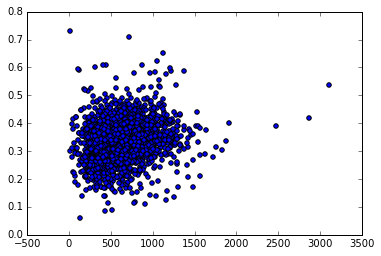

In [145]:
plt.scatter(df_agg['total_submitted_charges_norm'], df_agg['num_diabetes_norm'])

(array([  14.,   24.,   42.,   82.,  140.,  179.,  244.,  302.,  325.,
         326.,  311.,  257.,  210.,  172.,  111.,   86.,   64.,   38.,
          28.,   36.,   18.,   10.,    7.,    5.,    6.,    3.,    1.,
           1.,    1.,    1.,    2.,    0.,    0.,    1.,    0.,    0.,
           0.,    0.,    0.,    1.,    0.,    0.,    0.,    0.,    0.,
           0.,    1.,    0.,    0.,    1.]),
 array([   15.13636364,    77.00385685,   138.87135006,   200.73884327,
          262.60633648,   324.47382969,   386.3413229 ,   448.20881611,
          510.07630932,   571.94380253,   633.81129574,   695.67878895,
          757.54628216,   819.41377537,   881.28126858,   943.14876179,
         1005.016255  ,  1066.88374821,  1128.75124142,  1190.61873463,
         1252.48622784,  1314.35372105,  1376.22121426,  1438.08870747,
         1499.95620068,  1561.82369389,  1623.6911871 ,  1685.55868031,
         1747.42617352,  1809.29366673,  1871.16115994,  1933.02865315,
         1994.89614636, 

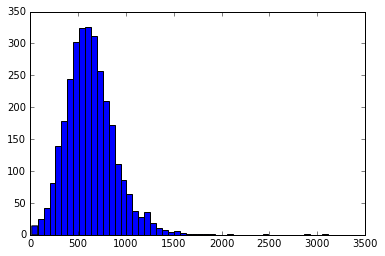

In [147]:
plt.hist(df_agg['total_submitted_charges_norm'], bins=50)

In [151]:
disease_norm = ['num_asthma', 
                'num_alzheimers_dementia',
                'num_artrial_fibrillation',
                'num_cancer',
                'num_chronic_obstructive_pulmonary',
                'num_depression',
                'num_diabetes',
                'num_heart_failure',
                'num_hypertension',
                'num_ischemic_heart',
                'num_osteoporosis',
                'num_rheumatoid_arthritis_osteoarthirtis',
                'num_schizophrenia_psychotic',
                'num_stroke',
                'total_age',
                'total_hcc_risk']

In [152]:
for i, name in enumerate(disease_norm):
    disease_norm[i] = '{}_norm'.format(name)

In [153]:
disease_norm

['num_asthma_norm',
 'num_alzheimers_dementia_norm',
 'num_artrial_fibrillation_norm',
 'num_cancer_norm',
 'num_chronic_obstructive_pulmonary_norm',
 'num_depression_norm',
 'num_diabetes_norm',
 'num_heart_failure_norm',
 'num_hypertension_norm',
 'num_ischemic_heart_norm',
 'num_osteoporosis_norm',
 'num_rheumatoid_arthritis_osteoarthirtis_norm',
 'num_schizophrenia_psychotic_norm',
 'num_stroke_norm',
 'total_age_norm',
 'total_hcc_risk_norm']

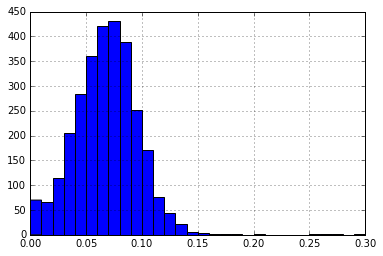

In [158]:
df_agg['num_asthma_norm'].hist(bins=30)

AttributeError: max must be larger than min in range parameter.

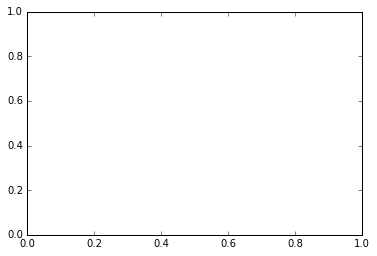

In [156]:
plt.hist(df_agg['num_asthma_norm'])

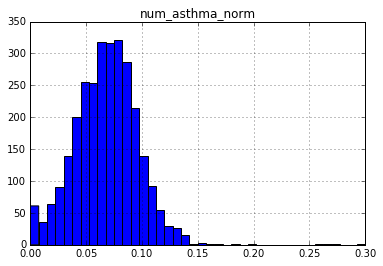

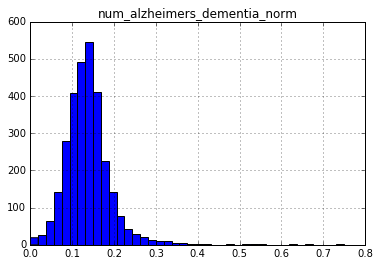

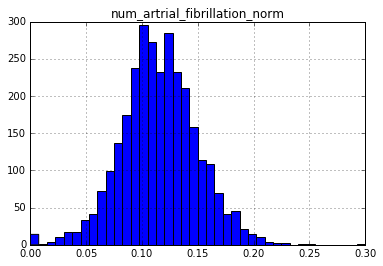

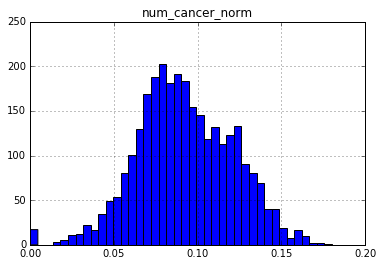

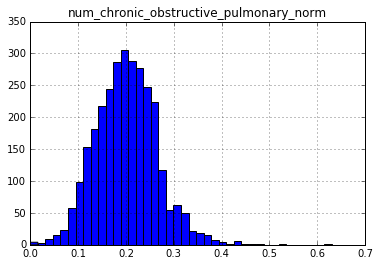

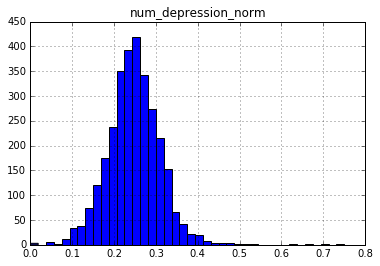

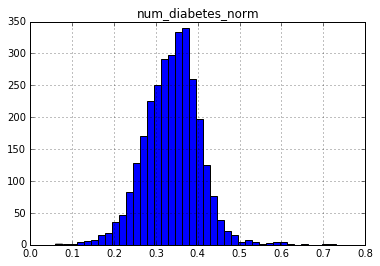

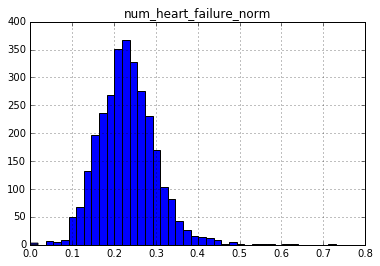

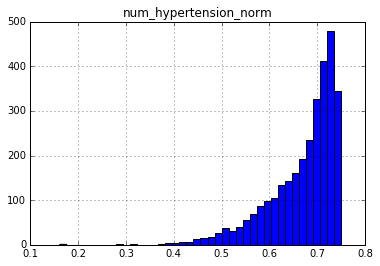

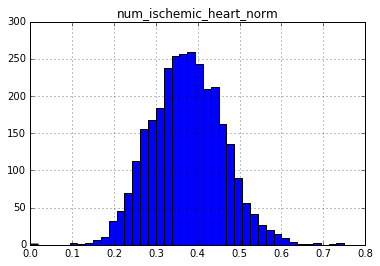

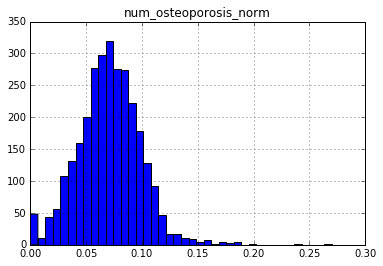

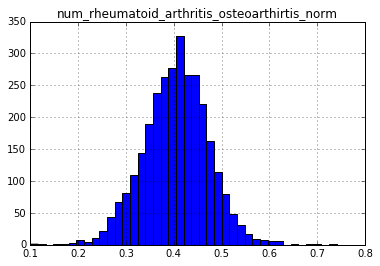

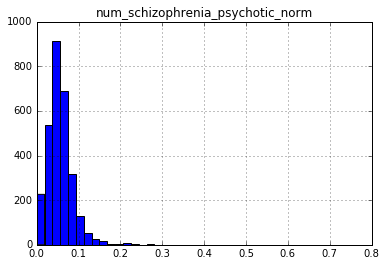

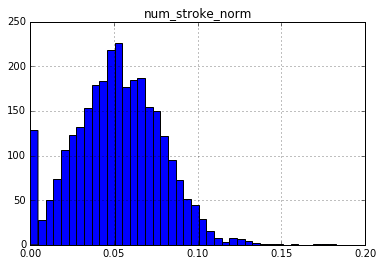

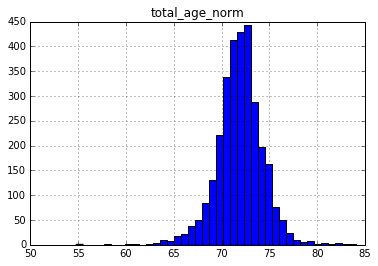

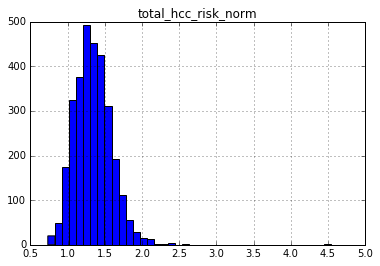

In [161]:
for i in disease_norm:
    df_agg[i].hist(bins=40)
    plt.title(i)
    plt.show()

In [163]:
from pandas.tools.plotting import scatter_matrix

In [164]:
disease_norm.append('total_submitted_charges')

In [170]:
len(disease_norm)

17

In [172]:
scatter_list_1 = disease_norm[0:8]
scatter_list_2 = disease_norm[8:17]

In [173]:
scatter_list_1.append('total_submitted_charges_norm')

In [175]:
scatter_list_2[-1] = 'total_submitted_charges_norm'

In [176]:
scatter_list_1

['num_asthma_norm',
 'num_alzheimers_dementia_norm',
 'num_artrial_fibrillation_norm',
 'num_cancer_norm',
 'num_chronic_obstructive_pulmonary_norm',
 'num_depression_norm',
 'num_diabetes_norm',
 'num_heart_failure_norm',
 'total_submitted_charges_norm']

In [177]:
scatter_list_2

['num_hypertension_norm',
 'num_ischemic_heart_norm',
 'num_osteoporosis_norm',
 'num_rheumatoid_arthritis_osteoarthirtis_norm',
 'num_schizophrenia_psychotic_norm',
 'num_stroke_norm',
 'total_age_norm',
 'total_hcc_risk_norm',
 'total_submitted_charges_norm']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f331fa06c50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f33191749d0>]], dtype=object)

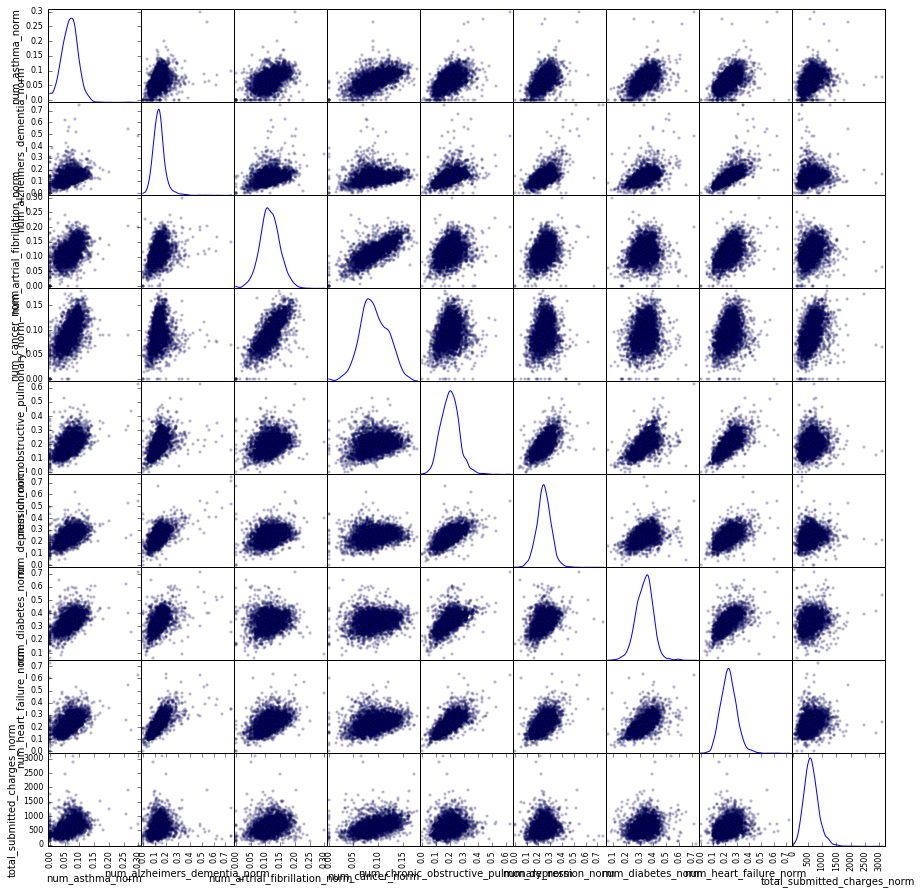

In [179]:
scatter_matrix(df_agg[scatter_list_1], alpha=0.2, figsize=(15, 15), diagonal='kde')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f331b842410>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f3315ef75d0>]], dtype=object)

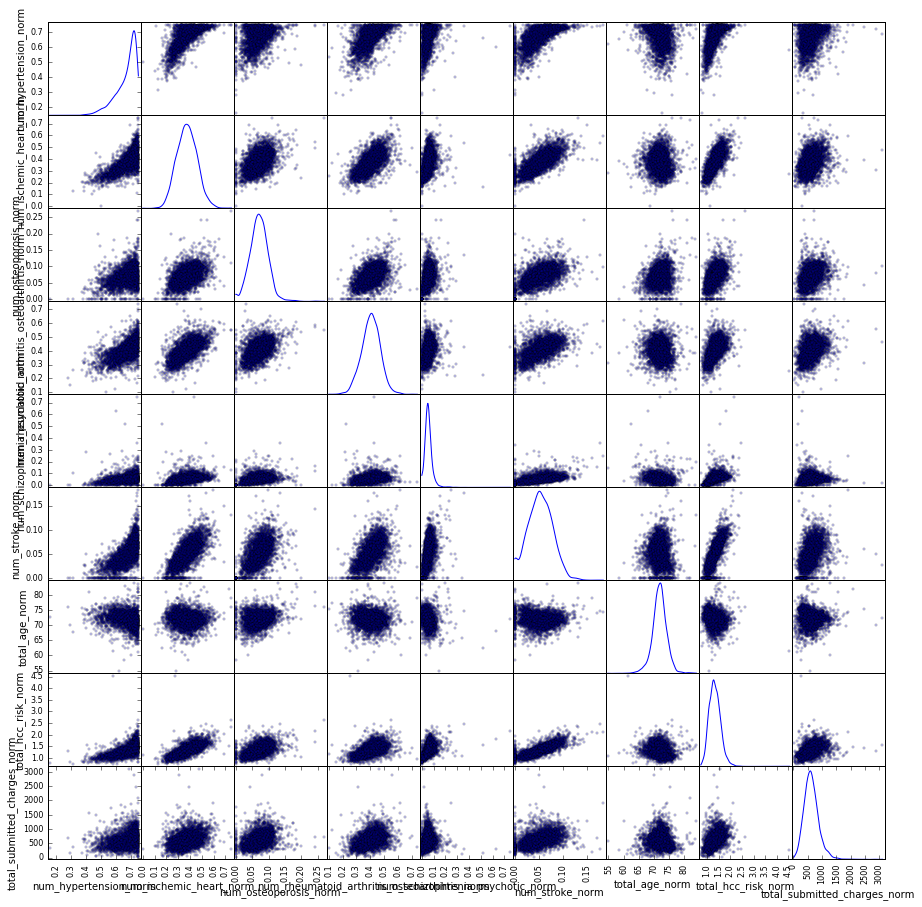

In [180]:
scatter_matrix(df_agg[scatter_list_2], alpha=0.2, figsize=(15, 15), diagonal='kde')

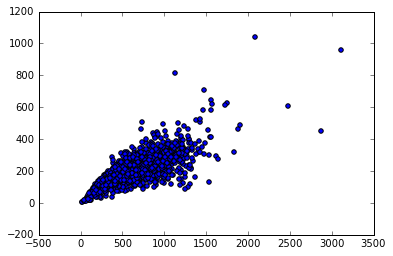

In [181]:
plt.scatter(df_agg['total_submitted_charges_norm'], df_agg['total_medicare_payment_amt_norm'])

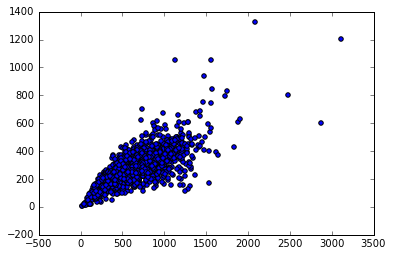

In [182]:
plt.scatter(df_agg['total_submitted_charges_norm'], df_agg['total_medicare_allowed_amt_norm'])

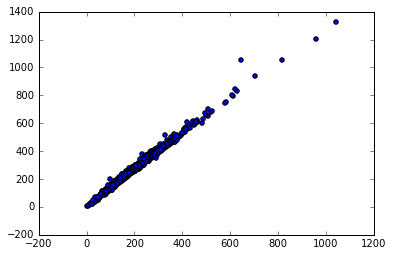

In [183]:
plt.scatter(df_agg['total_medicare_payment_amt_norm'], df_agg['total_medicare_allowed_amt_norm'])

In [185]:
for i in df_agg.columns:
    print "'{}'".format(i)

'num_hcpcs'
'num_services'
'num_unique_bene'
'total_submitted_charges'
'total_medicare_allowed_amt'
'total_medicare_payment_amt'
'total_drug_submitted_charges'
'total_drug_medicare_allowed_amt'
'total_drug_medicare_payment_amt'
'num_hcpcs_associated_med_srvc'
'num_med_srvc'
'num_unique_bene_with_med_srvc'
'total_med_submitted_charges'
'total_med_medicare_allowed_amt'
'total_med_medicare_payment_amt'
'num_bene_le65'
'num_bene_65to74'
'num_bene_75to84'
'num_bene_ge84'
'num_female'
'num_male'
'num_non_his_white'
'num_african_american'
'num_asian'
'num_hispanic'
'num_american_indian'
'num_asthma'
'num_alzheimers_dementia'
'num_artrial_fibrillation'
'num_cancer'
'num_chronic_obstructive_pulmonary'
'num_depression'
'num_diabetes'
'num_heart_failure'
'num_hypertension'
'num_ischemic_heart'
'num_osteoporosis'
'num_rheumatoid_arthritis_osteoarthirtis'
'num_schizophrenia_psychotic'
'num_stroke'
'county_fips'
'total_age'
'total_hcc_risk'
'num_hcpcs_norm'
'num_services_norm'
'total_submitted_charg

In [186]:
df_full_ranks.columns

Index([                                                                      u'state',
                                                                            u'county',
                          u'Premature death (Years of Potential Life Lost)_YPLL Rate',
                            u'Premature death (Years of Potential Life Lost)_Z-Score',
                                                   u'Poor or fair health_% Fair/Poor',
                                                       u'Poor or fair health_Z-Score',
                               u'Poor physical health days_Physically Unhealthy Days',
                                                 u'Poor physical health days_Z-Score',
                                   u'Poor mental health days_Mentally Unhealthy Days',
                                                   u'Poor mental health days_Z-Score',
                                                            u'Low Birth Weight_% LBW',
                                           

In [188]:
for i in df_full_ranks.columns:
    print "'{}',".format(i)

'state',
'county',
'Premature death (Years of Potential Life Lost)_YPLL Rate',
'Premature death (Years of Potential Life Lost)_Z-Score',
'Poor or fair health_% Fair/Poor',
'Poor or fair health_Z-Score',
'Poor physical health days_Physically Unhealthy Days',
'Poor physical health days_Z-Score',
'Poor mental health days_Mentally Unhealthy Days',
'Poor mental health days_Z-Score',
'Low Birth Weight_% LBW',
'Low Birth Weight_Z-Score',
'Smokers_% Smokers',
'Smokers_Z-Score',
'Adult obesity_% Obese',
'Adult obesity_Z-Score',
'Physical inactivity_% Physically Inactive',
'Physical inactivity_Z-Score',
'Excessive Drinking_% Excessive Drinking',
'Excessive Drinking_Z-Score',
'Motor Vehicle Mortality_MV Mortality Rate',
'Motor Vehicle Mortality_Z-Score',
'Sexually Transmitted Diseases_Chlamydia Rate',
'Sexually Transmitted Diseases_Z-Score',
'Teen Birth Rate_Teen Birth Rate',
'Teen Birth Rate_Z-Score',
'Uninsured_% Uninsured',
'Uninsured_Z-Score',
'Primary Care_PCP Ratio',
'Primary Care_Z-Score',

In [189]:
df_full_ranks.to_csv('../data/copyof2013countyhealthranks.csv')

In [220]:
def create_health_set(df_payments, df_county_ranks):
    pay_cols = ['county_fips',
                'num_hcpcs_norm',
                'num_services_norm',
                'total_submitted_charges_norm',
                'total_medicare_payment_amt_norm',
                'total_drug_submitted_charges_norm',
                'total_drug_medicare_payment_amt_norm',
                'num_hcpcs_associated_med_srvc_norm',
                'num_med_srvc_norm',
                'total_med_submitted_charges_norm',
                'total_med_medicare_payment_amt_norm',
                'num_asthma_norm',
                'num_alzheimers_dementia_norm',
                'num_artrial_fibrillation_norm',
                'num_cancer_norm',
                'num_chronic_obstructive_pulmonary_norm',
                'num_depression_norm',
                'num_diabetes_norm',
                'num_heart_failure_norm',
                'num_hypertension_norm',
                'num_ischemic_heart_norm',
                'num_osteoporosis_norm',
                'num_rheumatoid_arthritis_osteoarthirtis_norm',
                'num_schizophrenia_psychotic_norm',
                'num_stroke_norm',
                'total_hcc_risk_norm',
                ]

    ranks_cols =    [  
                    'county',
                    'Poor or fair health_% Fair/Poor',
                    'Poor mental health days_Mentally Unhealthy Days',
                    'Smokers_% Smokers',
                    'Adult obesity_% Obese',
                    'Physical inactivity_% Physically Inactive',
                    'Excessive Drinking_% Excessive Drinking',
                    'Uninsured_% Uninsured',
                    'Preventable hospital stays (Ambulatory Care Sensitive Conditions)_ACSC Rate'
                    ]

    return pd.merge(df_payments[pay_cols], df_county_ranks[ranks_cols], left_index=True, right_index=True)

In [213]:
df_health

county_fips  num_hcpcs_norm  num_services_norm  \
county_fips county                                                             
1029        Cleburne                 5145        0.056364           4.928182   
1037        Coosa                    1037        0.307692           8.118881   
1085        Lowndes                  1085        0.136364           1.272727   
2068        Denali                   2068        0.395480           2.418079   
2185        North Slope              2185        0.078947           5.921053   
5013        Calhoun                  5013        0.103665           5.370681   
5025        Cleveland                5025        0.100000           3.477778   
5073        Lafayette                5073        0.020086           4.143472   
5101        Newton                   5101        0.141026           1.089744   
6003        Alpine                   6003        0.363636           2.590909   
8009        Baca                    40045        0.144708           5.386609   
8011        Bent                    24033        0.140449           3.005618   
8061        Kiowa                    8061        0.500000           3.785714   
12043       Glades                  12043        0.047923           1.198083   
13149       Heard                   13149        0.208955           1.492537   
13209       Montgomery              13209        0.097561           3.536585   
13231       Pike                    13231        0.177778           5.051852   
13259       Stewart                 13259        0.125714           8.120000   
13265       Taliaferro              13265        0.162393           2.726496   
13289       Twiggs                  13289        0.432836           1.298507   
13315       Wilcox                  13315        0.188679           5.410377   
16015       Boise                   48045        0.225100           6.412351   
16025       Camas                   16025        0.301887           4.226415   
17047       Edwards                 51141        0.062622           6.713633   
17071       Henderson               17071        0.017544           7.587719   
19173       Taylor                  19173        0.039216           9.019608   
19195       Worth                   19195        0.012500           7.100000   
20039       Decatur                 20039        0.009524           8.238095   
20101       Lane                    20101        0.533333           5.533333   
20197       Wabaunsee               20197        0.141129           5.181452   
...                                   ...             ...                ...   
46063       Harding                 46063        0.662162           7.621622   
46069       Hyde                    46069        0.365385           2.961538   
46075       Jones                   46075        0.283582           6.194030   
46095       Mellette                46095        0.218750           2.989583   
46111       Sanborn                 46111        0.303571           4.089286   
46117       Stanley                 46117        0.309524           4.559524   
46119       Sully                   46119        0.201031           4.546392   
48009       Archer                  48009        0.046016           1.843996   
48087       Collingsworth           48087        0.157576           1.496970   
48125       Dickens                 48125        0.345714           5.997143   
48129       Donley                  48129        0.125541           6.452381   
48131       Duval                   48131        0.232143           1.892857   
48137       Edwards                 48137        0.069061          10.676796   
48175       Goliad                  48175        0.102389           2.409556   
48235       Irion                   48235        0.042984           1.386852   
48243       Jeff Davis              48243        0.233954           8.604555   
48247       Jim Hogg                48247        0.069565           4.217391   
48319       Mason             

In [216]:
for i in df_full_ranks.index:
    print i

1000
1001
1003
1005
1007
1009
1011
1013
1015
1017
1019
1021
1023
1025
1027
1029
1031
1033
1035
1037
1039
1041
1043
1045
1047
1049
1051
1053
1055
1057
1059
1061
1063
1065
1067
1069
1071
1073
1075
1077
1079
1081
1083
1085
1087
1089
1091
1093
1095
1097
1099
1101
1103
1105
1107
1109
1111
1113
1115
1117
1119
1121
1123
1125
1127
1129
1131
1133
2000
2013
2016
2020
2050
2060
2068
2070
2090
2100
2110
2122
2130
2150
2164
2170
2180
2185
2188
2201
2220
2232
2240
2261
2270
2280
2282
2290
4000
4001
4003
4005
4007
4009
4011
4012
4013
4015
4017
4019
4021
4023
4025
4027
5000
5001
5003
5005
5007
5009
5011
5013
5015
5017
5019
5021
5023
5025
5027
5029
5031
5033
5035
5037
5039
5041
5043
5045
5047
5049
5051
5053
5055
5057
5059
5061
5063
5065
5067
5069
5071
5073
5075
5077
5079
5081
5083
5085
5087
5089
5091
5093
5095
5097
5099
5101
5103
5105
5107
5109
5111
5113
5115
5117
5119
5121
5123
5125
5127
5129
5131
5133
5135
5137
5139
5141
5143
5145
5147
5149
6000
6001
6003
6005
6007
6009
6011
6013
6015
6017
6019
6021


In [218]:
df_agg.head()

num_hcpcs  num_services  num_unique_bene  \
county_fips county                                              
1001        Autauga       2057      120187.0            20422   
1003        Baldwin      19299     1163082.5           175932   
1005        Barbour       1232       66673.0            10459   
1007        Bibb           230        7221.0             1863   
1009        Blount         751       28179.0             6268   

                     total_submitted_charges  total_medicare_allowed_amt  \
county_fips county                                                         
1001        Autauga             1.145194e+07                  5956382.03   
1003        Baldwin             1.266541e+08                 55270877.03   
1005        Barbour             6.497972e+06                  3083129.17   
1007        Bibb                4.401974e+05                   324498.09   
1009        Blount              3.236438e+06                  1375023.41   

                     total_medicare_payment_amt  total_drug_submitted_charges  \
county_fips county                                                              
1001        Autauga                  4324099.62                     244226.92   
1003        Baldwin                 41193530.17                   10607775.70   
1005        Barbour                  2230230.81                     118654.44   
1007        Bibb                      223085.76                       2457.00   
1009        Blount                    994906.69                      43170.07   

                     total_drug_medicare_allowed_amt  \
county_fips county                                     
1001        Autauga                         73437.42   
1003        Baldwin                       5245876.44   
1005        Barbour                         47520.71   
1007        Bibb                             1977.55   
1009        Blount                          17335.15   

                     total_drug_medicare_payment_amt  \
county_fips county                                     
1001        Autauga                         62030.85   
1003        Baldwin                       4107579.47   
1005        Barbour                         42734.62   
1007        Bibb                             1922.51   
1009        Blount                          16080.00   

                     num_hcpcs_associated_med_srvc         ...           \
county_fips county                                         ...            
1001        Autauga                           1661         ...            
1003        Baldwin                          15949         ...            
1005        Barbour                           1001         ...            
1007        Bibb                               150         ...            
1009        Blount                             554         ...            

                     num_diabetes_norm  num_heart_failure_norm  \
county_fips county                                               
1001        Autauga           0.378132                0.234742   
1003        Baldwin           0.306459                0.206900   
1005        Barbour           0.388831                0.174367   
1007        Bibb              0.380612                0.216608   
1009        Blount            0.375330                0.266669   

                     num_hypertension_norm  num_ischemic_heart_norm  \
county_fips county                                                    
1001        Autauga               0.699302                 0.375258   
1003        Baldwin               0.715701                 0.431138   
1005        Barbour               0.725549                 0.310711   
1007        Bibb                  0.738352                 0.299656   
1009        Blount                0.733709                 0.428669   

                     num_osteoporosis_norm  \
county_fips county                           
1001        Autauga               0.069710   
1003        Baldwin               0.078749   
1005   

In [215]:
df_full_ranks.head()

state   county  \
1000  Alabama      NaN   
1001  Alabama  Autauga   
1003  Alabama  Baldwin   
1005  Alabama  Barbour   
1007  Alabama     Bibb   

      Premature death (Years of Potential Life Lost)_YPLL Rate  \
1000                                            9608.90          
1001                                            8376.42          
1003                                            7770.16          
1005                                            9458.14          
1007                                           11543.90          

      Premature death (Years of Potential Life Lost)_Z-Score  \
1000                                                NaN        
1001                                          -1.135994        
1003                                          -1.474250        
1005                                          -0.532461        
1007                                           0.631264        

      Poor or fair health_% Fair/Poor  Poor or fair health_Z-Score  \
1000                             20.1                          NaN   
1001                             23.2                     0.129710   
1003                             12.5                    -2.066956   
1005                             22.4                    -0.034527   
1007                             21.0                    -0.321941   

      Poor physical health days_Physically Unhealthy Days  \
1000                                                4.2     
1001                                                5.1     
1003                                                3.3     
1005                                                5.0     
1007                                                5.0     

      Poor physical health days_Z-Score  \
1000                                NaN   
1001                           0.723826   
1003                          -1.552725   
1005                           0.597351   
1007                           0.597351   

      Poor mental health days_Mentally Unhealthy Days  \
1000                                              4.1   
1001                                              4.3   
1003                                              3.8   
1005                                              4.1   
1007                                              5.3   

      Poor mental health days_Z-Score          ...           \
1000                              NaN          ...            
1001                         0.099039          ...            
1003                        -0.567959          ...            
1005                        -0.167760          ...            
1007                         1.433035          ...            

      Violent Crime Rate_Violent Crime Rate  Violent Crime Rate_Z-Score  \
1000                             426.569135                         NaN   
1001                             300.336683                   -0.301034   
1003                             214.735210                   -0.710605   
1005                             150.049428                   -1.020101   
1007                             246.497551                   -0.558634   

      Daily fine particulate matter_Average daily PM25  \
1000                                             12.85   
1001                                             13.31   
1003                                             11.80   
1005                                             12.11   
1007                                             13.68   

      Daily fine particulate matter_Z-Score  \
1000                                    NaN   
1001                               0.705718   
1003                              -1.721117   
1005                              -1.222893   
1007                               1.300373   

      Rec Facility Rate_Rec Facility Rate  Rec Facility Rate_Z-Score  \
1000                             7.293015                        NaN   
1001                             7.321046                  -0.672309   
1

In [222]:
df_agg.reset_index(level=['county'], inplace=True)


In [223]:
df_health = create_health_set(df_agg, df_full_ranks)

In [224]:
df_health.shape

(3048, 35)

In [226]:
df_health.head().T

1001       1003  \
county_fips                                             58058     406215   
num_hcpcs_norm                                       0.100725   0.109696   
num_services_norm                                     5.88517    6.61098   
total_submitted_charges_norm                          560.765    719.904   
total_medicare_payment_amt_norm                       211.737    234.145   
total_drug_submitted_charges_norm                      11.959    60.2947   
total_drug_medicare_payment_amt_norm                  3.03745    23.3475   
num_hcpcs_associated_med_srvc_norm                  0.0813339  0.0906543   
num_med_srvc_norm                                     4.23754    3.98886   
total_med_submitted_charges_norm                      498.896    602.348   
total_med_medicare_payment_amt_norm                   184.268    191.955   
num_asthma_norm                                     0.0744002  0.0739614   
num_alzheimers_dementia_norm                         0.162002   0.146354   
num_artrial_fibrillation_norm                        0.121805   0.153738   
num_cancer_norm                                      0.116911   0.115426   
num_chronic_obstructive_pulmonary_norm                0.20612   0.181599   
num_depression_norm                                  0.224531   0.207669   
num_diabetes_norm                                    0.378132   0.306459   
num_heart_failure_norm                               0.234742     0.2069   
num_hypertension_norm                                0.699302   0.715701   
num_ischemic_heart_norm                              0.375258   0.431138   
num_osteoporosis_norm                               0.0697096  0.0787492   
num_rheumatoid_arthritis_osteoarthirtis_norm         0.407612   0.482307   
num_schizophrenia_psychotic_norm                     0.052561  0.0425755   
num_stroke_norm                                     0.0791245  0.0698717   
total_hcc_risk_norm                                   1.39606    1.26325   
county                                                Autauga    Baldwin   
Poor or fair health_% Fair/Poor                          23.2       12.5   
Poor mental health days_Mentally Unhealthy Days           4.3        3.8   
Smokers_% Smokers                                        23.5       22.6   
Adult obesity_% Obese                                    34.1       25.5   
Physical inactivity_% Physically Inactive                32.2       25.1   
Excessive Drinking_% Excessive Drinking                  16.5       18.7   
Uninsured_% Uninsured                                    13.6       19.1   
Preventable hospital stays (Ambulatory Care Sen...      70.95      56.21   

                                                         1005       1007  \
county_fips                                             28140      12084   
num_hcpcs_norm                                       0.117793   0.123457   
num_services_norm                                      6.3747    3.87601   
total_submitted_charges_norm                           621.28    236.284   
total_medicare_payment_amt_norm                       213.236    119.745   
total_drug_submitted_charges_norm                     11.3447    1.31884   
total_drug_medicare_payment_amt_norm                  4.08592    1.03194   
num_hcpcs_associated_med_srvc_norm                   0.095707  0.0805153   
num_med_srvc_norm                                      5.2047    3.56146   
total_med_submitted_charges_norm                      489.544     215.33   
total_med_medicare_payment_amt_norm                   177.985     108.06   
num_asthma_norm                                     0.0746085  0.0388674   
num_alzheimers_dementia_norm                         0.135151   0.178363   
num_artrial_fibrillation_norm                        0.084487   0.116495   
num_cancer_norm                                     0.0853581  0.0733494   
num_chronic_obstructive_pulmonary_norm               0.152603   0.164053   
num_depression_norm         

In [229]:
for i in df_health.columns:
    print "'{}',".format(i)

'county_fips',
'num_hcpcs_norm',
'num_services_norm',
'total_submitted_charges_norm',
'total_medicare_payment_amt_norm',
'total_drug_submitted_charges_norm',
'total_drug_medicare_payment_amt_norm',
'num_hcpcs_associated_med_srvc_norm',
'num_med_srvc_norm',
'total_med_submitted_charges_norm',
'total_med_medicare_payment_amt_norm',
'num_asthma_norm',
'num_alzheimers_dementia_norm',
'num_artrial_fibrillation_norm',
'num_cancer_norm',
'num_chronic_obstructive_pulmonary_norm',
'num_depression_norm',
'num_diabetes_norm',
'num_heart_failure_norm',
'num_hypertension_norm',
'num_ischemic_heart_norm',
'num_osteoporosis_norm',
'num_rheumatoid_arthritis_osteoarthirtis_norm',
'num_schizophrenia_psychotic_norm',
'num_stroke_norm',
'total_hcc_risk_norm',
'county',
'Poor or fair health_% Fair/Poor',
'Poor mental health days_Mentally Unhealthy Days',
'Smokers_% Smokers',
'Adult obesity_% Obese',
'Physical inactivity_% Physically Inactive',
'Excessive Drinking_% Excessive Drinking',
'Uninsured_% Uninsur

## Clustering

In [267]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [373]:
def cluster(df, num_clusters=4):
    #cluster_cols = [
    #                'num_asthma_norm',
    #                'num_alzheimers_dementia_norm',
    #                'num_artrial_fibrillation_norm',
    #                'num_cancer_norm',
    #                'num_chronic_obstructive_pulmonary_norm',
    #                'num_depression_norm',
    #                'num_diabetes_norm',
    #                'num_heart_failure_norm',
    #                'num_hypertension_norm',
    #                'num_ischemic_heart_norm',
    #                'num_osteoporosis_norm',
    #                'num_rheumatoid_arthritis_osteoarthirtis_norm',
    #                'num_schizophrenia_psychotic_norm',
    #                'num_stroke_norm',
    #                'total_hcc_risk_norm',
    #                'Poor or fair health_% Fair/Poor',
    #                'Poor mental health days_Mentally Unhealthy Days',
    #                'Smokers_% Smokers',
    #                'Adult obesity_% Obese',
    #                'Physical inactivity_% Physically Inactive',
    #                'Excessive Drinking_% Excessive Drinking',
    #                'Uninsured_% Uninsured',
    #                'Preventable hospital stays (Ambulatory Care Sensitive Conditions)_ACSC Rate'
    #                ]
    scale = StandardScaler()
    df_scale = scale.fit_transform(df)
    km_mod = KMeans(n_clusters = num_clusters, n_jobs=-1, random_state=13, verbose=2)
    preds = km_mod.fit_predict(df_scale)

    return km_mod, preds


In [235]:
df_health_null_fill = df_health.fillna(-1)

In [238]:
cluster_cols = [
                    'num_asthma_norm',
                    'num_alzheimers_dementia_norm',
                    'num_artrial_fibrillation_norm',
                    'num_cancer_norm',
                    'num_chronic_obstructive_pulmonary_norm',
                    'num_depression_norm',
                    'num_diabetes_norm',
                    'num_heart_failure_norm',
                    'num_hypertension_norm',
                    'num_ischemic_heart_norm',
                    'num_osteoporosis_norm',
                    'num_rheumatoid_arthritis_osteoarthirtis_norm',
                    'num_schizophrenia_psychotic_norm',
                    'num_stroke_norm',
                    'total_hcc_risk_norm',
                    'Poor or fair health_% Fair/Poor',
                    'Poor mental health days_Mentally Unhealthy Days',
                    'Smokers_% Smokers',
                    'Adult obesity_% Obese',
                    'Physical inactivity_% Physically Inactive',
                    'Excessive Drinking_% Excessive Drinking',
                    'Uninsured_% Uninsured',
                    'Preventable hospital stays (Ambulatory Care Sensitive Conditions)_ACSC Rate'
                    ]

In [279]:
mod, preds = cluster(df_health_null_fill)

Initialization complete
Initialization complete
Initialization complete
Initialization complete
Initialization complete
Initialization complete
Initialization complete
Initialization complete
Iteration  0, inertia 66845.451
Iteration  0, inertia 62304.215
Iteration  0, inertia 62696.267
Iteration  0, inertia 64517.248
Iteration  0, inertia 63135.036
Iteration  0, inertia 61656.678
Iteration  0, inertia 63603.889
Iteration  0, inertia 62727.761
Iteration  1, inertia 47155.344
Iteration  1, inertia 44168.879
Iteration  1, inertia 46049.837
Iteration  1, inertia 46113.602
Iteration  1, inertia 44566.762
Iteration  1, inertia 46246.053
Iteration  1, inertia 48202.920
Iteration  1, inertia 46786.265
Iteration  2, inertia 44529.979
Iteration  2, inertia 43164.323
Iteration  2, inertia 44418.783
Iteration  2, inertia 44858.812
Iteration  2, inertia 43748.255
Iteration  2, inertia 44908.239
Iteration  2, inertia 45377.272
Iteration  2, inertia 44461.220
Iteration  3, inertia 43696.538
Iteratio

In [280]:
preds

array([2, 0, 2, ..., 0, 0, 0], dtype=int32)

In [262]:
pca = PCA(n_components=3)

In [263]:
df_health_pca = pca.fit_transform(df_health_null_fill[cluster_cols])

In [264]:
sum(pca.explained_variance_ratio_[0:3])

0.94543464201814187

In [266]:
df_health_pca.shape

(3048, 3)

In [268]:
xs = df_health_pca[:,0]
ys = df_health_pca[:,1]
zs = df_health_pca[:,2]


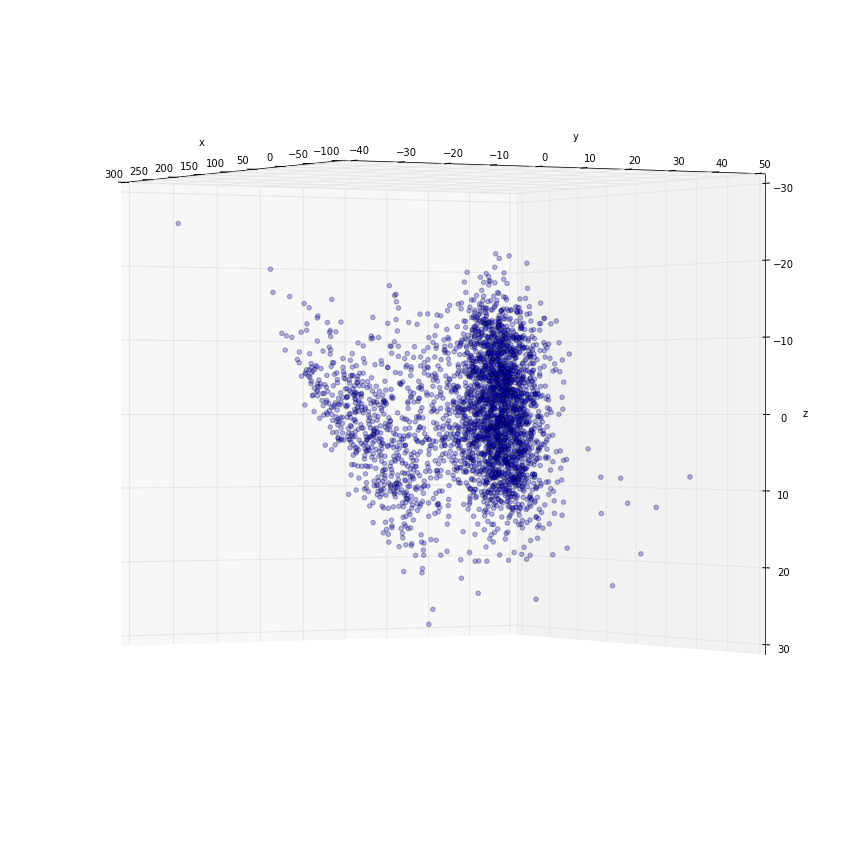

In [281]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
#plt.figure(figsize=(15,15))
#ax.set_xlim(-5000000,20000000)
#ax.set_ylim(-1000000,8000000)
#ax.set_zlim(-3000000,3000000)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.scatter(xs, ys, zs, alpha=.3)
ax.view_init(180,30)

In [416]:
def get_cluster_assignments(df, preds):
    df['predictions'] = preds
    return zip(df['county'], preds)

In [285]:
get_cluster_assignments(df_health_null_fill, preds)

[(u'Autauga', 2),
 (u'Baldwin', 0),
 (u'Barbour', 2),
 (u'Bibb', 2),
 (u'Blount', 2),
 (u'Bullock', 2),
 (u'Butler', 2),
 (u'Calhoun', 2),
 (u'Chambers', 2),
 (u'Cherokee', 2),
 (u'Chilton', 2),
 (u'Choctaw', 2),
 (u'Clarke', 2),
 (u'Clay', 2),
 (u'Cleburne', 2),
 (u'Coffee', 2),
 (u'Colbert', 2),
 (u'Conecuh', 2),
 (u'Coosa', 3),
 (u'Covington', 2),
 (u'Crenshaw', 2),
 (u'Cullman', 2),
 (u'Dale', 2),
 (u'Dallas', 2),
 (u'DeKalb', 2),
 (u'Elmore', 2),
 (u'Escambia', 2),
 (u'Etowah', 2),
 (u'Fayette', 2),
 (u'Franklin', 2),
 (u'Geneva', 2),
 (u'Greene', 2),
 (u'Hale', 2),
 (u'Henry', 2),
 (u'Houston', 2),
 (u'Jackson', 2),
 (u'Jefferson', 2),
 (u'Lamar', 2),
 (u'Lauderdale', 2),
 (u'Lawrence', 2),
 (u'Lee', 2),
 (u'Limestone', 2),
 (u'Lowndes', 1),
 (u'Macon', 2),
 (u'Madison', 2),
 (u'Marengo', 2),
 (u'Marion', 2),
 (u'Marshall', 2),
 (u'Mobile', 2),
 (u'Monroe', 2),
 (u'Montgomery', 2),
 (u'Morgan', 2),
 (u'Perry', 2),
 (u'Pickens', 2),
 (u'Pike', 2),
 (u'Randolph', 2),
 (u'Russell', 

In [286]:
mod.labels_

array([2, 0, 2, ..., 0, 0, 0], dtype=int32)

In [287]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [289]:
sil_avg = silhouette_score(df_health_null_fill[cluster_cols], preds)

In [290]:
sil_avg

0.12685749648293895

In [292]:
def get_silhouette_score(X,nclust):
    '''
    calculate average silhouette score
    :param nclust: int, number of clusters
    :param X: numpy array, data set to cluster
    :return: float, average silhouette score
    '''
    km = KMeans(nclust, random_state=30)
    km.fit(X)
    sil_avg = silhouette_score(X, km.labels_)
    return sil_avg

def plot_silhouette(X,nrange):
    '''
    plot average silhouette score against the number of clusters
    :param nrange: int, indicates range of cluster numbers
    :param X: numpy array, data set to cluster
    :raise: plot
    '''
    sil_scores = [get_silhouette_score(X,i) for i in xrange(2,nrange)]
    plt.plot(range(2,nrange), sil_scores)
    plt.xlabel('K')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score vs K')


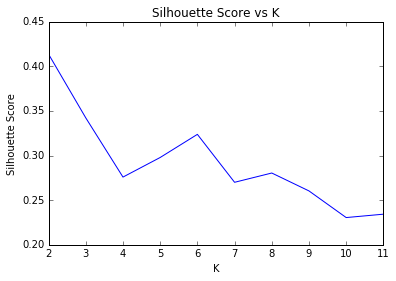

In [295]:
plot_silhouette(df_health_null_fill[cluster_cols], 12)

In [296]:
mod.score(df_health_null_fill[cluster_cols])

-29947742.641398244

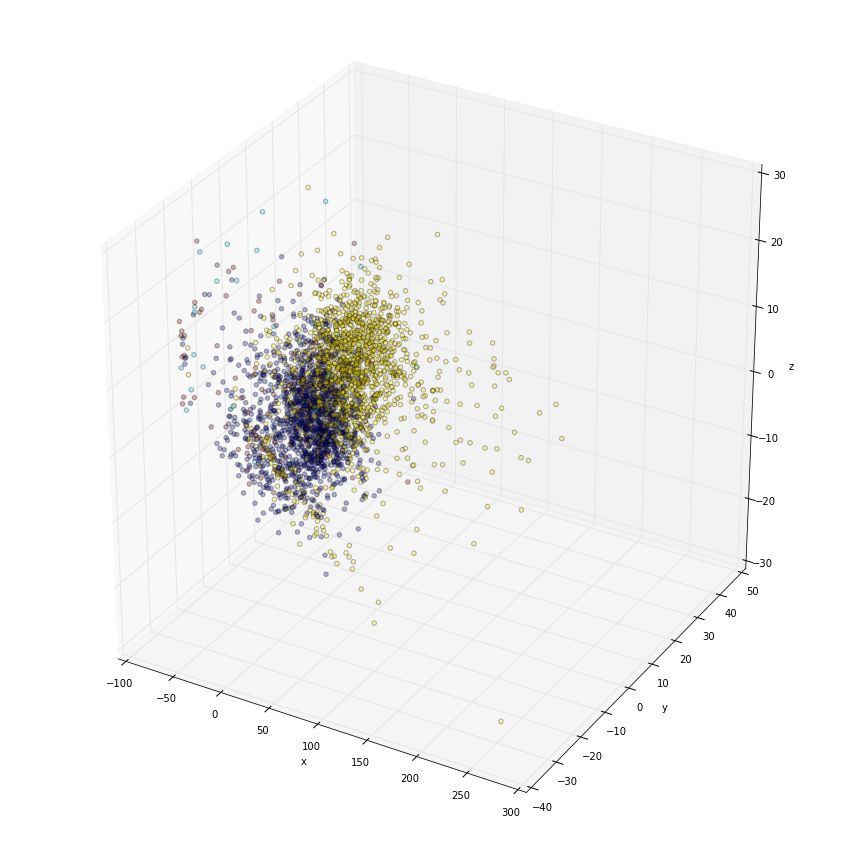

In [309]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
#plt.figure(figsize=(15,15))
#ax.set_xlim(-5000000,20000000)
#ax.set_ylim(-1000000,8000000)
#ax.set_zlim(-3000000,3000000)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.scatter(xs, ys, zs, c=preds, alpha=.3)
ax.view_init(30,300)

In [312]:
import matplotlib.cm as cm

In [313]:
def cluster_plot(X,n_clusters):
    '''
    plot silhouette and clusters
    :param x: numpy array
    :param nrange: int, range of cluster numbers
    :return: plots
    '''

    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(7, 5)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters (K = "+str(n_clusters)+")")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhoutte score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

In [323]:
range(1,10)

[1, 2, 3, 4, 5, 6, 7, 8, 9]

2
('For n_clusters =', 2, 'The average silhouette_score is :', 0.4135008355816886)
3
('For n_clusters =', 3, 'The average silhouette_score is :', 0.34217153116679816)
4
('For n_clusters =', 4, 'The average silhouette_score is :', 0.27585293119494991)
5
('For n_clusters =', 5, 'The average silhouette_score is :', 0.2978007441196826)
6
('For n_clusters =', 6, 'The average silhouette_score is :', 0.32773365991289372)
7
('For n_clusters =', 7, 'The average silhouette_score is :', 0.27032246542958654)
8
('For n_clusters =', 8, 'The average silhouette_score is :', 0.28232455255900785)
9
('For n_clusters =', 9, 'The average silhouette_score is :', 0.25963888731093065)


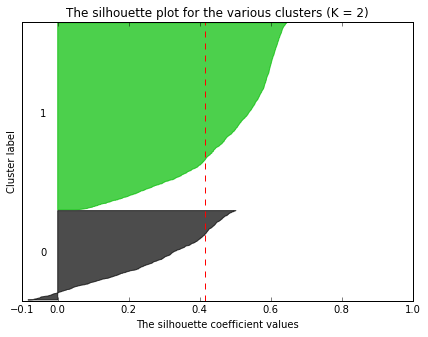

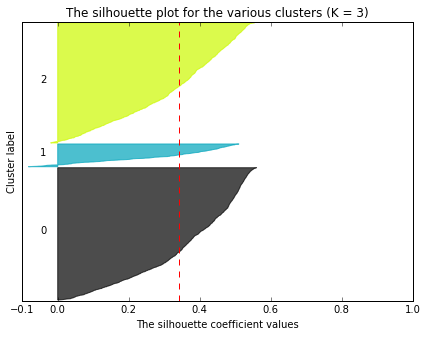

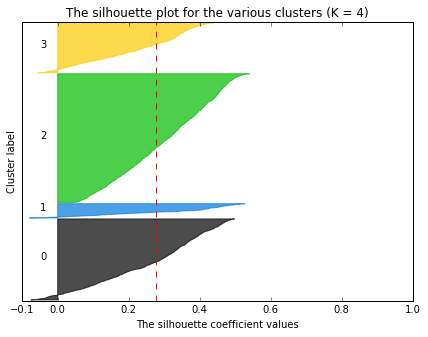

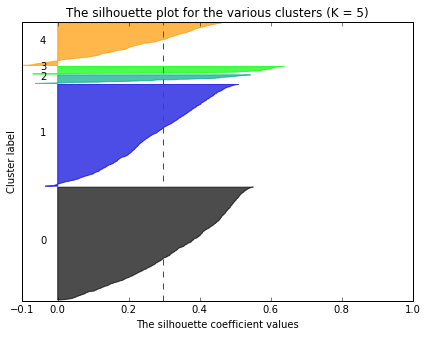

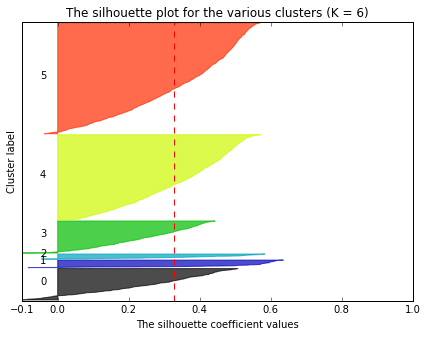

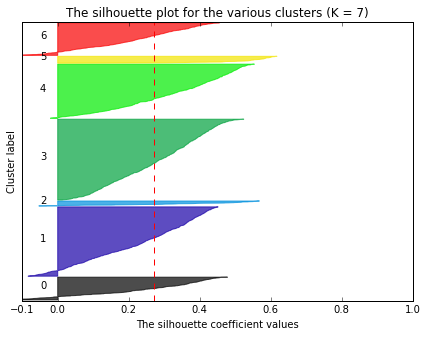

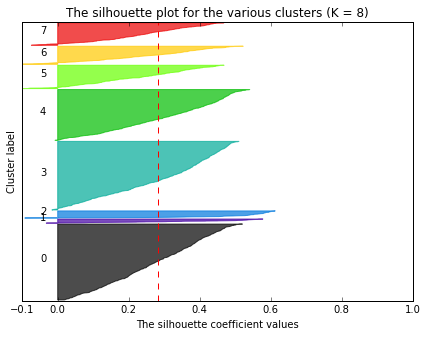

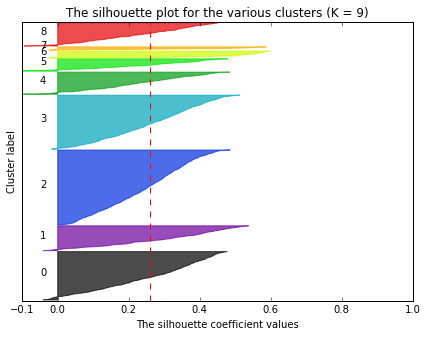

In [324]:
for i in range(2,10):
    print i
    cluster_plot(df_health_null_fill[cluster_cols], i)

In [403]:
def transform_pca(df, n_comp=3):
    pca = PCA(n_components=n_comp)
    df_pca = pca.fit_transform(df)
    
    return df_pca, df_pca[:,0], df_pca[:,1], df_pca[:,2]

def plot_clusters(df, n, rotate1=0, rotate2=0):
    mod, pred = cluster(df, n)
    z, xs, ys, zs = transform_pca(df)

    fig = plt.figure(figsize=(15,15))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.scatter(xs, ys, zs, c=pred, alpha=.6)
    ax.view_init(rotate1,rotate2)
    plt.show()
        

Initialization complete
Initialization complete
Initialization complete
Initialization complete
Initialization complete
Initialization complete
Initialization complete
Initialization complete
Iteration  0, inertia 66522.517
Iteration  0, inertia 80075.350
Iteration  0, inertia 66119.625
Iteration  0, inertia 67531.239
Iteration  0, inertia 72472.547
Iteration  0, inertia 73512.317
Iteration  0, inertia 77257.918
Iteration  0, inertia 64832.748
Iteration  1, inertia 50752.464
Iteration  1, inertia 50969.606
Iteration  1, inertia 49976.944
Iteration  1, inertia 57354.633
Iteration  1, inertia 54244.756
Iteration  1, inertia 60843.797
Iteration  1, inertia 49715.156
Iteration  1, inertia 50727.768
Iteration  2, inertia 48777.122
Iteration  2, inertia 49556.139
Iteration  2, inertia 49501.080
Iteration  2, inertia 57063.152
Iteration  2, inertia 52248.601
Iteration  2, inertia 60475.838
Iteration  2, inertia 48610.604
Iteration  2, inertia 49808.291
Iteration  3, inertia 48250.613
Iteratio

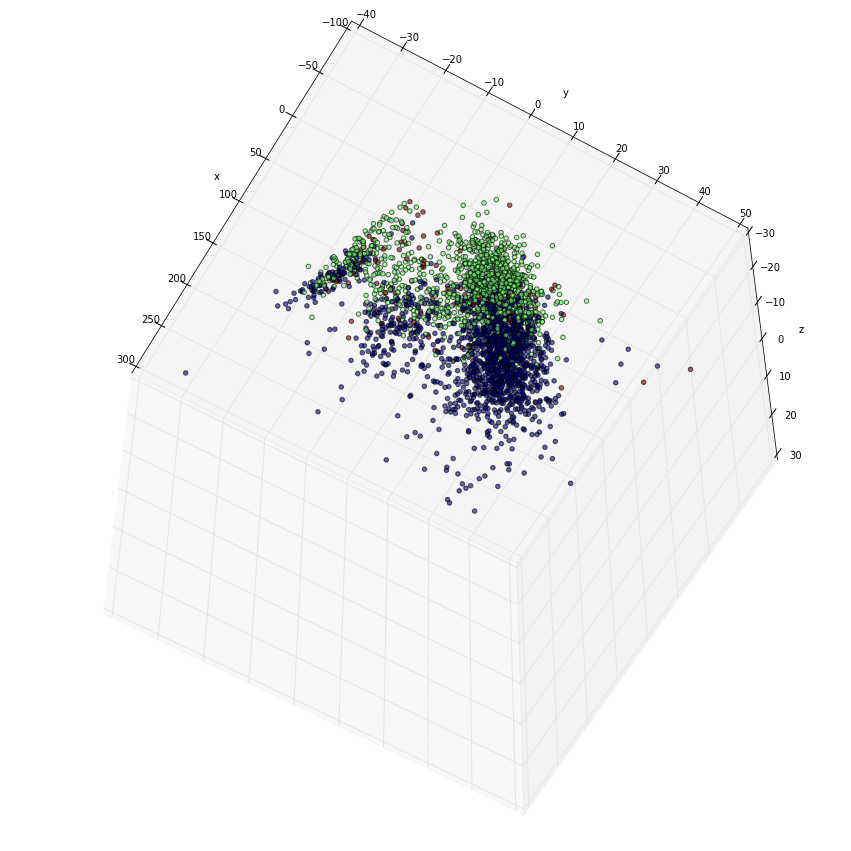

In [361]:
plot_clusters(df_health_null_fill[cluster_cols], 3, 120, 30)

Initialization complete
Initialization complete
Initialization complete
Initialization complete
Initialization complete
Initialization complete
Initialization complete
Initialization complete
Iteration  0, inertia 91282.058
Iteration  0, inertia 72164.920
Iteration  0, inertia 84081.675
Iteration  0, inertia 77583.624
Iteration  0, inertia 83150.373
Iteration  0, inertia 87187.627
Iteration  0, inertia 79169.551
Iteration  0, inertia 78014.264
Iteration  1, inertia 55264.993
Iteration  1, inertia 62334.986
Iteration  1, inertia 54330.234
Iteration  1, inertia 65370.778
Iteration  1, inertia 62219.762
Iteration  1, inertia 61305.938
Iteration  1, inertia 66113.732
Iteration  1, inertia 64493.399
Iteration  2, inertia 54673.133
Iteration  2, inertia 61274.382
Iteration  2, inertia 54243.100
Iteration  2, inertia 64128.536
Iteration  2, inertia 61432.654
Iteration  2, inertia 61060.420
Iteration  2, inertia 65760.811
Iteration  2, inertia 62487.184
Iteration  3, inertia 54405.721
Iteratio

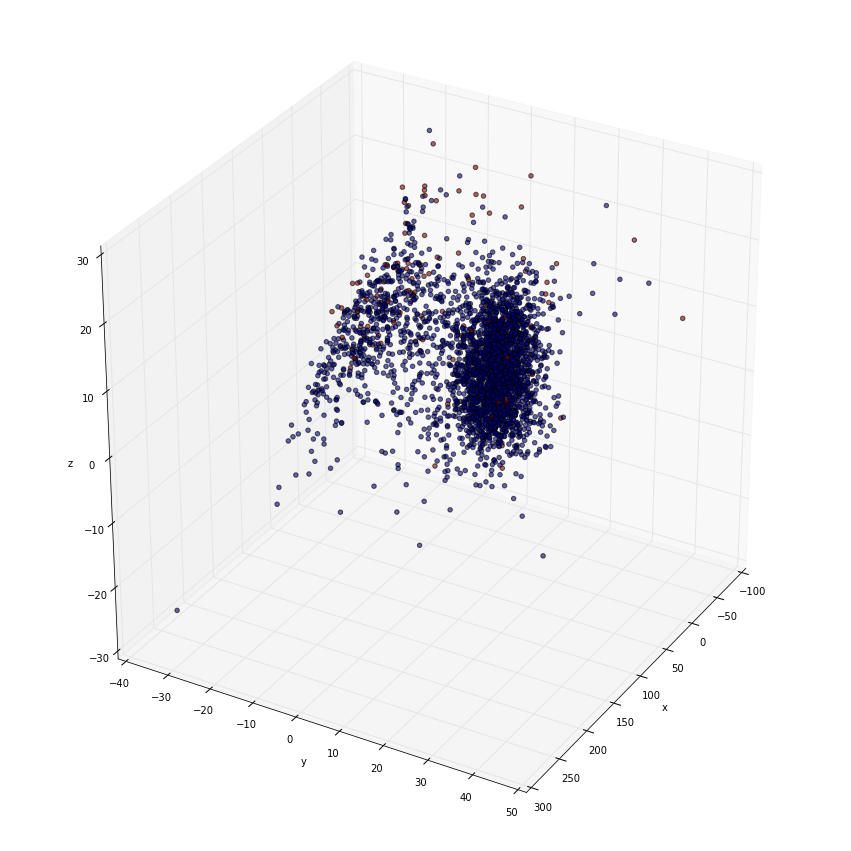

In [363]:
plot_clusters(df_health_null_fill[cluster_cols], 2, 30, 30)

In [364]:
cluster_cols

['num_asthma_norm',
 'num_alzheimers_dementia_norm',
 'num_artrial_fibrillation_norm',
 'num_cancer_norm',
 'num_chronic_obstructive_pulmonary_norm',
 'num_depression_norm',
 'num_diabetes_norm',
 'num_heart_failure_norm',
 'num_hypertension_norm',
 'num_ischemic_heart_norm',
 'num_osteoporosis_norm',
 'num_rheumatoid_arthritis_osteoarthirtis_norm',
 'num_schizophrenia_psychotic_norm',
 'num_stroke_norm',
 'total_hcc_risk_norm',
 'Poor or fair health_% Fair/Poor',
 'Poor mental health days_Mentally Unhealthy Days',
 'Smokers_% Smokers',
 'Adult obesity_% Obese',
 'Physical inactivity_% Physically Inactive',
 'Excessive Drinking_% Excessive Drinking',
 'Uninsured_% Uninsured',
 'Preventable hospital stays (Ambulatory Care Sensitive Conditions)_ACSC Rate']

In [443]:
cluster_cols_pared = ['num_asthma_norm',
                      'num_alzheimers_dementia_norm',
                      'num_artrial_fibrillation_norm',
                      'num_cancer_norm',
                      'num_chronic_obstructive_pulmonary_norm',
                      'num_depression_norm',
                      'num_diabetes_norm',
                      'num_heart_failure_norm',
                      'num_hypertension_norm',
                      'num_ischemic_heart_norm',
                      'num_osteoporosis_norm',
                      'num_rheumatoid_arthritis_osteoarthirtis_norm',
                      'num_schizophrenia_psychotic_norm',
                      'num_stroke_norm',
                      'total_hcc_risk_norm',
                      'county']

In [374]:
df_health_null_fill[cluster_cols_pared]

num_asthma_norm  num_alzheimers_dementia_norm  \
1001          0.074400                      0.162002   
1003          0.073961                      0.146354   
1005          0.074608                      0.135151   
1007          0.038867                      0.178363   
1009          0.078555                      0.164692   
1011          0.096443                      0.169781   
1013          0.074055                      0.190329   
1015          0.096282                      0.140853   
1017          0.084294                      0.151528   
1019          0.071408                      0.151933   
1021          0.103156                      0.150842   
1023          0.028167                      0.108802   
1025          0.066308                      0.148784   
1027          0.075079                      0.157701   
1029          0.071509                      0.187550   
1031          0.091492                      0.136847   
1033          0.080025                      0.123160   
1035          0.066908                      0.129574   
1037         -1.000000                     -1.000000   
1039          0.070129                      0.156823   
1041          0.056517                      0.149035   
1043          0.074905                      0.138483   
1045          0.087872                      0.173092   
1047          0.093053                      0.193716   
1049          0.069145                      0.151099   
1051          0.058504                      0.191220   
1053          0.067707                      0.160618   
1055          0.098930                      0.164042   
1057          0.059884                      0.104385   
1059          0.067815                      0.281170   
...                ...                           ...   
55129         0.041245                      0.094602   
55131         0.079333                      0.115728   
55133         0.098499                      0.149034   
55135         0.075702                      0.095900   
55137         0.062193                      0.123886   
55139         0.102143                      0.099999   
55141         0.072803                      0.116705   
56001         0.054705                      0.096498   
56003         0.032838                      0.096867   
56005         0.050461                      0.092092   
56007         0.028977                      0.079786   
56009         0.027819                      0.075376   
56011         0.000000                      0.031250   
56013         0.036566                      0.091967   
56015         0.029644                      0.091427   
56017         0.048802                      0.113078   
56019         0.009023                      0.110028   
56021         0.081939                      0.103862   
56023         0.048436                      0.165008   
56025         0.065854                      0.107340   
56027        -1.000000                      0.000000   
56029         0.049733                      0.084051   
56031         0.035934                      0.095672   
56033         0.029579                      0.089668   
56035         0.026346                      0.046941   
56037         0.053353                      0.110605   
56039         0.050995                      0.064387   
56041         0.037560                      0.088933   
56043         0.013732                      0.092664   
56045         0.018545                      0.132126   

       num_artrial_fibrillation_norm  num_cancer_norm  \
1001                        0.121805         0.116911   
1003                        0.153738         0.115426   
1005                        0.084487         0.085358   
1007                        0.116495         0.073349   
1009                        0.134349         0.077358   
1011                        0.054029         0.071410   
1013                        0.108002         0.092253   
1015                        0.110711         0.109640   
1017                 

Initialization complete
Initialization complete
Initialization complete
Initialization complete
Initialization complete
Initialization complete
Initialization complete
Initialization complete
Iteration  0, inertia 43058.931
Iteration  0, inertia 42469.904
Iteration  0, inertia 46025.177
Iteration  0, inertia 49357.131
Iteration  0, inertia 49733.573
Iteration  0, inertia 47096.016
Iteration  0, inertia 38047.691
Iteration  0, inertia 43086.951
Iteration  1, inertia 33002.234
Iteration  1, inertia 32673.040
Iteration  1, inertia 33061.564
Iteration  1, inertia 41341.042
Iteration  1, inertia 31459.838
Iteration  1, inertia 41144.552
Iteration  1, inertia 30498.395
Iteration  1, inertia 30394.075
Iteration  2, inertia 31367.676
Iteration  2, inertia 31303.908
Iteration  2, inertia 31407.889
Iteration  2, inertia 38908.504
Iteration  2, inertia 30548.690
Iteration  2, inertia 39814.127
Iteration  2, inertia 30322.485
Iteration  2, inertia 30235.987
Iteration  3, inertia 30768.444
Iteratio

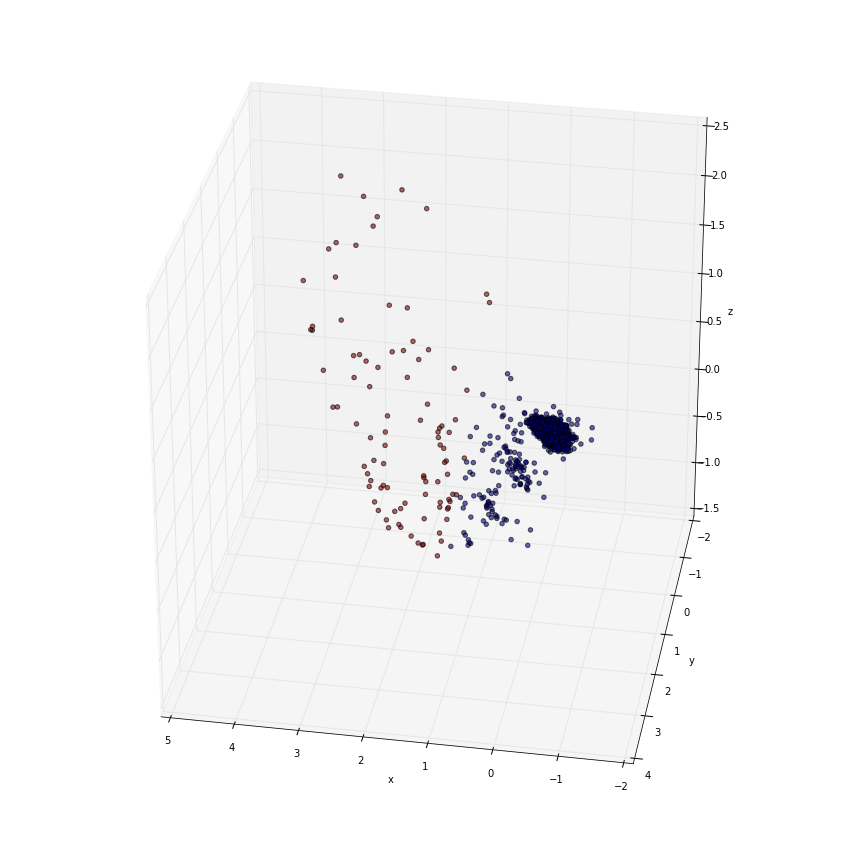

In [381]:
plot_clusters(df_health_null_fill[cluster_cols_pared], 2, 30, 100)

2
('For n_clusters =', 2, 'The average silhouette_score is :', 0.80829123479989962)
3
('For n_clusters =', 3, 'The average silhouette_score is :', 0.33776807734707748)
4
('For n_clusters =', 4, 'The average silhouette_score is :', 0.35205056011498198)
5
('For n_clusters =', 5, 'The average silhouette_score is :', 0.35869789520669243)
6
('For n_clusters =', 6, 'The average silhouette_score is :', 0.36442822981636863)
7
('For n_clusters =', 7, 'The average silhouette_score is :', 0.29021772527153078)
8
('For n_clusters =', 8, 'The average silhouette_score is :', 0.29778168394054289)
9
('For n_clusters =', 9, 'The average silhouette_score is :', 0.30078699097373063)


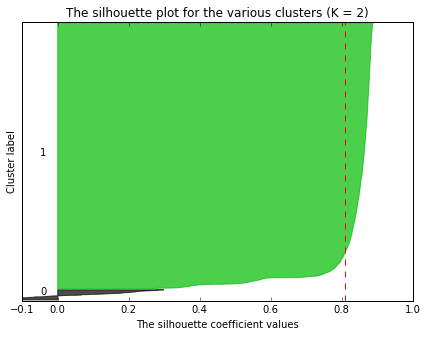

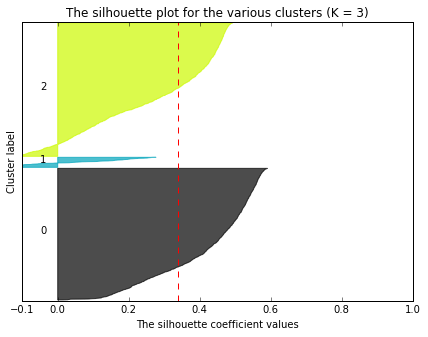

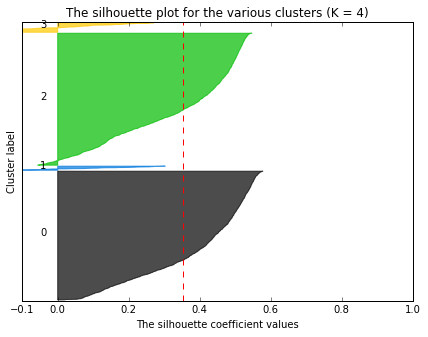

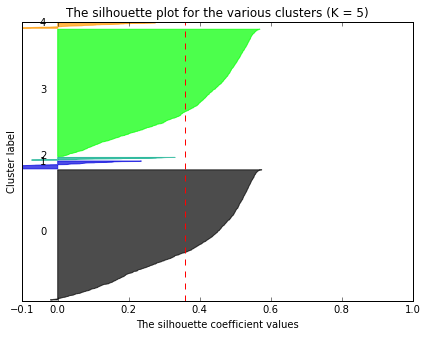

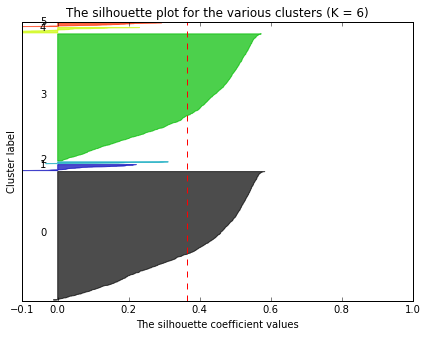

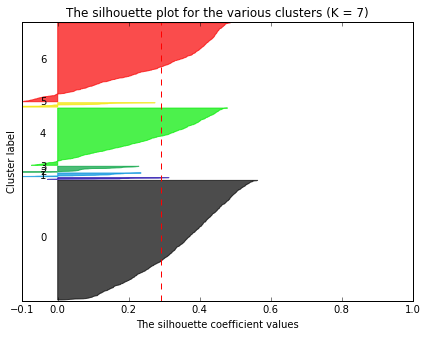

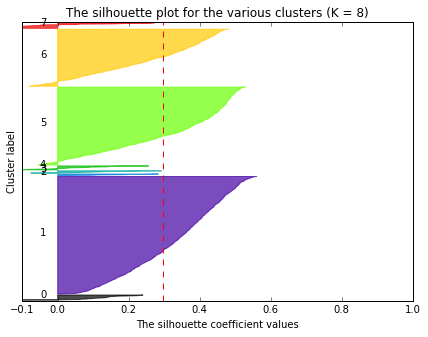

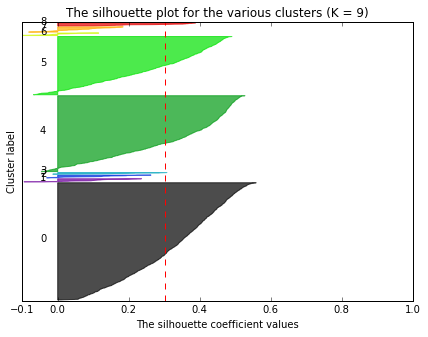

In [380]:
for i in range(2,10):
    print i
    cluster_plot(df_health_null_fill[cluster_cols_pared], i)

In [385]:
mod, preds = cluster(df_health_null_fill[cluster_cols_pared], 2)

Initialization complete
Initialization complete
Initialization complete
Initialization complete
Initialization complete
Initialization complete
Initialization complete
Initialization complete
Iteration  0, inertia 49357.131
Iteration  0, inertia 46025.177
Iteration  0, inertia 43058.931
Iteration  0, inertia 47096.016
Iteration  0, inertia 38047.691
Iteration  0, inertia 49733.573
Iteration  0, inertia 43086.951
Iteration  0, inertia 42469.904
Iteration  1, inertia 41341.042
Iteration  1, inertia 33061.564
Iteration  1, inertia 33002.234
Iteration  1, inertia 41144.552
Iteration  1, inertia 30498.395
Iteration  1, inertia 31459.838
Iteration  1, inertia 30394.075
Iteration  1, inertia 32673.040
Iteration  2, inertia 38908.504
Iteration  2, inertia 31407.889
Iteration  2, inertia 31367.676
Iteration  2, inertia 39814.127
Iteration  2, inertia 30322.485
Iteration  2, inertia 30548.690
Iteration  2, inertia 30235.987
Iteration  2, inertia 31303.908
Iteration  3, inertia 38248.395
Iteratio

In [387]:
results = get_cluster_assignments(df_health_null_fill, mod.labels_)

In [394]:
for i in results:
    if i[1]==1:
        print i

(u'Coosa', 1)
(u'Lowndes', 1)
(u'Bristol Bay', 1)
(u'Lake and Peninsula', 1)
(u'Nome', 1)
(u'North Slope', 1)
(u'Newton', 1)
(u'Alpine', 1)
(u'Cheyenne', 1)
(u'Clear Creek', 1)
(u'Costilla', 1)
(u'Gilpin', 1)
(u'Kiowa', 1)
(u'Mineral', 1)
(u'Saguache', 1)
(u'Washington', 1)
(u'Liberty', 1)
(u'Hancock', 1)
(u'Heard', 1)
(u'Montgomery', 1)
(u'Pike', 1)
(u'Talbot', 1)
(u'Taliaferro', 1)
(u'Twiggs', 1)
(u'Adams', 1)
(u'Butte', 1)
(u'Camas', 1)
(u'Lewis', 1)
(u'Henderson', 1)
(u'Scott', 1)
(u'Taylor', 1)
(u'Worth', 1)
(u'Decatur', 1)
(u'Elk', 1)
(u'Hamilton', 1)
(u'Haskell', 1)
(u'Lane', 1)
(u'Rush', 1)
(u'Wallace', 1)
(u'Wichita', 1)
(u'Nicholas', 1)
(u'Grant', 1)
(u'Lake of the Woods', 1)
(u'Marshall', 1)
(u'Holt', 1)
(u'Carter', 1)
(u'Chouteau', 1)
(u'Garfield', 1)
(u'Granite', 1)
(u'Powder River', 1)
(u'Prairie', 1)
(u'Sweet Grass', 1)
(u'Treasure', 1)
(u'Wheatland', 1)
(u'Stanton', 1)
(u'Eureka', 1)
(u'Storey', 1)
(u'Catron', 1)
(u'Harding', 1)
(u'Hidalgo', 1)
(u'Mora', 1)
(u'Bowman', 

In [395]:
def transform_pca(df, n_comp=3):
    pca = PCA(n_components=n_comp)
    df_pca = pca.fit_transform(df)
    
    return df_pca, df_pca[:,0], df_pca[:,1], df_pca[:,2]

In [404]:
df_pca, xs, ys, za = transform_pca(df_health_null_fill[cluster_cols_pared])

2
('For n_clusters =', 2, 'The average silhouette_score is :', 0.82312781494623433)
3
('For n_clusters =', 3, 'The average silhouette_score is :', 0.45246748550876525)
4
('For n_clusters =', 4, 'The average silhouette_score is :', 0.46753674427199315)
5
('For n_clusters =', 5, 'The average silhouette_score is :', 0.47586887984600934)
6
('For n_clusters =', 6, 'The average silhouette_score is :', 0.4316437566424059)
7
('For n_clusters =', 7, 'The average silhouette_score is :', 0.40434951949586712)
8
('For n_clusters =', 8, 'The average silhouette_score is :', 0.40258160764198908)
9
('For n_clusters =', 9, 'The average silhouette_score is :', 0.40443628384147701)


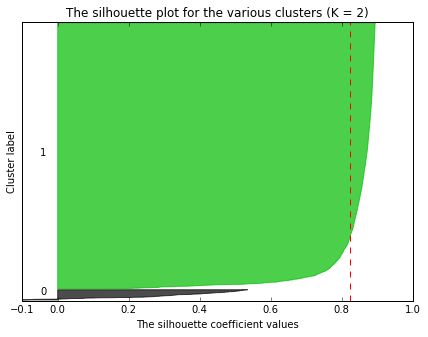

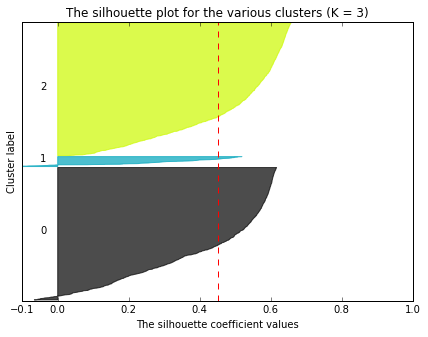

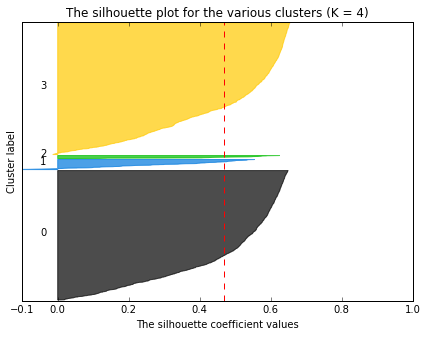

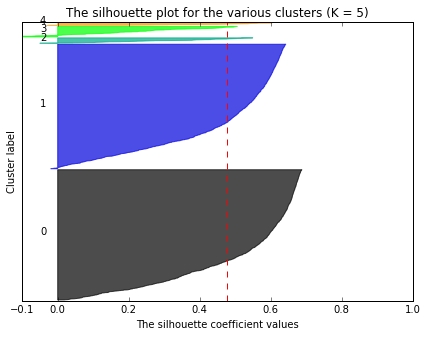

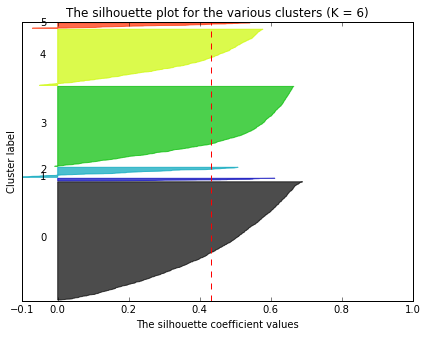

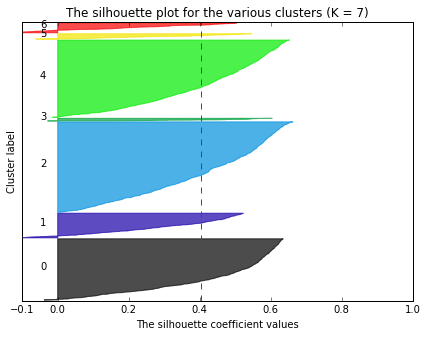

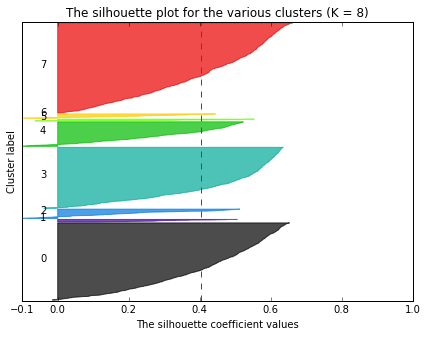

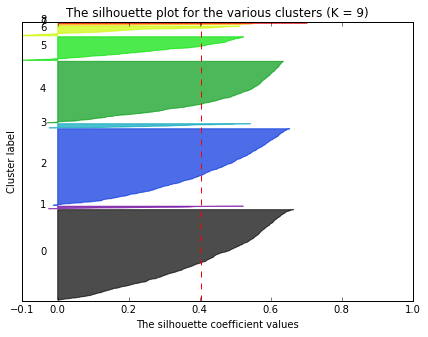

In [405]:
for i in range(2,10):
    print i
    cluster_plot(df_pca, i)

Initialization complete
Initialization complete
Initialization complete
Initialization complete
Initialization complete
Initialization complete
Initialization complete
Initialization complete
Iteration  0, inertia 34466.004
Iteration  0, inertia 33091.482
Iteration  0, inertia 38642.112
Iteration  0, inertia 33761.012
Iteration  0, inertia 42792.607
Iteration  0, inertia 34831.747
Iteration  0, inertia 35277.228
Iteration  0, inertia 39936.082
Iteration  1, inertia 27928.833
Iteration  1, inertia 26197.618
Iteration  1, inertia 25654.052
Iteration  1, inertia 28313.370
Iteration  1, inertia 26896.586
Iteration  1, inertia 26298.246
Iteration  1, inertia 25729.059
Iteration  1, inertia 27017.617
Iteration  2, inertia 26978.127
Iteration  2, inertia 25595.198
Iteration  2, inertia 25454.604
Iteration  2, inertia 27292.586
Iteration  2, inertia 25784.783
Iteration  2, inertia 25527.802
Iteration  2, inertia 25444.001
Iteration  2, inertia 26424.514
Iteration  3, inertia 26418.572
Iteratio

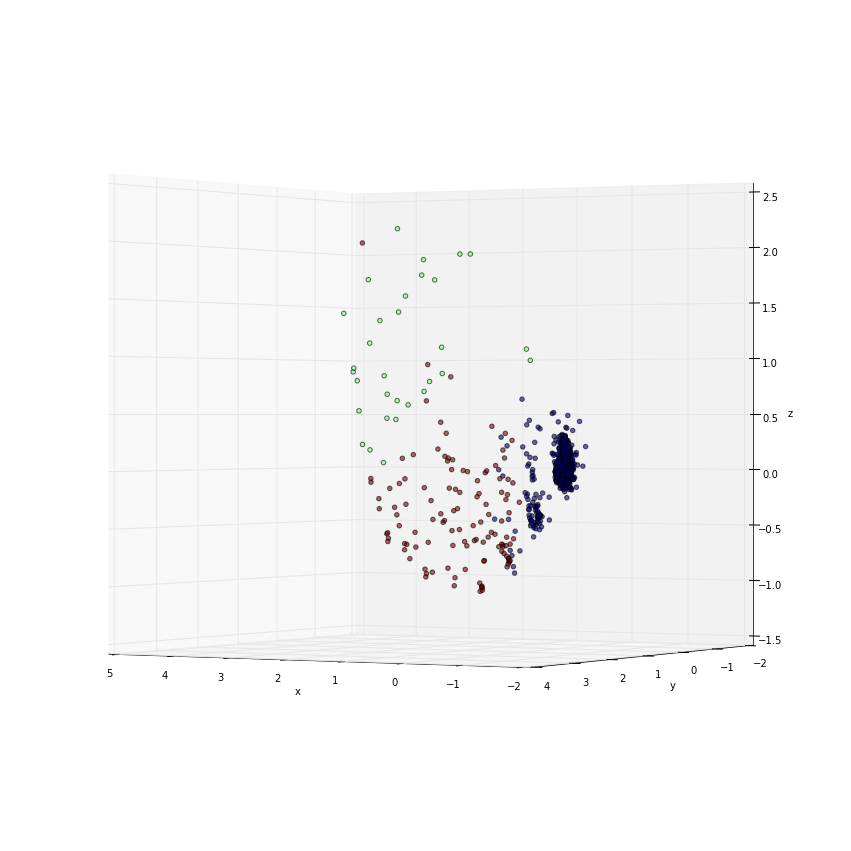

In [408]:
plot_clusters(df_health_null_fill[cluster_cols_pared], 3, 0, 120)

In [418]:
mod, preds = cluster(df_health_null_fill[cluster_cols_pared], 3)
results = get_cluster_assignments(df_health_null_fill, mod.labels_)

Initialization complete
Initialization complete
Initialization complete
Initialization complete
Initialization complete
Initialization complete
Initialization complete
Initialization complete
Iteration  0, inertia 34466.004
Iteration  0, inertia 38642.112
Iteration  0, inertia 33091.482
Iteration  0, inertia 39936.082
Iteration  0, inertia 33761.012
Iteration  0, inertia 35277.228
Iteration  0, inertia 34831.747
Iteration  0, inertia 42792.607
Iteration  1, inertia 27928.833
Iteration  1, inertia 25654.052
Iteration  1, inertia 26197.618
Iteration  1, inertia 27017.617
Iteration  1, inertia 28313.370
Iteration  1, inertia 25729.059
Iteration  1, inertia 26298.246
Iteration  1, inertia 26896.586
Iteration  2, inertia 26978.127
Iteration  2, inertia 25454.604
Iteration  2, inertia 25595.198
Iteration  2, inertia 26424.514
Iteration  2, inertia 27292.586
Iteration  2, inertia 25444.001
Iteration  2, inertia 25527.802
Iteration  2, inertia 25784.783
Iteration  3, inertia 26418.572
Iteratio

In [410]:
results

[(u'Autauga', 0),
 (u'Baldwin', 0),
 (u'Barbour', 0),
 (u'Bibb', 0),
 (u'Blount', 0),
 (u'Bullock', 0),
 (u'Butler', 0),
 (u'Calhoun', 0),
 (u'Chambers', 0),
 (u'Cherokee', 0),
 (u'Chilton', 0),
 (u'Choctaw', 0),
 (u'Clarke', 0),
 (u'Clay', 0),
 (u'Cleburne', 0),
 (u'Coffee', 0),
 (u'Colbert', 0),
 (u'Conecuh', 0),
 (u'Coosa', 2),
 (u'Covington', 0),
 (u'Crenshaw', 0),
 (u'Cullman', 0),
 (u'Dale', 0),
 (u'Dallas', 0),
 (u'DeKalb', 0),
 (u'Elmore', 0),
 (u'Escambia', 0),
 (u'Etowah', 0),
 (u'Fayette', 0),
 (u'Franklin', 0),
 (u'Geneva', 0),
 (u'Greene', 0),
 (u'Hale', 0),
 (u'Henry', 0),
 (u'Houston', 0),
 (u'Jackson', 0),
 (u'Jefferson', 0),
 (u'Lamar', 0),
 (u'Lauderdale', 0),
 (u'Lawrence', 0),
 (u'Lee', 0),
 (u'Limestone', 0),
 (u'Lowndes', 1),
 (u'Macon', 0),
 (u'Madison', 0),
 (u'Marengo', 0),
 (u'Marion', 0),
 (u'Marshall', 0),
 (u'Mobile', 0),
 (u'Monroe', 0),
 (u'Montgomery', 0),
 (u'Morgan', 0),
 (u'Perry', 2),
 (u'Pickens', 0),
 (u'Pike', 0),
 (u'Randolph', 0),
 (u'Russell', 

In [411]:
for i in results:
    if i[1]==1:
        print i

(u'Lowndes', 1)
(u'Bristol Bay', 1)
(u'Lake and Peninsula', 1)
(u'Nome', 1)
(u'North Slope', 1)
(u'Alpine', 1)
(u'Clear Creek', 1)
(u'Kiowa', 1)
(u'Mineral', 1)
(u'Saguache', 1)
(u'Heard', 1)
(u'Talbot', 1)
(u'Camas', 1)
(u'Taylor', 1)
(u'Elk', 1)
(u'Lane', 1)
(u'Rush', 1)
(u'Carter', 1)
(u'Granite', 1)
(u'Powder River', 1)
(u'Wheatland', 1)
(u'Eureka', 1)
(u'Storey', 1)
(u'Harding', 1)
(u'Logan', 1)
(u'Aurora', 1)
(u'Harding', 1)
(u'Jones', 1)
(u'Mason', 1)
(u'Daggett', 1)
(u'Niobrara', 1)


In [412]:
for i in results:
    if i[1]==2:
        print i

(u'Coosa', 2)
(u'Perry', 2)
(u'Aleutians East', 2)
(u'Denali', 2)
(u'Haines', 2)
(u'Cleveland', 2)
(u'Newton', 2)
(u'Bent', 2)
(u'Cheyenne', 2)
(u'Costilla', 2)
(u'Crowley', 2)
(u'Gilpin', 2)
(u'Hinsdale', 2)
(u'Washington', 2)
(u'Liberty', 2)
(u'Hancock', 2)
(u'Montgomery', 2)
(u'Pike', 2)
(u'Taliaferro', 2)
(u'Twiggs', 2)
(u'Adams', 2)
(u'Boise', 2)
(u'Butte', 2)
(u'Lewis', 2)
(u'Lincoln', 2)
(u'Henderson', 2)
(u'Jasper', 2)
(u'Schuyler', 2)
(u'Scott', 2)
(u'Stark', 2)
(u'Keokuk', 2)
(u'Monroe', 2)
(u'Worth', 2)
(u'Decatur', 2)
(u'Greeley', 2)
(u'Hamilton', 2)
(u'Haskell', 2)
(u'Lincoln', 2)
(u'Rice', 2)
(u'Wabaunsee', 2)
(u'Wallace', 2)
(u'Wichita', 2)
(u'Nicholas', 2)
(u'Grant', 2)
(u'Dodge', 2)
(u'Grant', 2)
(u'Lake of the Woods', 2)
(u'Marshall', 2)
(u'Sibley', 2)
(u'Traverse', 2)
(u'Holt', 2)
(u'Worth', 2)
(u'Chouteau', 2)
(u'Daniels', 2)
(u'Fallon', 2)
(u'Garfield', 2)
(u'Judith Basin', 2)
(u'McCone', 2)
(u'Prairie', 2)
(u'Sweet Grass', 2)
(u'Treasure', 2)
(u'Burt', 2)
(u'Clay'

### PCA and then cluster with k=3 for now... explore the clusters

In [419]:
df_health_null_fill['predictions']

1001     0
1003     0
1005     0
1007     0
1009     0
1011     0
1013     0
1015     0
1017     0
1019     0
1021     0
1023     0
1025     0
1027     0
1029     0
1031     0
1033     0
1035     0
1037     2
1039     0
1041     0
1043     0
1045     0
1047     0
1049     0
1051     0
1053     0
1055     0
1057     0
1059     0
        ..
55129    0
55131    0
55133    0
55135    0
55137    0
55139    0
55141    0
56001    0
56003    0
56005    0
56007    0
56009    0
56011    0
56013    0
56015    0
56017    0
56019    0
56021    0
56023    0
56025    0
56027    1
56029    0
56031    0
56033    0
56035    0
56037    0
56039    0
56041    0
56043    0
56045    0
Name: predictions, dtype: int32

In [423]:
df_health_null_fill.groupby('predictions')[cluster_cols_pared].describe().T

predictions                                      0                      \
                                             count      mean       std   
num_asthma_norm                               2899  0.061712  0.088295   
num_alzheimers_dementia_norm                  2899  0.137896  0.062820   
num_artrial_fibrillation_norm                 2899  0.116215  0.032870   
num_cancer_norm                               2899  0.088116  0.078136   
num_chronic_obstructive_pulmonary_norm        2899  0.202170  0.066971   
num_depression_norm                           2899  0.249132  0.062772   
num_diabetes_norm                             2899  0.340092  0.062650   
num_heart_failure_norm                        2899  0.232653  0.068940   
num_hypertension_norm                         2899  0.672915  0.066327   
num_ischemic_heart_norm                       2899  0.378123  0.083022   
num_osteoporosis_norm                         2899  0.068337  0.062525   
num_rheumatoid_arthritis_osteoarthirtis_norm  2899  0.407798  0.064925   
num_schizophrenia_psychotic_norm              2899  0.045164  0.111074   
num_stroke_norm                               2899  0.043621  0.102455   
total_hcc_risk_norm                           2899  1.350818  0.233875   

predictions                                                                 \
                                                   min       25%       50%   
num_asthma_norm                              -1.000000  0.049809  0.068694   
num_alzheimers_dementia_norm                 -1.000000  0.106052  0.134584   
num_artrial_fibrillation_norm                 0.000000  0.094837  0.114736   
num_cancer_norm                              -1.000000  0.073350  0.090654   
num_chronic_obstructive_pulmonary_norm       -1.000000  0.159360  0.201464   
num_depression_norm                          -1.000000  0.213403  0.247913   
num_diabetes_norm                             0.083653  0.297746  0.342734   
num_heart_failure_norm                       -1.000000  0.188694  0.230300   
num_hypertension_norm                         0.381733  0.639220  0.695583   
num_ischemic_heart_norm                       0.103181  0.320794  0.376091   
num_osteoporosis_norm                        -1.000000  0.053775  0.070974   
num_rheumatoid_arthritis_osteoarthirtis_norm  0.190000  0.365944  0.408358   
num_schizophrenia_psychotic_norm             -1.000000  0.036943  0.052658   
num_stroke_norm                              -1.000000  0.034827  0.052361   
total_hcc_risk_norm                           0.766345  1.185793  1.328138   

predictions                                                          1  \
                                                   75%       max count   
num_asthma_norm                               0.085797  0.300000    31   
num_alzheimers_dementia_norm                  0.161563  0.750000    31   
num_artrial_fibrillation_norm                 0.137671  0.241237    31   
num_cancer_norm                               0.113415  0.180211    31   
num_chronic_obstructive_pulmonary_norm        0.241018  0.630000    31   
num_depression_norm                           0.285088  0.620099    31   
num_diabetes_norm                             0.379857  0.710000    31   
num_heart_failure_norm                        0.272718  0.630000    31   
num_hypertension_norm                         0.722828  0.750000    31   
num_ischemic_heart_norm                       0.435334  0.750000    31   
num_osteoporosis_norm                         0.088070  0.270000    31   
num_rheumatoid_arthritis_osteoarthirtis_norm  0.450710  0.740324    31   
num_schizophrenia_psychotic_norm              0.069182  0.360099    31   
num_stroke_norm                               0.069890  0.182859    31   
total_hcc_risk_norm                           1.496161  2.620700    31   

predictions                                               ...               \
                                                  mean    ...          75%   

In [444]:
df_health_drop_null = df_health[cluster_cols_pared][df_health[cluster_cols_pared].isnull().any(axis=1)==False]

2
('For n_clusters =', 2, 'The average silhouette_score is :', 0.40106690007954066)
3
('For n_clusters =', 3, 'The average silhouette_score is :', 0.32543307027269508)
4
('For n_clusters =', 4, 'The average silhouette_score is :', 0.27710415196479143)
5
('For n_clusters =', 5, 'The average silhouette_score is :', 0.22750075814090406)
6
('For n_clusters =', 6, 'The average silhouette_score is :', 0.19227847148572122)
7
('For n_clusters =', 7, 'The average silhouette_score is :', 0.16382452067059061)
8
('For n_clusters =', 8, 'The average silhouette_score is :', 0.15720752935186758)
9
('For n_clusters =', 9, 'The average silhouette_score is :', 0.14965458913068566)


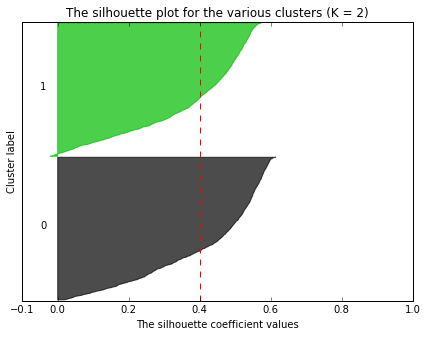

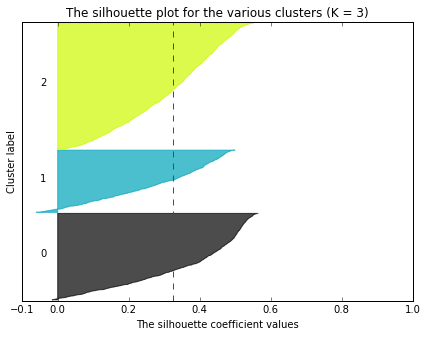

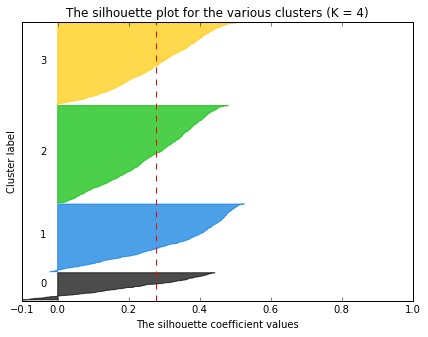

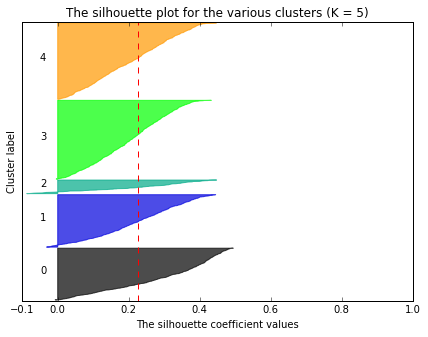

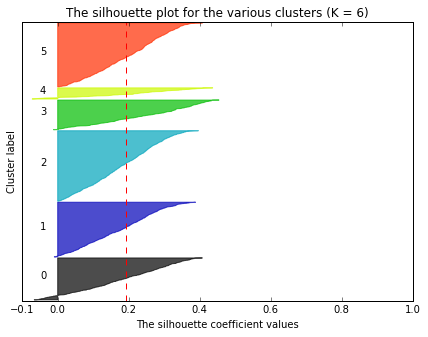

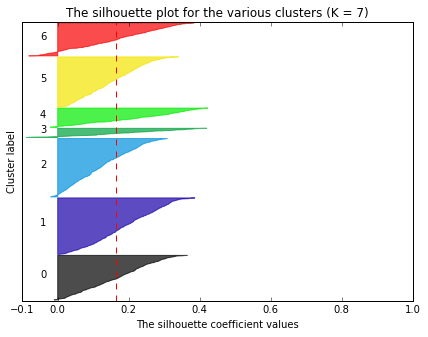

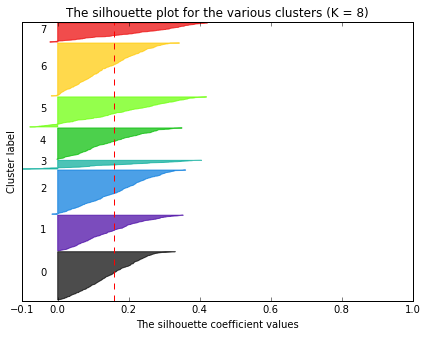

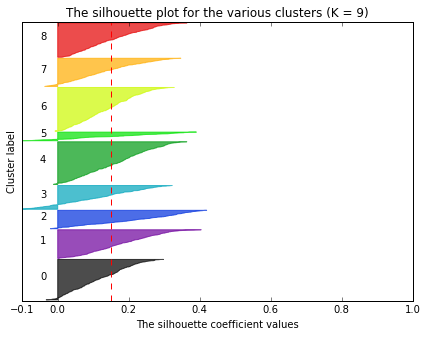

In [433]:
for i in range(2,10):
    print i
    cluster_plot(df_health_drop_null, i)

Initialization complete
Initialization complete
Initialization complete
Initialization complete
Initialization complete
Initialization complete
Initialization complete
Initialization complete
Iteration  0, inertia 38712.313
Iteration  0, inertia 30139.236
Iteration  0, inertia 38025.858
Iteration  0, inertia 33019.677
Iteration  0, inertia 41360.050
Iteration  0, inertia 37231.544
Iteration  0, inertia 36290.997
Iteration  0, inertia 36051.107
Iteration  1, inertia 25407.559
Iteration  1, inertia 23598.041
Iteration  1, inertia 24944.120
Iteration  1, inertia 23646.257
Iteration  1, inertia 23861.810
Iteration  1, inertia 23787.938
Iteration  1, inertia 25114.565
Iteration  1, inertia 23684.299
Iteration  2, inertia 24485.727
Iteration  2, inertia 23443.075
Iteration  2, inertia 24114.612
Iteration  2, inertia 23354.826
Iteration  2, inertia 23578.285
Iteration  2, inertia 23453.128
Iteration  2, inertia 24814.830
Iteration  2, inertia 23321.519
Iteration  3, inertia 24063.953
Iteratio

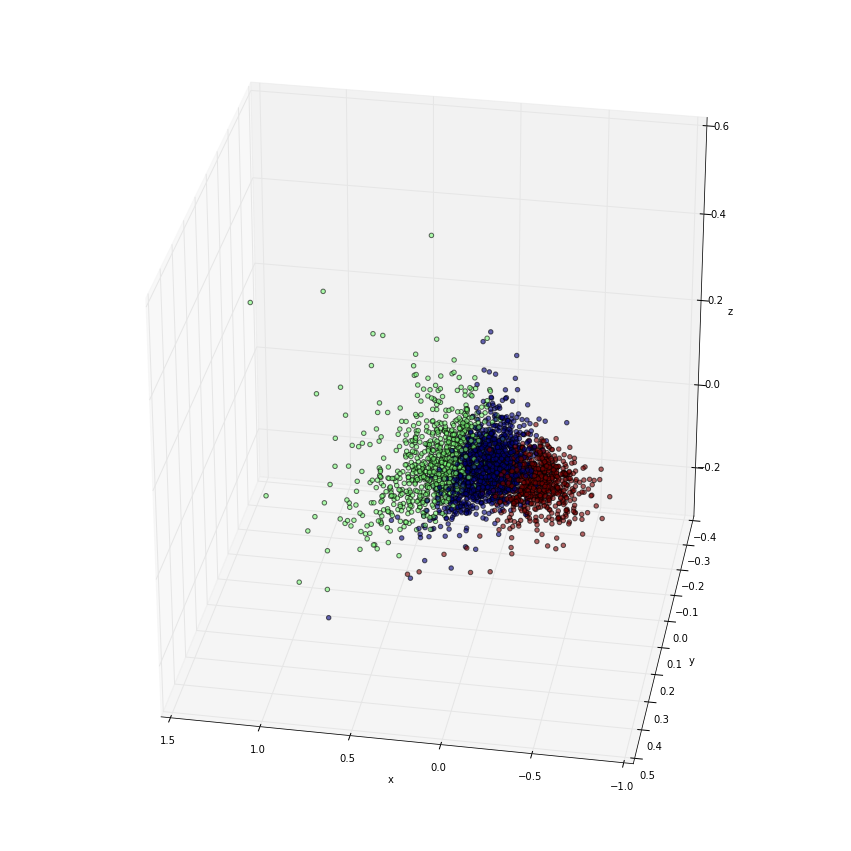

In [434]:
plot_clusters(df_health_drop_null, 3, 30, 100)

Initialization complete
Initialization complete
Initialization complete
Initialization complete
Initialization complete
Initialization complete
Initialization complete
Initialization complete
Iteration  0, inertia 38712.313
Iteration  0, inertia 33019.677
Iteration  0, inertia 30139.236
Iteration  0, inertia 38025.858
Iteration  0, inertia 36051.107
Iteration  0, inertia 37231.544
Iteration  0, inertia 36290.997
Iteration  0, inertia 41360.050
Iteration  1, inertia 25407.559
Iteration  1, inertia 23646.257
Iteration  1, inertia 23598.041
Iteration  1, inertia 24944.120
Iteration  1, inertia 23684.299
Iteration  1, inertia 23787.938
Iteration  1, inertia 25114.565
Iteration  1, inertia 23861.810
Iteration  2, inertia 24485.727
Iteration  2, inertia 23354.826
Iteration  2, inertia 23443.075
Iteration  2, inertia 24114.612
Iteration  2, inertia 23321.519
Iteration  2, inertia 23453.128
Iteration  2, inertia 24814.830
Iteration  2, inertia 23578.285
Iteration  3, inertia 24063.953
Iteratio

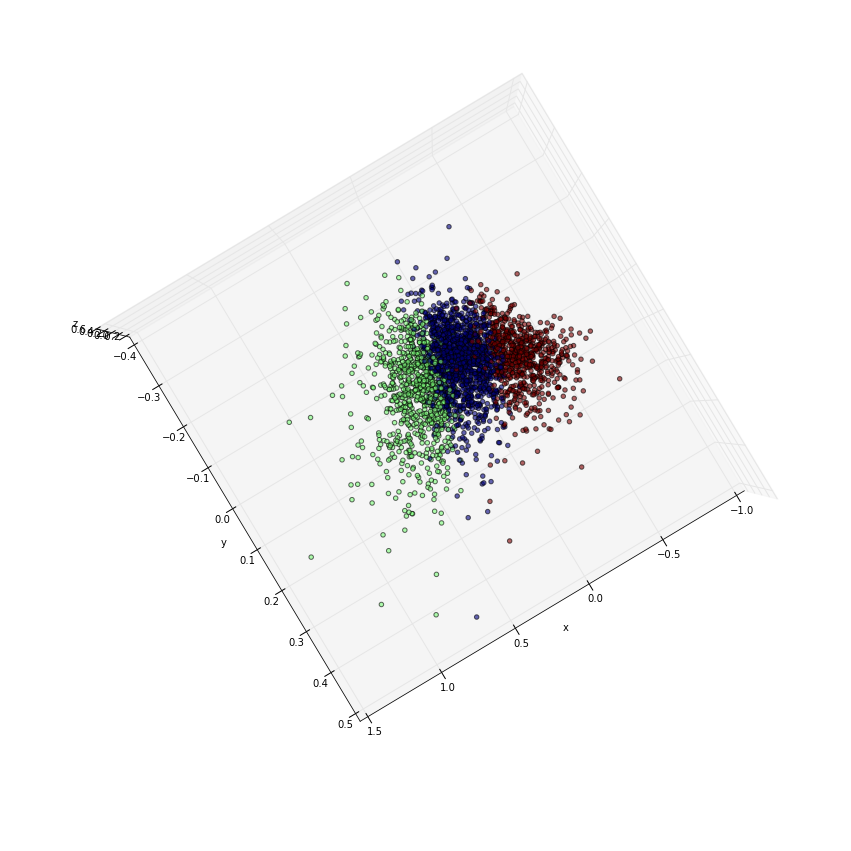

In [441]:
plot_clusters(df_health_drop_null, 3, 90, 60)

In [448]:
df_health_drop_null.columns

Index([u'num_asthma_norm', u'num_alzheimers_dementia_norm',
       u'num_artrial_fibrillation_norm', u'num_cancer_norm',
       u'num_chronic_obstructive_pulmonary_norm', u'num_depression_norm',
       u'num_diabetes_norm', u'num_heart_failure_norm',
       u'num_hypertension_norm', u'num_ischemic_heart_norm',
       u'num_osteoporosis_norm',
       u'num_rheumatoid_arthritis_osteoarthirtis_norm',
       u'num_schizophrenia_psychotic_norm', u'num_stroke_norm',
       u'total_hcc_risk_norm', u'county'],
      dtype='object')

In [453]:
county = 'county'
mod, preds = cluster(df_health_drop_null.iloc[:,:-1], 3)
results = get_cluster_assignments(df_health_drop_null, mod.labels_)

Initialization complete
Initialization complete
Initialization complete
Initialization complete
Initialization complete
Initialization complete
Initialization complete
Initialization complete
Iteration  0, inertia 38025.858
Iteration  0, inertia 38712.313
Iteration  0, inertia 41360.050
Iteration  0, inertia 30139.236
Iteration  0, inertia 36051.107
Iteration  0, inertia 33019.677
Iteration  0, inertia 37231.544
Iteration  0, inertia 36290.997
Iteration  1, inertia 24944.120
Iteration  1, inertia 25407.559
Iteration  1, inertia 23861.810
Iteration  1, inertia 23598.041
Iteration  1, inertia 23684.299
Iteration  1, inertia 23646.257
Iteration  1, inertia 23787.938
Iteration  1, inertia 25114.565
Iteration  2, inertia 24114.612
Iteration  2, inertia 24485.727
Iteration  2, inertia 23578.285
Iteration  2, inertia 23443.075
Iteration  2, inertia 23321.519
Iteration  2, inertia 23354.826
Iteration  2, inertia 23453.128
Iteration  2, inertia 24814.830
Iteration  3, inertia 23770.585
Iteratio

In [698]:
df_health_drop_null.groupby('predictions').describe().T

predictions                                      0                      \
                                             count      mean       std   
num_alzheimers_dementia_norm                  1252  0.138678  0.033986   
num_artrial_fibrillation_norm                 1252  0.115011  0.026979   
num_asthma_norm                               1252  0.069136  0.018579   
num_cancer_norm                               1252  0.093807  0.023608   
num_chronic_obstructive_pulmonary_norm        1252  0.206191  0.039755   
num_depression_norm                           1252  0.252381  0.042503   
num_diabetes_norm                             1252  0.343928  0.041973   
num_heart_failure_norm                        1252  0.230299  0.037074   
num_hypertension_norm                         1252  0.689397  0.035882   
num_ischemic_heart_norm                       1252  0.377581  0.047849   
num_osteoporosis_norm                         1252  0.071805  0.021180   
num_rheumatoid_arthritis_osteoarthirtis_norm  1252  0.412181  0.049397   
num_schizophrenia_psychotic_norm              1252  0.056148  0.024371   
num_stroke_norm                               1252  0.052983  0.014152   
total_hcc_risk_norm                           1252  1.335731  0.116206   

predictions                                                                 \
                                                   min       25%       50%   
num_alzheimers_dementia_norm                  0.055288  0.116087  0.134418   
num_artrial_fibrillation_norm                 0.022207  0.096470  0.114097   
num_asthma_norm                               0.000000  0.057248  0.069965   
num_cancer_norm                               0.021269  0.076563  0.092626   
num_chronic_obstructive_pulmonary_norm        0.095194  0.179109  0.204054   
num_depression_norm                           0.129383  0.224330  0.250433   
num_diabetes_norm                             0.186566  0.314820  0.342212   
num_heart_failure_norm                        0.132930  0.206425  0.228049   
num_hypertension_norm                         0.553980  0.666655  0.694292   
num_ischemic_heart_norm                       0.230898  0.344787  0.374584   
num_osteoporosis_norm                         0.000000  0.058397  0.071183   
num_rheumatoid_arthritis_osteoarthirtis_norm  0.256621  0.380176  0.409849   
num_schizophrenia_psychotic_norm              0.000000  0.041936  0.052549   
num_stroke_norm                               0.000000  0.044064  0.052834   
total_hcc_risk_norm                           0.951694  1.256167  1.324142   

predictions                                                          1  \
                                                   75%       max count   
num_alzheimers_dementia_norm                  0.154515  0.378610   817   
num_artrial_fibrillation_norm                 0.133721  0.241237   817   
num_asthma_norm                               0.081272  0.143293   817   
num_cancer_norm                               0.110707  0.173177   817   
num_chronic_obstructive_pulmonary_norm        0.232158  0.375030   817   
num_depression_norm                           0.278454  0.469767   817   
num_diabetes_norm                             0.368844  0.535514   817   
num_heart_failure_norm                        0.248775  0.433787   817   
num_hypertension_norm                         0.716370  0.750000   817   
num_ischemic_heart_norm                       0.408325  0.555015   817   
num_osteoporosis_norm                         0.084900  0.179698   817   
num_rheumatoid_arthritis_osteoarthirtis_norm  0.439931  0.740324   817   
num_schizophrenia_psychotic_norm              0.064926  0.289568   817   
num_stroke_norm                               0.062270  0.097693   817   
total_hcc_risk_norm                           1.410079  2.150800   817   

predictions                                               ...               \
                                                  mean    ...          75%   

In [457]:
dict = df_health_drop_null['num_cancer_norm'].to_dict()

In [491]:
del dict

In [465]:
[str(x).zfill(5) for x in df_health_drop_null.index]

['01001',
 '01003',
 '01005',
 '01007',
 '01009',
 '01011',
 '01013',
 '01015',
 '01017',
 '01019',
 '01021',
 '01023',
 '01025',
 '01027',
 '01029',
 '01031',
 '01033',
 '01035',
 '01039',
 '01041',
 '01043',
 '01045',
 '01047',
 '01049',
 '01051',
 '01053',
 '01055',
 '01057',
 '01059',
 '01061',
 '01063',
 '01065',
 '01067',
 '01069',
 '01071',
 '01073',
 '01075',
 '01077',
 '01079',
 '01081',
 '01083',
 '01087',
 '01089',
 '01091',
 '01093',
 '01095',
 '01097',
 '01099',
 '01101',
 '01103',
 '01107',
 '01109',
 '01111',
 '01113',
 '01115',
 '01117',
 '01119',
 '01121',
 '01123',
 '01125',
 '01127',
 '01129',
 '01131',
 '01133',
 '02016',
 '02020',
 '02050',
 '02070',
 '02090',
 '02110',
 '02122',
 '02130',
 '02150',
 '02170',
 '02188',
 '02220',
 '02240',
 '02261',
 '02270',
 '02290',
 '04001',
 '04003',
 '04005',
 '04007',
 '04009',
 '04011',
 '04012',
 '04013',
 '04015',
 '04017',
 '04019',
 '04021',
 '04023',
 '04025',
 '04027',
 '05001',
 '05003',
 '05005',
 '05007',
 '05009',


In [1170]:
from BeautifulSoup import BeautifulSoup

def create_cluster_dictionary(df):
    cluster_dict = {}
    fips = [str(x).zfill(5) for x in df_health_drop_null.index]
    cluster = df['predictions'].values
    cluster_dict = dict(zip(fips, cluster))

    return cluster_dict

def plot_county_cluster(filename, cluster_dict):
    # Load USA map
    svg_map = open(filename, 'r').read()
    # Load map into soup
    soup = BeautifulSoup(svg_map, selfClosingTags=['defs','sodipodi:namedview'])
    # Find counties
    paths = soup.findAll('path')
    # choose colors
    #colors = ["#f5f5f5", "#e41a1c", "#377eb8", "#4daf4a", "#984ea3"] #grey, red, blue, green, purple: option 1
    colors = ["#f5f5f5", "#fc8d59", "#ffffbf", "#99d594"] #grey, orangeish, yellowish, light-green: option 2

    # County style
    path_style = 'font-size:12px;fill-rule:nonzero;stroke:#FFFFFF;stroke-opacity:1\
    stroke-width:0.1;stroke-miterlimit:4;stroke-dasharray:none;stroke-linecap:butt;\
    marker-start:none;stroke-linejoin:bevel;fill:'
    for p in paths:
        if p['id'] not in ["State_Lines", "separator"]:
            color = colors[0]
            p['style'] = path_style + color
    
    for p in paths:
        if p['id'] not in ["State_Lines", "separator"]:
            # pass
            try:
                cluster = cluster_dict[p['id']]
            except:
                #continue
                #colors = colors[0]
                #p['style'] = path_style + color
                continue
                
            if cluster == 1:
                color_class = 3
            elif cluster == 2:
                color_class = 1
            elif cluster == 0:
                color_class = 2
            #elif cluster == 1:
            #    color_class = 1
            #elif cluster == 2:
            #    color_class = 2
            else:
                color_class = 0
     
            color = colors[color_class]
            p['style'] = path_style + color

    return soup.prettify()

In [1171]:
#cluster_dict

In [1172]:
#cluster_dict = create_cluster_dictionary(df_health_drop_null)

In [1173]:
us_map = plot_county_cluster('../data/USA_Counties_with_FIPS_and_names.svg', cluster_dict=cluster_dict)

In [1174]:
%save county_cluster_allv2.svg us_map

The following commands were written to file `county_cluster_allv2.svg.py`:
<?xml version='1.0' encoding='utf-8'?>
<!-- Created with Inkscape (http://www.inkscape.org/) -->
<svg xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:cc="http://web.resource.org/cc/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#" xmlns:svg="http://www.w3.org/2000/svg" xmlns="http://www.w3.org/2000/svg" xmlns:sodipodi="http://sodipodi.sourceforge.net/DTD/sodipodi-0.dtd" xmlns:inkscape="http://www.inkscape.org/namespaces/inkscape" version="1.0" width="555.22198" height="351.66797" id="svg9559" sodipodi:version="0.32" inkscape:version="0.45.1" sodipodi:docname="USA_Counties - Copy.svg" inkscape:output_extension="org.inkscape.output.svg.inkscape" sodipodi:docbase="C:\Users\svg">
 <metadata id="metadata3671">
  <rdf:rdf>
   <cc:work rdf:about="">
    <dc:format>
     image/svg+xml
    </dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage">
    </dc:type>
   </cc:work>
  </rdf:rdf>


In [799]:
df_health_mean = df_health_drop_null.groupby('predictions').mean()

In [800]:
df_health_count = df_health_drop_null.groupby('predictions').count()

In [801]:
df_health_mean.head()

num_asthma_norm  num_alzheimers_dementia_norm  \
predictions                                                  
0                   0.069136                      0.138678   
1                   0.092005                      0.179525   
2                   0.043639                      0.094386   

             num_artrial_fibrillation_norm  num_cancer_norm  \
predictions                                                   
0                                 0.115011         0.093807   
1                                 0.139536         0.111543   
2                                 0.095520         0.074496   

             num_chronic_obstructive_pulmonary_norm  num_depression_norm  \
predictions                                                                
0                                          0.206191             0.252381   
1                                          0.257403             0.293204   
2                                          0.138411             0.200027   

             num_diabetes_norm  num_heart_failure_norm  num_hypertension_norm  \
predictions                                                                     
0                     0.343928                0.230299               0.689397   
1                     0.391544                0.297983               0.722720   
2                     0.281325                0.167862               0.595507   

             num_ischemic_heart_norm  num_osteoporosis_norm  \
predictions                                                   
0                           0.377581               0.071805   
1                           0.462132               0.089822   
2                           0.289755               0.051149   

             num_rheumatoid_arthritis_osteoarthirtis_norm  \
predictions                                                 
0                                                0.412181   
1                                                0.457075   
2                                                0.348285   

             num_schizophrenia_psychotic_norm  num_stroke_norm  \
predictions                                                      
0                                    0.056148         0.052983   
1                                    0.075139         0.079354   
2                                    0.035707         0.026697   

             total_hcc_risk_norm  
predictions                       
0                       1.335731  
1                       1.607003  
2                       1.106608

In [803]:
df_health_count.head()

num_asthma_norm  num_alzheimers_dementia_norm  \
predictions                                                  
0                       1252                          1252   
1                        817                           817   
2                        745                           745   

             num_artrial_fibrillation_norm  num_cancer_norm  \
predictions                                                   
0                                     1252             1252   
1                                      817              817   
2                                      745              745   

             num_chronic_obstructive_pulmonary_norm  num_depression_norm  \
predictions                                                                
0                                              1252                 1252   
1                                               817                  817   
2                                               745                  745   

             num_diabetes_norm  num_heart_failure_norm  num_hypertension_norm  \
predictions                                                                     
0                         1252                    1252                   1252   
1                          817                     817                    817   
2                          745                     745                    745   

             num_ischemic_heart_norm  num_osteoporosis_norm  \
predictions                                                   
0                               1252                   1252   
1                                817                    817   
2                                745                    745   

             num_rheumatoid_arthritis_osteoarthirtis_norm  \
predictions                                                 
0                                                    1252   
1                                                     817   
2                                                     745   

             num_schizophrenia_psychotic_norm  num_stroke_norm  \
predictions                                                      
0                                        1252             1252   
1                                         817              817   
2                                         745              745   

             total_hcc_risk_norm  county  
predictions                               
0                           1252    1252  
1                            817     817  
2                            745     745

In [624]:
import scipy.stats as scs

In [623]:
def sig_test(clustA, clustB, num_tests):
    """
    calculate z score for two proportions with null hypothesis of no difference.
    input: np array of prop, count of clusters to be compared
    """
    total_prop = (clustA[0]*clustA[1] + clustB[0]*clustB[1]) / (clustA[1]+clustB[1])
    zscore = scs.norm.ppf(.05/num_tests)*((total_prop) * (1-total_prop)*(1 / clustA[0] + 1 / clustB[0]))**0.5

    return zscore

In [638]:
sig_test(np.array([.069, 1252]), np.array([.092, 817]), 10)

-3.4804355097255777

In [636]:
scs.norm.ppf(.05/45)

-3.0588043564590732

In [637]:
scs.norm.ppf(.05/3)

-2.128045234184984

In [639]:
from itertools import combinations

In [679]:
def col_sig_test(df_prop, df_count, comb=2):
    zipped = zip(df_prop.values, df_count.values)
    zscore = []
    for i in combinations(zipped, comb):
        zscore.append(sig_test(i[0], i[1], 3))

    return pd.DataFrame(zscore)

In [675]:
a = pd.DataFrame([.12, .45, .21])

In [676]:
b = pd.DataFrame([2, 4, 5])

In [680]:
col_sig_test(a, b)

0
0 -3.275162
1 -2.985743
2 -2.616100

In [673]:
for i in combinations(zip(a.values,b.values),2):
    print i

((array([ 0.12]), array([2])), (array([ 0.45]), array([4])))
((array([ 0.12]), array([2])), (array([ 0.21]), array([5])))
((array([ 0.45]), array([4])), (array([ 0.21]), array([5])))


In [682]:
df_health_drop_null.iloc[:,1]

1001     0.162002
1003     0.146354
1005     0.135151
1007     0.178363
1009     0.164692
1011     0.169781
1013     0.190329
1015     0.140853
1017     0.151528
1019     0.151933
1021     0.150842
1023     0.108802
1025     0.148784
1027     0.157701
1029     0.187550
1031     0.136847
1033     0.123160
1035     0.129574
1039     0.156823
1041     0.149035
1043     0.138483
1045     0.173092
1047     0.193716
1049     0.151099
1051     0.191220
1053     0.160618
1055     0.164042
1057     0.104385
1059     0.281170
1061     0.171897
           ...   
55127    0.148823
55129    0.094602
55131    0.115728
55133    0.149034
55135    0.095900
55137    0.123886
55139    0.099999
55141    0.116705
56001    0.096498
56003    0.096867
56005    0.092092
56007    0.079786
56009    0.075376
56011    0.031250
56013    0.091967
56015    0.091427
56017    0.113078
56019    0.110028
56021    0.103862
56023    0.165008
56025    0.107340
56029    0.084051
56031    0.095672
56033    0.089668
56035    0

In [690]:
def sig_test(clustA, clustB, num_tests):
    """
    calculate z score for two proportions with null hypothesis of no difference.
    input: np array of prop, count of clusters to be compared
    """
    total_prop = (clustA[0]*clustA[1] + clustB[0]*clustB[1]) / (clustA[1]+clustB[1])
    zscore = scs.norm.ppf(.05/num_tests)*((total_prop) * (1-total_prop)*(1 / clustA[0] + 1 / clustB[0]))**0.5

    return zscore

def col_sig_test(df_prop_col, df_count_col, comb=2, num_tests=3):
    zipped = zip(df_prop_col.values, df_count_col.values)
    zscore = []
    for i in combinations(zipped, comb):
        zscore.append(sig_test(i[0], i[1], num_tests))

    return pd.DataFrame(zscore)

def run_sig_test(df_prop, df_count, comb=2, num_tests=3):
    """
    runs z test on all possible pairs
    input - data frame with cluster designation as index and comparison categories as columns
    output - data frame with combination pairs as index, comparison categories as columns and 
    z score as values
    """
    df = df_prop.copy()
    for i in range(df_prop.shape[1]):
        df.iloc[:,i] = col_sig_test(df_prop.iloc[:,i], df_count.iloc[:,i], comb, num_tests)
        
    return df

In [692]:
df_health_z = run_sig_test(df_health_mean, df_health_count)

In [694]:
np.abs(df_health_z) > np.abs(scs.norm.ppf(.05/3))

num_asthma_norm num_alzheimers_dementia_norm  \
predictions                                                
0                      True                         True   
1                      True                         True   
2                      True                         True   

            num_artrial_fibrillation_norm num_cancer_norm  \
predictions                                                 
0                                    True            True   
1                                    True            True   
2                                    True            True   

            num_chronic_obstructive_pulmonary_norm num_depression_norm  \
predictions                                                              
0                                             True                True   
1                                             True                True   
2                                             True                True   

            num_diabetes_norm num_heart_failure_norm num_hypertension_norm  \
predictions                                                                  
0                        True                   True                 False   
1                        True                   True                 False   
2                        True                   True                 False   

            num_ischemic_heart_norm num_osteoporosis_norm  \
predictions                                                 
0                              True                  True   
1                              True                  True   
2                              True                  True   

            num_rheumatoid_arthritis_osteoarthirtis_norm  \
predictions                                                
0                                                   True   
1                                                   True   
2                                                   True   

            num_schizophrenia_psychotic_norm num_stroke_norm  \
predictions                                                    
0                                       True            True   
1                                       True            True   
2                                       True            True   

            total_hcc_risk_norm  
predictions                      
0                         False  
1                         False  
2                         False

In [695]:
df_health_z

num_asthma_norm  num_alzheimers_dementia_norm  \
predictions                                                  
0                  -2.875162                     -2.751951   
1                  -3.080770                     -2.940525   
2                  -3.133664                     -2.959176   

             num_artrial_fibrillation_norm  num_cancer_norm  \
predictions                                                   
0                                -2.799992        -2.838363   
1                                -2.888388        -2.937235   
2                                -2.888776        -2.936711   

             num_chronic_obstructive_pulmonary_norm  num_depression_norm  \
predictions                                                                
0                                         -2.632169            -2.560817   
1                                         -2.846505            -2.692475   
2                                         -2.840677            -2.667831   

             num_diabetes_norm  num_heart_failure_norm  num_hypertension_norm  \
predictions                                                                     
0                    -2.391076               -2.580164              -1.637721   
1                    -2.524678               -2.767034              -1.790422   
2                    -2.489685               -2.757289              -1.761654   

             num_ischemic_heart_norm  num_osteoporosis_norm  \
predictions                                                   
0                          -2.296845              -2.872169   
1                          -2.498091              -3.015766   
2                          -2.447529              -3.034833   

             num_rheumatoid_arthritis_osteoarthirtis_norm  \
predictions                                                 
0                                               -2.262962   
1                                               -2.387104   
2                                               -2.349810   

             num_schizophrenia_psychotic_norm  num_stroke_norm  \
predictions                                                      
0                                   -2.898016        -2.909235   
1                                   -3.094994        -3.246351   
2                                   -3.153692        -3.410109   

             total_hcc_risk_norm  
predictions                       
0                            NaN  
1                            NaN  
2                            NaN

In [697]:
np.abs(scs.norm.ppf(.05/45))

3.0588043564590732

In [715]:
df_irs = pd.read_excel('../data/est13ALL.xls', header=3)

In [716]:
df_irs.head()

State FIPS Code  County FIPS Code Postal Code            Name  \
0                0                 0          US   United States   
1                1                 0          AL         Alabama   
2                1                 1          AL  Autauga County   
3                1                 3          AL  Baldwin County   
4                1                 5          AL  Barbour County   

  Poverty Estimate, All Ages 90% CI Lower Bound 90% CI Upper Bound  \
0                   48810868           48554692           49067044   
1                     889091             873141             905041   
2                       7397               6109               8685   
3                      27429              23468              31390   
4                       6654               5448               7860   

  Poverty Percent, All Ages 90% CI Lower Bound.1 90% CI Upper Bound.1  \
0                      15.8                 15.7                 15.9   
1                      18.9                 18.6                 19.2   
2                      13.5                 11.1                 15.9   
3                      14.2                 12.1                 16.3   
4                      28.2                 23.1                 33.3   

          ...          90% CI Upper Bound.5 Median Household Income  \
0         ...                            21                   52250   
1         ...                          26.6                   42882   
2         ...                          21.6                   51868   
3         ...                          23.2                   47539   
4         ...                          49.2                   30981   

  90% CI Lower Bound.6 90% CI Upper Bound.6 Poverty Estimate, Age 0-4  \
0                52185                52315                   4811689   
1                42260                43504                     92126   
2                48314                55422                         .   
3                44089                50989                         .   
4                28134                33828                         .   

  90% CI Lower Bound.7 90% CI Upper Bound.7 Poverty Percent, Age 0-4  \
0              4759374              4864004                     24.8   
1                87734                96518                     31.6   
2                    .                    .                        .   
3                    .                    .                        .   
4                    .                    .                        .   

  90% CI Lower Bound.8 90% CI Upper Bound.8  
0                 24.5                 25.1  
1                 30.1                 33.1  
2                    .                    .  
3                    .                    .  
4                    .                    .  

[5 rows x 31 columns]

In [717]:
df_irs.columns

Index([u'State FIPS Code', u'County FIPS Code', u'Postal Code', u'Name',
       u'Poverty Estimate, All Ages', u'90% CI Lower Bound',
       u'90% CI Upper Bound', u'Poverty Percent, All Ages',
       u'90% CI Lower Bound.1', u'90% CI Upper Bound.1',
       u'Poverty Estimate, Age 0-17', u'90% CI Lower Bound.2',
       u'90% CI Upper Bound.2', u'Poverty Percent, Age 0-17',
       u'90% CI Lower Bound.3', u'90% CI Upper Bound.3',
       u'Poverty Estimate, Age 5-17 in Families', u'90% CI Lower Bound.4',
       u'90% CI Upper Bound.4', u'Poverty Percent, Age 5-17 in Families',
       u'90% CI Lower Bound.5', u'90% CI Upper Bound.5',
       u'Median Household Income', u'90% CI Lower Bound.6',
       u'90% CI Upper Bound.6', u'Poverty Estimate, Age 0-4',
       u'90% CI Lower Bound.7', u'90% CI Upper Bound.7',
       u'Poverty Percent, Age 0-4', u'90% CI Lower Bound.8',
       u'90% CI Upper Bound.8'],
      dtype='object')

In [718]:
irs_cols = ['State FIPS Code',
            'County FIPS Code',
            'Poverty Percent, All Ages',
            'Median Household Income']

In [719]:
df_health_drop_null.head()

num_asthma_norm  num_alzheimers_dementia_norm  \
1001         0.074400                      0.162002   
1003         0.073961                      0.146354   
1005         0.074608                      0.135151   
1007         0.038867                      0.178363   
1009         0.078555                      0.164692   

      num_artrial_fibrillation_norm  num_cancer_norm  \
1001                       0.121805         0.116911   
1003                       0.153738         0.115426   
1005                       0.084487         0.085358   
1007                       0.116495         0.073349   
1009                       0.134349         0.077358   

      num_chronic_obstructive_pulmonary_norm  num_depression_norm  \
1001                                0.206120             0.224531   
1003                                0.181599             0.207669   
1005                                0.152603             0.215572   
1007                                0.164053             0.187311   
1009                                0.254052             0.268837   

      num_diabetes_norm  num_heart_failure_norm  num_hypertension_norm  \
1001           0.378132                0.234742               0.699302   
1003           0.306459                0.206900               0.715701   
1005           0.388831                0.174367               0.725549   
1007           0.380612                0.216608               0.738352   
1009           0.375330                0.266669               0.733709   

      num_ischemic_heart_norm  num_osteoporosis_norm  \
1001                 0.375258               0.069710   
1003                 0.431138               0.078749   
1005                 0.310711               0.055133   
1007                 0.299656               0.050424   
1009                 0.428669               0.072650   

      num_rheumatoid_arthritis_osteoarthirtis_norm  \
1001                                      0.407612   
1003                                      0.482307   
1005                                      0.371228   
1007                                      0.415309   
1009                                      0.404520   

      num_schizophrenia_psychotic_norm  num_stroke_norm  total_hcc_risk_norm  \
1001                          0.052561         0.079124             1.396064   
1003                          0.042576         0.069872             1.263246   
1005                          0.080574         0.056023             1.276637   
1007                          0.061202         0.073323             1.263420   
1009                          0.056010         0.065534             1.381137   

       county  predictions  
1001  Autauga            0  
1003  Baldwin            0  
1005  Barbour            0  
1007     Bibb            0  
1009   Blount            0

In [720]:
df_irs_keep = df_irs[irs_cols]

In [722]:
df_irs_keep['county_fips'] = df_irs_keep['State FIPS Code'].apply(lambda x: str(x).zfill(2)) + df_irs_keep['County FIPS Code'].apply(lambda x: str(x).zfill(3))

/home/ubuntu/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [723]:
df_irs_keep.head()

State FIPS Code  County FIPS Code Poverty Percent, All Ages  \
0                0                 0                      15.8   
1                1                 0                      18.9   
2                1                 1                      13.5   
3                1                 3                      14.2   
4                1                 5                      28.2   

  Median Household Income county_fips  
0                   52250       00000  
1                   42882       01000  
2                   51868       01001  
3                   47539       01003  
4                   30981       01005

In [734]:
ind_list = df_health_drop_null.index.values
ind_list = [str(x).zfill(5) for x in ind_list]
df_health_drop_null.index = ind_list

In [738]:
df_health_drop_null.head()

num_asthma_norm  num_alzheimers_dementia_norm  \
01001         0.074400                      0.162002   
01003         0.073961                      0.146354   
01005         0.074608                      0.135151   
01007         0.038867                      0.178363   
01009         0.078555                      0.164692   

       num_artrial_fibrillation_norm  num_cancer_norm  \
01001                       0.121805         0.116911   
01003                       0.153738         0.115426   
01005                       0.084487         0.085358   
01007                       0.116495         0.073349   
01009                       0.134349         0.077358   

       num_chronic_obstructive_pulmonary_norm  num_depression_norm  \
01001                                0.206120             0.224531   
01003                                0.181599             0.207669   
01005                                0.152603             0.215572   
01007                                0.164053             0.187311   
01009                                0.254052             0.268837   

       num_diabetes_norm  num_heart_failure_norm  num_hypertension_norm  \
01001           0.378132                0.234742               0.699302   
01003           0.306459                0.206900               0.715701   
01005           0.388831                0.174367               0.725549   
01007           0.380612                0.216608               0.738352   
01009           0.375330                0.266669               0.733709   

       num_ischemic_heart_norm  num_osteoporosis_norm  \
01001                 0.375258               0.069710   
01003                 0.431138               0.078749   
01005                 0.310711               0.055133   
01007                 0.299656               0.050424   
01009                 0.428669               0.072650   

       num_rheumatoid_arthritis_osteoarthirtis_norm  \
01001                                      0.407612   
01003                                      0.482307   
01005                                      0.371228   
01007                                      0.415309   
01009                                      0.404520   

       num_schizophrenia_psychotic_norm  num_stroke_norm  total_hcc_risk_norm  \
01001                          0.052561         0.079124             1.396064   
01003                          0.042576         0.069872             1.263246   
01005                          0.080574         0.056023             1.276637   
01007                          0.061202         0.073323             1.263420   
01009                          0.056010         0.065534             1.381137   

        county  predictions  
01001  Autauga            0  
01003  Baldwin            0  
01005  Barbour            0  
01007     Bibb            0  
01009   Blount            0

In [771]:
df_health_drop_irs = pd.merge(df_health_drop_null, df_irs_keep, left_index=True, right_on=['county_fips'])

In [772]:
df_health_drop_null.shape

(2814, 17)

In [773]:
df_health_drop_irs.shape

(2814, 22)

In [774]:
df_health_drop_irs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2814 entries, 2 to 3194
Data columns (total 22 columns):
num_asthma_norm                                 2814 non-null float64
num_alzheimers_dementia_norm                    2814 non-null float64
num_artrial_fibrillation_norm                   2814 non-null float64
num_cancer_norm                                 2814 non-null float64
num_chronic_obstructive_pulmonary_norm          2814 non-null float64
num_depression_norm                             2814 non-null float64
num_diabetes_norm                               2814 non-null float64
num_heart_failure_norm                          2814 non-null float64
num_hypertension_norm                           2814 non-null float64
num_ischemic_heart_norm                         2814 non-null float64
num_osteoporosis_norm                           2814 non-null float64
num_rheumatoid_arthritis_osteoarthirtis_norm    2814 non-null float64
num_schizophrenia_psychotic_norm                2814 

In [775]:
df_health_drop_irs['Poverty Percent, All Ages'] = df_health_drop_irs['Poverty Percent, All Ages'].astype(float)
df_health_drop_irs['Median Household Income'] = df_health_drop_irs['Median Household Income'].astype(float)

In [776]:
df_health_drop_irs.groupby('predictions').describe()

County FIPS Code  Median Household Income  \
predictions                                                    
0           count       1252.000000              1252.000000   
            mean         100.354633             45409.730032   
            std           94.283721             12028.356538   
            min            1.000000             22674.000000   
            25%           35.000000             37327.750000   
            50%           83.000000             42974.500000   
            75%          135.500000             50666.000000   
            max          790.000000            117680.000000   
1           count        817.000000               817.000000   
            mean         120.045288             45602.403917   
            std          134.755213             12001.623986   
            min            1.000000             24173.000000   
            25%           37.000000             37460.000000   
            50%           81.000000             42864.000000   
            75%          147.000000             51456.000000   
            max          840.000000             99950.000000   
2           count        745.000000               745.000000   
            mean          83.841611             47790.153020   
            std           78.839698             10990.196496   
            min            1.000000             22599.000000   
            25%           29.000000             40694.000000   
            50%           67.000000             46422.000000   
            75%          119.000000             52804.000000   
            max          820.000000            117452.000000   

                   Poverty Percent, All Ages  State FIPS Code  \
predictions                                                     
0           count                1252.000000      1252.000000   
            mean                   17.746565        29.690895   
            std                     6.498897        15.372575   
            min                     3.800000         1.000000   
            25%                    13.100000        18.000000   
            50%                    17.100000        29.000000   
            75%                    21.425000        44.000000   
            max                    55.100000        56.000000   
1           count                 817.000000       817.000000   
            mean                   18.688005        31.023256   
            std                     6.448201        14.541883   
            min                     4.900000         1.000000   
            25%                    14.200000        20.000000   
            50%                    18.200000        30.000000   
            75%                    22.400000        47.000000   
            max                    44.800000        55.000000   
2           count                 745.000000       745.000000   
            mean                   15.043624        30.087248   
            std                     5.866124        15.380013   
            min                     3.000000         1.000000   
            25%                    10.900000        19.000000   
            50%                    14.000000        29.000000   
            75%                    17.900000        46.000000   
            max                    48.300000        56.000000   

                   num_alzheimers_dementia_norm  \
predictions                                       
0           count                   1252.000000   
            mean                       0.138678   
            std                        0.033986   
            min                        0.055288   
            25%                        0.116087   
            50%                        0.134418   
            75%                        0.154515   
            max                        0.378610   
1           count                    817.000000   
            mean                       0.179525   
            std                        0.059965   


In [777]:
df_health_drop_irs.columns

Index([                             u'num_asthma_norm',
                       u'num_alzheimers_dementia_norm',
                      u'num_artrial_fibrillation_norm',
                                    u'num_cancer_norm',
             u'num_chronic_obstructive_pulmonary_norm',
                                u'num_depression_norm',
                                  u'num_diabetes_norm',
                             u'num_heart_failure_norm',
                              u'num_hypertension_norm',
                            u'num_ischemic_heart_norm',
                              u'num_osteoporosis_norm',
       u'num_rheumatoid_arthritis_osteoarthirtis_norm',
                   u'num_schizophrenia_psychotic_norm',
                                    u'num_stroke_norm',
                                u'total_hcc_risk_norm',
                                             u'county',
                                        u'predictions',
                                    u'State FIPS

In [778]:
df_cluster_descriptive = df_health_drop_irs[['county', 'predictions', 'county_fips', 'Poverty Percent, All Ages', 'Median Household Income']]

In [779]:
df_cluster_descriptive.shape

(2814, 5)

In [780]:
df_full_ranks.head()

state   county  \
01000  Alabama      NaN   
01001  Alabama  Autauga   
01003  Alabama  Baldwin   
01005  Alabama  Barbour   
01007  Alabama     Bibb   

       Premature death (Years of Potential Life Lost)_YPLL Rate  \
01000                                            9608.90          
01001                                            8376.42          
01003                                            7770.16          
01005                                            9458.14          
01007                                           11543.90          

       Premature death (Years of Potential Life Lost)_Z-Score  \
01000                                                NaN        
01001                                          -1.135994        
01003                                          -1.474250        
01005                                          -0.532461        
01007                                           0.631264        

       Poor or fair health_% Fair/Poor  Poor or fair health_Z-Score  \
01000                             20.1                          NaN   
01001                             23.2                     0.129710   
01003                             12.5                    -2.066956   
01005                             22.4                    -0.034527   
01007                             21.0                    -0.321941   

       Poor physical health days_Physically Unhealthy Days  \
01000                                                4.2     
01001                                                5.1     
01003                                                3.3     
01005                                                5.0     
01007                                                5.0     

       Poor physical health days_Z-Score  \
01000                                NaN   
01001                           0.723826   
01003                          -1.552725   
01005                           0.597351   
01007                           0.597351   

       Poor mental health days_Mentally Unhealthy Days  \
01000                                              4.1   
01001                                              4.3   
01003                                              3.8   
01005                                              4.1   
01007                                              5.3   

       Poor mental health days_Z-Score          ...           \
01000                              NaN          ...            
01001                         0.099039          ...            
01003                        -0.567959          ...            
01005                        -0.167760          ...            
01007                         1.433035          ...            

       Violent Crime Rate_Violent Crime Rate  Violent Crime Rate_Z-Score  \
01000                             426.569135                         NaN   
01001                             300.336683                   -0.301034   
01003                             214.735210                   -0.710605   
01005                             150.049428                   -1.020101   
01007                             246.497551                   -0.558634   

       Daily fine particulate matter_Average daily PM25  \
01000                                             12.85   
01001                                             13.31   
01003                                             11.80   
01005                                             12.11   
01007                                             13.68   

       Daily fine particulate matter_Z-Score  \
01000                                    NaN   
01001                               0.705718   
01003                              -1.721117   
01005                              -1.222893   
01007                               1.300373   

       Rec Facility Rate_Rec Facility Rate  Rec Facility Rate_Z-Score  \
01000                             7.293015                        NaN   
01001 

In [781]:
ind_list = df_full_ranks.index.values
ind_list = [str(x).zfill(5) for x in ind_list]
df_full_ranks.index = ind_list

In [782]:
df_cluster_descriptive = pd.merge(df_cluster_descriptive, df_full_ranks[['High school graduation*_AFGR', 
                                                                         'Some college_% Some College']],
                                  left_on=['county_fips'], right_index=True)

In [783]:
df_cluster_descriptive.groupby('predictions').describe()

High school graduation*_AFGR  Median Household Income  \
predictions                                                                
0           count                   1246.000000              1252.000000   
            mean                      81.937870             45409.730032   
            std                        9.098721             12028.356538   
            min                       26.700000             22674.000000   
            25%                       76.301157             37327.750000   
            50%                       83.196800             42974.500000   
            75%                       88.143321             50666.000000   
            max                      100.000000            117680.000000   
1           count                    817.000000               817.000000   
            mean                      80.963103             45602.403917   
            std                        9.621775             12001.623986   
            min                       41.380000             24173.000000   
            25%                       75.000000             37460.000000   
            50%                       81.800000             42864.000000   
            75%                       88.400000             51456.000000   
            max                      100.000000             99950.000000   
2           count                    741.000000               745.000000   
            mean                      84.281023             47790.153020   
            std                        9.532498             10990.196496   
            min                       16.973415             22599.000000   
            25%                       79.900000             40694.000000   
            50%                       86.379928             46422.000000   
            75%                       91.111111             52804.000000   
            max                      100.000000            117452.000000   

                   Poverty Percent, All Ages  Some college_% Some College  
predictions                                                                
0           count                1252.000000                  1252.000000  
            mean                   17.746565                    52.616641  
            std                     6.498897                    11.782027  
            min                     3.800000                    18.481848  
            25%                    13.100000                    44.300865  
            50%                    17.100000                    51.493471  
            75%                    21.425000                    60.148673  
            max                    55.100000                    87.604013  
1           count                 817.000000                   817.000000  
            mean                   18.688005                    53.301589  
            std                     6.448201                    11.593361  
            min                     4.900000                    24.456668  
            25%                    14.200000                    44.617541  
            50%                    18.200000                    53.828793  
            75%                    22.400000                    62.116046  
            max                    44.800000                    83.706270  
2           count                 745.000000                   745.000000  
            mean                   15.043624                    57.290965  
            std                     5.866124                    11.162253  
            min                     3.000000                    26.483051  
            25%                    10.900000                    49.499773  
            50%                    14.000000                    57.852349  
            75%                    17.900000                    65.121255  
            max                    48.300000                    90.399033

In [785]:
ind_list = df_agg.index.values
ind_list = [str(x).zfill(5) for x in ind_list]
df_agg.index = ind_list

In [786]:
df_agg.head()

county  num_hcpcs  num_services  num_unique_bene  \
01001  Autauga       2057      120187.0            20422   
01003  Baldwin      19299     1163082.5           175932   
01005  Barbour       1232       66673.0            10459   
01007     Bibb        230        7221.0             1863   
01009   Blount        751       28179.0             6268   

       total_submitted_charges  total_medicare_allowed_amt  \
01001             1.145194e+07                  5956382.03   
01003             1.266541e+08                 55270877.03   
01005             6.497972e+06                  3083129.17   
01007             4.401974e+05                   324498.09   
01009             3.236438e+06                  1375023.41   

       total_medicare_payment_amt  total_drug_submitted_charges  \
01001                  4324099.62                     244226.92   
01003                 41193530.17                   10607775.70   
01005                  2230230.81                     118654.44   
01007                   223085.76                       2457.00   
01009                   994906.69                      43170.07   

       total_drug_medicare_allowed_amt  total_drug_medicare_payment_amt  \
01001                         73437.42                         62030.85   
01003                       5245876.44                       4107579.47   
01005                         47520.71                         42734.62   
01007                          1977.55                          1922.51   
01009                         17335.15                         16080.00   

              ...           num_diabetes_norm  num_heart_failure_norm  \
01001         ...                    0.378132                0.234742   
01003         ...                    0.306459                0.206900   
01005         ...                    0.388831                0.174367   
01007         ...                    0.380612                0.216608   
01009         ...                    0.375330                0.266669   

       num_hypertension_norm  num_ischemic_heart_norm  num_osteoporosis_norm  \
01001               0.699302                 0.375258               0.069710   
01003               0.715701                 0.431138               0.078749   
01005               0.725549                 0.310711               0.055133   
01007               0.738352                 0.299656               0.050424   
01009               0.733709                 0.428669               0.072650   

       num_rheumatoid_arthritis_osteoarthirtis_norm  \
01001                                      0.407612   
01003                                      0.482307   
01005                                      0.371228   
01007                                      0.415309   
01009                                      0.404520   

       num_schizophrenia_psychotic_norm  num_stroke_norm  total_age_norm  \
01001                          0.052561         0.079124       71.204192   
01003                          0.042576         0.069872       72.597418   
01005                          0.080574         0.056023       68.487523   
01007                          0.061202         0.073323       72.056361   
01009                          0.056010         0.065534       70.764040   

       total_hcc_risk_norm  
01001             1.396064  
01003             1.263246  
01005             1.276637  
01007             1.263420  
01009             1.381137  

[5 rows x 85 columns]

In [787]:
df_health_drop_irs.head()

num_asthma_norm  num_alzheimers_dementia_norm  \
2         0.074400                      0.162002   
3         0.073961                      0.146354   
4         0.074608                      0.135151   
5         0.038867                      0.178363   
6         0.078555                      0.164692   

   num_artrial_fibrillation_norm  num_cancer_norm  \
2                       0.121805         0.116911   
3                       0.153738         0.115426   
4                       0.084487         0.085358   
5                       0.116495         0.073349   
6                       0.134349         0.077358   

   num_chronic_obstructive_pulmonary_norm  num_depression_norm  \
2                                0.206120             0.224531   
3                                0.181599             0.207669   
4                                0.152603             0.215572   
5                                0.164053             0.187311   
6                                0.254052             0.268837   

   num_diabetes_norm  num_heart_failure_norm  num_hypertension_norm  \
2           0.378132                0.234742               0.699302   
3           0.306459                0.206900               0.715701   
4           0.388831                0.174367               0.725549   
5           0.380612                0.216608               0.738352   
6           0.375330                0.266669               0.733709   

   num_ischemic_heart_norm     ...       num_schizophrenia_psychotic_norm  \
2                 0.375258     ...                               0.052561   
3                 0.431138     ...                               0.042576   
4                 0.310711     ...                               0.080574   
5                 0.299656     ...                               0.061202   
6                 0.428669     ...                               0.056010   

   num_stroke_norm  total_hcc_risk_norm   county  predictions State FIPS Code  \
2         0.079124             1.396064  Autauga            0               1   
3         0.069872             1.263246  Baldwin            0               1   
4         0.056023             1.276637  Barbour            0               1   
5         0.073323             1.263420     Bibb            0               1   
6         0.065534             1.381137   Blount            0               1   

   County FIPS Code  Poverty Percent, All Ages  Median Household Income  \
2                 1                       13.5                    51868   
3                 3                       14.2                    47539   
4                 5                       28.2                    30981   
5                 7                       23.1                    39781   
6                 9                       17.2                    44392   

   county_fips  
2        01001  
3        01003  
4        01005  
5        01007  
6        01009  

[5 rows x 22 columns]

In [788]:
df_cluster_descriptive = pd.merge(df_agg[['total_submitted_charges_norm']], df_cluster_descriptive, left_index=True, right_on=['county_fips'])

In [795]:
df_cluster_mean = df_cluster_descriptive.groupby('predictions').mean()

In [805]:
df_cluster_mean.head()

total_submitted_charges_norm  Poverty Percent, All Ages  \
predictions                                                            
0                              651.304523                  17.746565   
1                              754.605663                  18.688005   
2                              519.259766                  15.043624   

             Median Household Income  High school graduation*_AFGR  \
predictions                                                          
0                       45409.730032                     81.937870   
1                       45602.403917                     80.963103   
2                       47790.153020                     84.281023   

             Some college_% Some College  
predictions                               
0                              52.616641  
1                              53.301589  
2                              57.290965

In [796]:
df_cluster_count = df_cluster_descriptive.groupby('predictions').count()

In [797]:
df_health_a = run_sig_test(df_cluster_mean, df_cluster_count)

In [798]:
df_health_a

total_submitted_charges_norm  Poverty Percent, All Ages  \
predictions                                                            
0                                     NaN                        NaN   
1                                     NaN                        NaN   
2                                     NaN                        NaN   

             Median Household Income  High school graduation*_AFGR  \
predictions                                                          
0                                NaN                           NaN   
1                                NaN                           NaN   
2                                NaN                           NaN   

             Some college_% Some College  
predictions                               
0                                    NaN  
1                                    NaN  
2                                    NaN

## Start Modeling costs

In [806]:
df_agg.columns

Index([u'county', u'num_hcpcs', u'num_services', u'num_unique_bene',
       u'total_submitted_charges', u'total_medicare_allowed_amt',
       u'total_medicare_payment_amt', u'total_drug_submitted_charges',
       u'total_drug_medicare_allowed_amt', u'total_drug_medicare_payment_amt',
       u'num_hcpcs_associated_med_srvc', u'num_med_srvc',
       u'num_unique_bene_with_med_srvc', u'total_med_submitted_charges',
       u'total_med_medicare_allowed_amt', u'total_med_medicare_payment_amt',
       u'num_bene_le65', u'num_bene_65to74', u'num_bene_75to84',
       u'num_bene_ge84', u'num_female', u'num_male', u'num_non_his_white',
       u'num_african_american', u'num_asian', u'num_hispanic',
       u'num_american_indian', u'num_asthma', u'num_alzheimers_dementia',
       u'num_artrial_fibrillation', u'num_cancer',
       u'num_chronic_obstructive_pulmonary', u'num_depression',
       u'num_diabetes', u'num_heart_failure', u'num_hypertension',
       u'num_ischemic_heart', u'num_osteoporosis

In [807]:
df_agg_cols = ['total_submitted_charges_norm']

In [811]:
df_agg.head()

county  num_hcpcs  num_services  num_unique_bene  \
01001  Autauga       2057      120187.0            20422   
01003  Baldwin      19299     1163082.5           175932   
01005  Barbour       1232       66673.0            10459   
01007     Bibb        230        7221.0             1863   
01009   Blount        751       28179.0             6268   

       total_submitted_charges  total_medicare_allowed_amt  \
01001             1.145194e+07                  5956382.03   
01003             1.266541e+08                 55270877.03   
01005             6.497972e+06                  3083129.17   
01007             4.401974e+05                   324498.09   
01009             3.236438e+06                  1375023.41   

       total_medicare_payment_amt  total_drug_submitted_charges  \
01001                  4324099.62                     244226.92   
01003                 41193530.17                   10607775.70   
01005                  2230230.81                     118654.44   
01007                   223085.76                       2457.00   
01009                   994906.69                      43170.07   

       total_drug_medicare_allowed_amt  total_drug_medicare_payment_amt  \
01001                         73437.42                         62030.85   
01003                       5245876.44                       4107579.47   
01005                         47520.71                         42734.62   
01007                          1977.55                          1922.51   
01009                         17335.15                         16080.00   

              ...           num_diabetes_norm  num_heart_failure_norm  \
01001         ...                    0.378132                0.234742   
01003         ...                    0.306459                0.206900   
01005         ...                    0.388831                0.174367   
01007         ...                    0.380612                0.216608   
01009         ...                    0.375330                0.266669   

       num_hypertension_norm  num_ischemic_heart_norm  num_osteoporosis_norm  \
01001               0.699302                 0.375258               0.069710   
01003               0.715701                 0.431138               0.078749   
01005               0.725549                 0.310711               0.055133   
01007               0.738352                 0.299656               0.050424   
01009               0.733709                 0.428669               0.072650   

       num_rheumatoid_arthritis_osteoarthirtis_norm  \
01001                                      0.407612   
01003                                      0.482307   
01005                                      0.371228   
01007                                      0.415309   
01009                                      0.404520   

       num_schizophrenia_psychotic_norm  num_stroke_norm  total_age_norm  \
01001                          0.052561         0.079124       71.204192   
01003                          0.042576         0.069872       72.597418   
01005                          0.080574         0.056023       68.487523   
01007                          0.061202         0.073323       72.056361   
01009                          0.056010         0.065534       70.764040   

       total_hcc_risk_norm  
01001             1.396064  
01003             1.263246  
01005             1.276637  
01007             1.263420  
01009             1.381137  

[5 rows x 85 columns]

In [808]:
df_full_ranks.columns

Index([                                                                      u'state',
                                                                            u'county',
                          u'Premature death (Years of Potential Life Lost)_YPLL Rate',
                            u'Premature death (Years of Potential Life Lost)_Z-Score',
                                                   u'Poor or fair health_% Fair/Poor',
                                                       u'Poor or fair health_Z-Score',
                               u'Poor physical health days_Physically Unhealthy Days',
                                                 u'Poor physical health days_Z-Score',
                                   u'Poor mental health days_Mentally Unhealthy Days',
                                                   u'Poor mental health days_Z-Score',
                                                            u'Low Birth Weight_% LBW',
                                           

In [810]:
df_full_ranks.head()

state   county  \
01000  Alabama      NaN   
01001  Alabama  Autauga   
01003  Alabama  Baldwin   
01005  Alabama  Barbour   
01007  Alabama     Bibb   

       Premature death (Years of Potential Life Lost)_YPLL Rate  \
01000                                            9608.90          
01001                                            8376.42          
01003                                            7770.16          
01005                                            9458.14          
01007                                           11543.90          

       Premature death (Years of Potential Life Lost)_Z-Score  \
01000                                                NaN        
01001                                          -1.135994        
01003                                          -1.474250        
01005                                          -0.532461        
01007                                           0.631264        

       Poor or fair health_% Fair/Poor  Poor or fair health_Z-Score  \
01000                             20.1                          NaN   
01001                             23.2                     0.129710   
01003                             12.5                    -2.066956   
01005                             22.4                    -0.034527   
01007                             21.0                    -0.321941   

       Poor physical health days_Physically Unhealthy Days  \
01000                                                4.2     
01001                                                5.1     
01003                                                3.3     
01005                                                5.0     
01007                                                5.0     

       Poor physical health days_Z-Score  \
01000                                NaN   
01001                           0.723826   
01003                          -1.552725   
01005                           0.597351   
01007                           0.597351   

       Poor mental health days_Mentally Unhealthy Days  \
01000                                              4.1   
01001                                              4.3   
01003                                              3.8   
01005                                              4.1   
01007                                              5.3   

       Poor mental health days_Z-Score          ...           \
01000                              NaN          ...            
01001                         0.099039          ...            
01003                        -0.567959          ...            
01005                        -0.167760          ...            
01007                         1.433035          ...            

       Violent Crime Rate_Violent Crime Rate  Violent Crime Rate_Z-Score  \
01000                             426.569135                         NaN   
01001                             300.336683                   -0.301034   
01003                             214.735210                   -0.710605   
01005                             150.049428                   -1.020101   
01007                             246.497551                   -0.558634   

       Daily fine particulate matter_Average daily PM25  \
01000                                             12.85   
01001                                             13.31   
01003                                             11.80   
01005                                             12.11   
01007                                             13.68   

       Daily fine particulate matter_Z-Score  \
01000                                    NaN   
01001                               0.705718   
01003                              -1.721117   
01005                              -1.222893   
01007                               1.300373   

       Rec Facility Rate_Rec Facility Rate  Rec Facility Rate_Z-Score  \
01000                             7.293015                        NaN   
01001 

In [1118]:
df_cluster_descriptive.shape

(2814, 8)

In [809]:
df_ranks_cols = ['Adult obesity_% Obese',
                 'Physical inactivity_% Physically Inactive',
                 'Poor mental health days_Mentally Unhealthy Days',
                 'Uninsured_% Uninsured',
                 'Primary Care_PCP Ratio',
                 'Rec Facility Rate_Rec Facility Rate',
                 'Limited acess to healthy foods_% Limited Access',
                 '% Fast Foods_% Fast Foods']

In [812]:
df_model = pd.merge(df_agg[df_agg_cols], df_full_ranks[df_ranks_cols], right_index=True, left_index=True)

In [813]:
df_model.head()

total_submitted_charges_norm  Adult obesity_% Obese  \
01001                    560.764619                   34.1   
01003                    719.903586                   25.5   
01005                    621.280455                   37.0   
01007                    236.284176                   34.0   
01009                    516.343006                   32.0   

       Physical inactivity_% Physically Inactive  \
01001                                       32.2   
01003                                       25.1   
01005                                       34.2   
01007                                       37.2   
01009                                       35.9   

       Poor mental health days_Mentally Unhealthy Days  Uninsured_% Uninsured  \
01001                                              4.3                   13.6   
01003                                              3.8                   19.1   
01005                                              4.1                   18.5   
01007                                              5.3                   17.7   
01009                                              4.0                   19.3   

      Primary Care_PCP Ratio  Rec Facility Rate_Rec Facility Rate  \
01001                 2732:1                             7.321046   
01003                 1347:1                             8.730813   
01005                 2283:1                             3.650968   
01007                 3813:1                             4.370629   
01009                 4782:1                             5.227665   

       Limited acess to healthy foods_% Limited Access  \
01001                                         9.793530   
01003                                         5.460261   
01005                                        11.420316   
01007                                         2.144661   
01009                                         1.062468   

       % Fast Foods_% Fast Foods  
01001                  52.173913  
01003                  35.443038  
01005                  55.882353  
01007                  45.454545  
01009                  56.410256

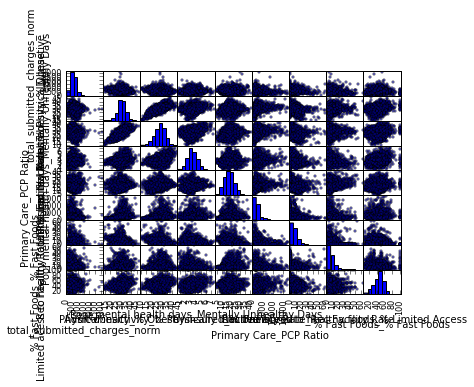

In [862]:
plt.figure(figsize=(10,10))
scatter_matrix(df_model)
plt.show()

In [815]:
df_model['Primary Care_PCP Ratio'] = df_model['Primary Care_PCP Ratio'].apply(lambda x: str(x).split(':')[0])

In [820]:
df_model['Primary Care_PCP Ratio'] = df_model['Primary Care_PCP Ratio'].astype(float)

In [1108]:
df_model.head()

total_submitted_charges_norm  Adult obesity_% Obese  \
01001                    560.764619                   34.1   
01003                    719.903586                   25.5   
01005                    621.280455                   37.0   
01007                    236.284176                   34.0   
01009                    516.343006                   32.0   

       Physical inactivity_% Physically Inactive  \
01001                                       32.2   
01003                                       25.1   
01005                                       34.2   
01007                                       37.2   
01009                                       35.9   

       Poor mental health days_Mentally Unhealthy Days  Uninsured_% Uninsured  \
01001                                              4.3                   13.6   
01003                                              3.8                   19.1   
01005                                              4.1                   18.5   
01007                                              5.3                   17.7   
01009                                              4.0                   19.3   

       Primary Care_PCP Ratio  Rec Facility Rate_Rec Facility Rate  \
01001                    2732                             7.321046   
01003                    1347                             8.730813   
01005                    2283                             3.650968   
01007                    3813                             4.370629   
01009                    4782                             5.227665   

       Limited acess to healthy foods_% Limited Access  \
01001                                         9.793530   
01003                                         5.460261   
01005                                        11.420316   
01007                                         2.144661   
01009                                         1.062468   

       % Fast Foods_% Fast Foods  
01001                  52.173913  
01003                  35.443038  
01005                  55.882353  
01007                  45.454545  
01009                  56.410256

In [1111]:
df_health_drop_irs.shape

(2814, 22)

In [1112]:
df_health_drop_null.shape

(2810, 18)

In [841]:
df_model_drop_null = df_model[df_model.isnull().any(axis=1)==False]

In [842]:
df_model.shape

(3048, 9)

In [843]:
df_model_drop_null.shape

(2677, 9)

In [836]:
from sklearn import linear_model

In [853]:
from sklearn.preprocessing import StandardScaler

In [865]:
y = df_model_drop_null.iloc[:,0].values

In [866]:
X = df_model_drop_null.iloc[:,1:].values

In [840]:
y

Adult obesity_% Obese  Physical inactivity_% Physically Inactive  \
01001                   34.1                                       32.2   
01003                   25.5                                       25.1   
01005                   37.0                                       34.2   
01007                   34.0                                       37.2   
01009                   32.0                                       35.9   
01013                   40.8                                       36.6   
01015                   33.6                                       33.9   
01017                   35.2                                       35.8   
01019                   30.6                                       35.9   
01021                   35.3                                       30.9   
01023                   38.3                                       35.0   
01025                   35.4                                       38.0   
01027                   34.3                                       37.5   
01029                   29.9                                       33.5   
01031                   32.1                                       28.6   
01033                   33.1                                       34.7   
01035                   33.0                                       36.1   
01039                   36.4                                       37.3   
01041                   37.2                                       33.5   
01043                   32.0                                       29.4   
01045                   35.6                                       31.3   
01047                   41.4                                       34.0   
01049                   33.9                                       27.5   
01051                   31.5                                       31.7   
01053                   35.5                                       37.6   
01055                   32.1                                       34.2   
01057                   36.5                                       32.7   
01059                   31.2                                       37.2   
01061                   35.5                                       35.3   
01063                   47.6                                       38.0   
...                      ...                                        ...   
55127                   25.5                                       21.6   
55129                   30.7                                       22.7   
55131                   28.4                                       22.3   
55133                   25.8                                       19.1   
55135                   32.4                                       22.7   
55137                   33.0                                       24.6   
55139                   29.5                                       19.6   
55141                   26.5                                       19.7   
56001                   21.8                                       18.6   
56003                   27.6                                       27.3   
56005                   31.9                                       26.6   
56007                   30.5                                       31.9   
56009                   29.1                                       24.3   
56011                   23.3                                       23.4   
56013                   24.6                                       25.4   
56015                   27.0                                       30.9   
56017                   24.2                                       25.3   
56019                   23.7                                       22.8   
56021                   25.3                                       23.7   
56023                   22.0                                       21.5   
56025                   27.3                                       23.9   
56029                   21.8    

In [855]:
scale = StandardScaler()

In [856]:
X = scale.fit_transform(X)

In [859]:
X

array([[  8.71388867e-01,   8.54356510e-01,   8.61633220e-01, ...,
         -9.49447069e-02,   4.35239064e-01,   5.05026662e-01],
       [ -1.13946552e+00,  -4.79740704e-01,   3.41943212e-01, ...,
          1.15312894e-01,  -2.92467238e-01,  -7.95319541e-01],
       [  1.54946767e+00,   1.23015854e+00,   6.53757217e-01, ...,
         -6.42313324e-01,   7.08432747e-01,   7.93251619e-01],
       ..., 
       [  1.23163979e-01,  -8.55542736e-01,  -7.38087938e-02, ...,
          2.25713378e-01,  -1.95888257e-03,  -1.89077054e-01],
       [ -1.37328579e+00,  -4.42160501e-01,  -1.21712681e+00, ...,
          2.30109084e+00,  -7.49639425e-01,  -7.23769391e-01],
       [ -3.67858603e-01,   1.02752446e-01,  -4.89560800e-01, ...,
          8.90955563e-01,  -5.39505674e-01,  -1.99557331e+00]])

In [847]:
clf = linear_model.LinearRegression()

In [857]:
clf.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [858]:
clf.score(X, y)

0.12974162996859928

In [863]:
from sklearn.ensemble import RandomForestRegressor

In [867]:
from sklearn.cross_validation import train_test_split

In [868]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [878]:
rf_mod = RandomForestRegressor(n_jobs=-1, n_estimators=500, max_features=3)

In [879]:
rf_mod.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=3, max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [880]:
rf_mod.score(X_test, y_test)


0.21644755788331327

(0, 1600)

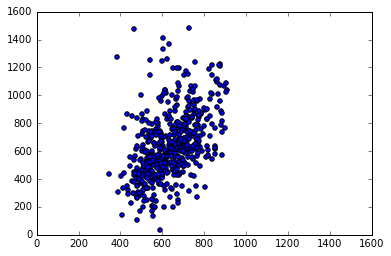

In [885]:
plt.scatter(rf_mod.predict(X_test), y_test)
plt.xlim(0,1600)
plt.ylim(0,1600)

In [886]:
from scipy.stats import linregress

In [887]:
linregress(rf_mod.predict(X_test), y_test)

LinregressResult(slope=1.0069025156700893, intercept=0.83327622783076549, rvalue=0.46575594564240314, pvalue=3.25007969209132e-30, stderr=0.082786413969419118)

In [888]:
.4657**2

0.21687649

In [889]:
df_health_drop_null.head()

num_asthma_norm  num_alzheimers_dementia_norm  \
01001         0.074400                      0.162002   
01003         0.073961                      0.146354   
01005         0.074608                      0.135151   
01007         0.038867                      0.178363   
01009         0.078555                      0.164692   

       num_artrial_fibrillation_norm  num_cancer_norm  \
01001                       0.121805         0.116911   
01003                       0.153738         0.115426   
01005                       0.084487         0.085358   
01007                       0.116495         0.073349   
01009                       0.134349         0.077358   

       num_chronic_obstructive_pulmonary_norm  num_depression_norm  \
01001                                0.206120             0.224531   
01003                                0.181599             0.207669   
01005                                0.152603             0.215572   
01007                                0.164053             0.187311   
01009                                0.254052             0.268837   

       num_diabetes_norm  num_heart_failure_norm  num_hypertension_norm  \
01001           0.378132                0.234742               0.699302   
01003           0.306459                0.206900               0.715701   
01005           0.388831                0.174367               0.725549   
01007           0.380612                0.216608               0.738352   
01009           0.375330                0.266669               0.733709   

       num_ischemic_heart_norm  num_osteoporosis_norm  \
01001                 0.375258               0.069710   
01003                 0.431138               0.078749   
01005                 0.310711               0.055133   
01007                 0.299656               0.050424   
01009                 0.428669               0.072650   

       num_rheumatoid_arthritis_osteoarthirtis_norm  \
01001                                      0.407612   
01003                                      0.482307   
01005                                      0.371228   
01007                                      0.415309   
01009                                      0.404520   

       num_schizophrenia_psychotic_norm  num_stroke_norm  total_hcc_risk_norm  \
01001                          0.052561         0.079124             1.396064   
01003                          0.042576         0.069872             1.263246   
01005                          0.080574         0.056023             1.276637   
01007                          0.061202         0.073323             1.263420   
01009                          0.056010         0.065534             1.381137   

        county  predictions  
01001  Autauga            0  
01003  Baldwin            0  
01005  Barbour            0  
01007     Bibb            0  
01009   Blount            0

In [894]:
df_health_drop_null['total_submitted_charges_norm'] = df_agg['total_submitted_charges_norm'][df_agg.isnull().any(axis=1)==False]

In [921]:
df_health_drop_null.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2814 entries, 01001 to 56045
Data columns (total 18 columns):
num_asthma_norm                                 2814 non-null float64
num_alzheimers_dementia_norm                    2814 non-null float64
num_artrial_fibrillation_norm                   2814 non-null float64
num_cancer_norm                                 2814 non-null float64
num_chronic_obstructive_pulmonary_norm          2814 non-null float64
num_depression_norm                             2814 non-null float64
num_diabetes_norm                               2814 non-null float64
num_heart_failure_norm                          2814 non-null float64
num_hypertension_norm                           2814 non-null float64
num_ischemic_heart_norm                         2814 non-null float64
num_osteoporosis_norm                           2814 non-null float64
num_rheumatoid_arthritis_osteoarthirtis_norm    2814 non-null float64
num_schizophrenia_psychotic_norm                2814 

In [897]:
import statsmodels.api as sm

In [969]:
df_health_drop_null = df_health_drop_null[df_health_drop_null.isnull().any(axis=1)==False]

In [970]:
y = df_health_drop_null.iloc[:,-1].values

In [971]:
X = df_health_drop_null.iloc[:,:-3].values

In [972]:
X = scale.fit_transform(X)
X = sm.add_constant(X)

In [1086]:
X_cancer = df_health_drop_null[['num_cancer_norm', 'num_rheumatoid_arthritis_osteoarthirtis_norm', 'total_hcc_risk_norm']].values

In [1087]:
X_cancer = scale.fit_transform(X_cancer)
#X_cancer = sm.add_constant(X_cancer)

In [973]:
X.shape

(2810, 16)

In [962]:
X[1]

array([ 1.        ,  0.18529445,  0.14226982,  1.15788406,  0.79417773,
       -0.35046308, -0.7545907 , -0.57292573, -0.41934633,  0.64102546,
        0.64087566,  0.2732596 ,  1.16246694, -0.46485741,  0.65200118,
       -0.39639527])

In [963]:
model = sm.OLS(y, X, missing='drop').fit()

In [964]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                     83.47
Date:                Thu, 21 Apr 2016   Prob (F-statistic):          1.69e-211
Time:                        05:21:28   Log-Likelihood:                -18959.
No. Observations:                2810   AIC:                         3.795e+04
Df Residuals:                    2794   BIC:                         3.804e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        646.0563      3.898    165.754      0.000       638.414   653.699
x1            19.7810      6.268      3.156      0.002         7.491    32.071
x2           -10.8908      7.698     -1.415      0.157       -25.984     4.203
x3           -45.6531      6.503     -7.021      0.000       -58.404   -32.902
x4            59.4906      7.298      8.151      0.000        45.180    73.801
x5           -33.3318      7.246     -4.600      0.000       -47.540   -19.123
x6           -26.1349      6.962     -3.754      0.000       -39.787   -12.483
x7           -35.9935      8.221     -4.378      0.000       -52.113   -19.874
x8           -19.3343      8.633     -2.240      0.025       -36.262    -2.406
x9            -7.3451      7.491     -0.981      0.327       -22.034     7.343
x10           38.6861      8.291      4.666      0.000        22.429    54.943
x11            7.2798      5.554      1.311      0.190        -3.611    18.170
x12           49.5765      5.624      8.816      0.000        38.550    60.603
x13          -15.1714      6.494     -2.336      0.020       -27.905    -2.438
x14            5.7109      8.049      0.710      0.478       -10.071    21.493
x15          117.8540      9.682     12.173      0.000        98.869   136.839
==============================================================================
Omnibus:                     1192.809   Durbin-Watson:                   1.779
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13011.034
Skew:                           1.708   Prob(JB):                         0.00
Kurtosis:                      12.973   Cond. No.                         9.11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [982]:
from sklearn.linear_model import LassoCV, Lasso

In [1067]:
lasso_mod = Lasso(fit_intercept=False, alpha=.01, positive=True)

In [992]:
lasso_mod.fit(X, y)

Lasso(alpha=0.01, copy_X=True, fit_intercept=False, max_iter=1000,
   normalize=False, positive=True, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [993]:
lasso_mod.coef_

array([ 646.27594051,    9.41038701,    0.        ,    0.        ,
         63.45190377,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
         36.62818328,    0.        ,    0.        ,   46.97966813])

In [994]:
lasso_mod.score(X,y)

0.24913516199197783

In [1080]:
lasso_mod = Lasso(fit_intercept=True, alpha=.01)

In [1081]:
X_cancer.shape

(2810,)

In [1082]:
lasso_mod.fit(X_cancer.reshape(2810,1), y)
lasso_mod.coef_

array([ 102.37391086])

In [1083]:
lasso_mod.score(X_cancer.reshape(2810,1),y)

0.1705499184232927

In [1084]:
lasso_mod.fit(X[:,4:6], y)
lasso_mod.score(X[:,4:6],y)

0.17793729189299978

In [1085]:
lasso_mod.coef_

array([ 97.40550141,  21.87224777])

### random forest modeling for cost against disease profile (cancer, rheumatoid arthritis, hcc score)

In [1091]:
X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(X_cancer, y, test_size=.2)

In [1105]:
rf_mod = RandomForestRegressor(n_jobs=-1, n_estimators=400, max_features=1)

0.890654563562
0.158996289431


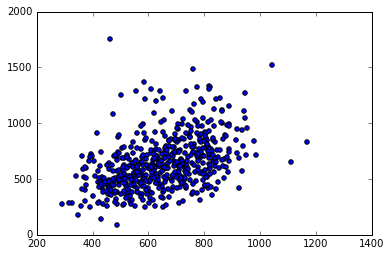

In [1106]:
rf_mod.fit(X_train_cancer, y_train_cancer)
print rf_mod.score(X_train_cancer, y_train_cancer)
print rf_mod.score(X_test_cancer, y_test_cancer)
plt.scatter(rf_mod.predict(X_test_cancer), y_test_cancer)

In [1183]:
import matplotlib

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(X[:,15], y, c=df_health_drop_null['predictions'], alpha=.5)
plt.ylabel('Scaled cost per beneficiary')
plt.xlabel('Scaled health risk score')
plt.ylim(-250, 2450)

(-250, 2450)

In [1175]:
color_orange = '#fc8d59'
color_yellow = '#ffffbf'
color_green = '#99d594'

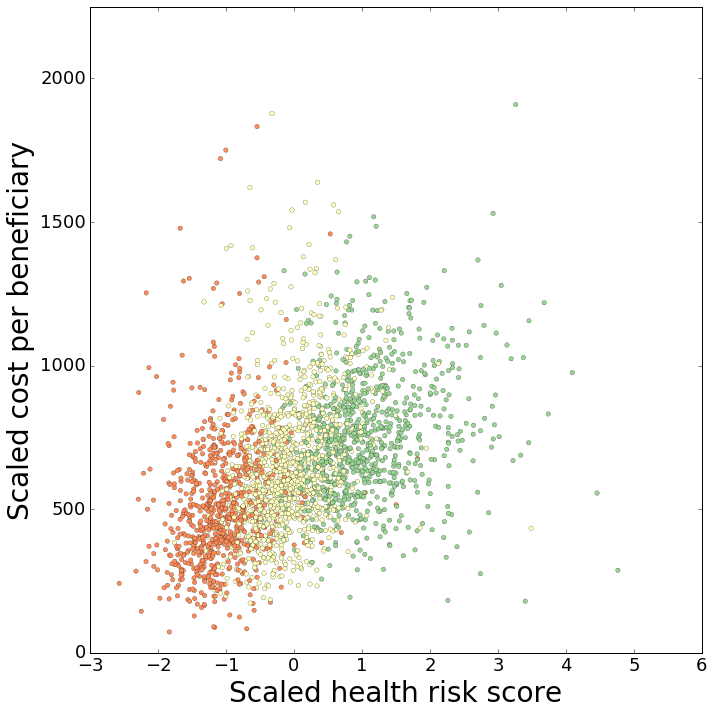

In [1260]:
plt.figure(figsize=(10,10))
plt.scatter(X[:,15], y, c=df_health_drop_null['predictions'], 
            cmap=matplotlib.colors.ListedColormap([color_yellow, color_green, color_orange]),
            linewidth=0.2)
plt.ylabel('Scaled cost per beneficiary', fontsize=28)
plt.xlabel('Scaled health risk score', fontsize=28)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylim(0, 2250)
plt.tight_layout()
plt.savefig('/home/ubuntu/medicare-project/health_cost_scatter.png', edgecolors='none', dpi=300, 
           transparent=True, bbox_inches='tight')

(-250, 2450)

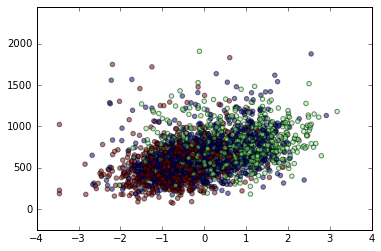

In [1137]:
plt.scatter(X[:,4], y, c=df_health_drop_null['predictions'], alpha=.5)
plt.ylim(-250, 2450)

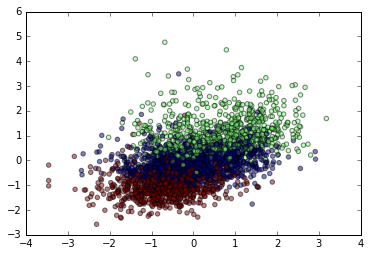

In [1016]:
plt.scatter(X[:,4], X[:,15], c=df_health_drop_null['predictions'], alpha=.5)

Who are those outliers? High cancer and low costs.

In [1161]:
df_health_drop_null['predictions'].value_counts()

0    1251
1     816
2     743
Name: predictions, dtype: int64

In [1002]:
df_health_drop_null[df_health_drop_null['total_submitted_charges_norm']>2000]

num_asthma_norm  num_alzheimers_dementia_norm  \
48489         0.078545                      0.166600   
51193         0.052046                      0.192634   

       num_artrial_fibrillation_norm  num_cancer_norm  \
48489                       0.064303         0.065831   
51193                       0.150208         0.172969   

       num_chronic_obstructive_pulmonary_norm  num_depression_norm  \
48489                                0.148924             0.214510   
51193                                0.179762             0.222813   

       num_diabetes_norm  num_heart_failure_norm  num_hypertension_norm  \
48489           0.535514                0.243128               0.690600   
51193           0.390536                0.212939               0.736443   

       num_ischemic_heart_norm  num_osteoporosis_norm  \
48489                 0.477869               0.100983   
51193                 0.387649               0.043676   

       num_rheumatoid_arthritis_osteoarthirtis_norm  \
48489                                      0.463259   
51193                                      0.310885   

       num_schizophrenia_psychotic_norm  num_stroke_norm  total_hcc_risk_norm  \
48489                          0.018259         0.026890             1.571505   
51193                          0.021399         0.059866             1.435010   

             county  predictions  total_submitted_charges_norm  
48489       Willacy            0                   3108.511024  
51193  Westmoreland            0                   2476.043162

In [1011]:
df_agg[df_agg.index=='51193']

county  num_hcpcs  num_services  num_unique_bene  \
51193  Westmoreland        144         10172             1344   

       total_submitted_charges  total_medicare_allowed_amt  \
51193               3327802.01                  1078836.72   

       total_medicare_payment_amt  total_drug_submitted_charges  \
51193                   817058.81                           145   

       total_drug_medicare_allowed_amt  total_drug_medicare_payment_amt  \
51193                            21.46                            15.21   

              ...           num_diabetes_norm  num_heart_failure_norm  \
51193         ...                    0.390536                0.212939   

       num_hypertension_norm  num_ischemic_heart_norm  num_osteoporosis_norm  \
51193               0.736443                 0.387649               0.043676   

       num_rheumatoid_arthritis_osteoarthirtis_norm  \
51193                                      0.310885   

       num_schizophrenia_psychotic_norm  num_stroke_norm  total_age_norm  \
51193                          0.021399         0.059866       75.427827   

       total_hcc_risk_norm  
51193              1.43501  

[1 rows x 85 columns]

In [1012]:
df_agg[df_agg.index=='48489']

county  num_hcpcs  num_services  num_unique_bene  \
48489  Willacy       1071      138580.2             2900   

       total_submitted_charges  total_medicare_allowed_amt  \
48489               9014681.97                  3498768.48   

       total_medicare_payment_amt  total_drug_submitted_charges  \
48489                  2787203.53                     223781.86   

       total_drug_medicare_allowed_amt  total_drug_medicare_payment_amt  \
48489                         37336.15                         33619.54   

              ...           num_diabetes_norm  num_heart_failure_norm  \
48489         ...                    0.535514                0.243128   

       num_hypertension_norm  num_ischemic_heart_norm  num_osteoporosis_norm  \
48489                 0.6906                 0.477869               0.100983   

       num_rheumatoid_arthritis_osteoarthirtis_norm  \
48489                                      0.463259   

       num_schizophrenia_psychotic_norm  num_stroke_norm  total_age_norm  \
48489                          0.018259          0.02689       72.475172   

       total_hcc_risk_norm  
48489             1.571505  

[1 rows x 85 columns]

In [1006]:
df_agg['county_fips']

01001       58058
01003      406215
01005       28140
01007       12084
01009       22198
01011        7077
01013       32416
01015      274050
01017       36612
01019       25475
01021       33693
01023        9207
01025       37925
01027       12324
01029        5145
01031       82480
01033      170445
01035       10350
01037        1037
01039       69613
01041        9369
01043      220073
01045       42845
01047       73290
01049       79724
01051       56754
01053       55809
01055      362920
01057       19026
01059       48714
           ...   
55129     1819257
55131    14554584
55133    78068328
55135     6009715
55137     1543836
55139    31153535
55141    34352843
56001     5656101
56003      728039
56005     6160550
56007      896112
56009     2016324
56011      224044
56013     7505742
56015     1232330
56017      616187
56019      952323
56021    18262846
56023     2352966
56025    16527375
56027       56027
56029     6891567
56031      784434
56033     5659333
56035     

In [1028]:
def highest_error(predictions, y_test):
    """
    returns ordered list of index with highest error first
    """
    error = np.abs(np.array(predictions) - np.array(y_test))
    return zip(np.argsort(error)[::-1], error[np.argsort(error)[::-1]])

In [1029]:
err_ind = highest_error(lasso_mod.predict(X),df_health_drop_null['predictions'])

In [1039]:
err_ind_first = [x[0] for x in err_ind]

In [1043]:
err_ind_second = [x[1] for x in err_ind]

In [1040]:
err_ind_first

[2462,
 2398,
 1669,
 2356,
 2475,
 1464,
 1198,
 2350,
 182,
 318,
 2295,
 279,
 299,
 1104,
 2066,
 1641,
 1662,
 2326,
 2124,
 176,
 306,
 2272,
 467,
 1595,
 325,
 1180,
 2371,
 285,
 1296,
 323,
 385,
 1167,
 2391,
 199,
 543,
 2316,
 293,
 221,
 667,
 2281,
 2445,
 1319,
 2613,
 1096,
 2412,
 304,
 1014,
 193,
 1117,
 1845,
 2757,
 352,
 1731,
 87,
 582,
 2017,
 290,
 1776,
 2442,
 456,
 173,
 2460,
 570,
 1045,
 1249,
 2619,
 1725,
 1143,
 2625,
 1038,
 1592,
 280,
 316,
 1028,
 388,
 1600,
 178,
 1781,
 327,
 196,
 1668,
 1590,
 1567,
 1597,
 400,
 2038,
 1681,
 1679,
 2337,
 2250,
 1766,
 1197,
 1599,
 331,
 1858,
 948,
 2365,
 2621,
 326,
 232,
 889,
 1447,
 191,
 1594,
 429,
 1682,
 324,
 1601,
 1053,
 1021,
 2421,
 201,
 468,
 2055,
 311,
 549,
 564,
 2623,
 308,
 1608,
 1603,
 322,
 1591,
 218,
 1690,
 1852,
 310,
 2096,
 1604,
 287,
 2332,
 2280,
 1628,
 2630,
 1039,
 1083,
 1877,
 2457,
 2604,
 2165,
 317,
 328,
 2129,
 2062,
 2611,
 2279,
 1190,
 370,
 1303,
 334,
 2063

In [1042]:
df_health_drop_null.iloc[err_ind_first][0:50]

num_asthma_norm  num_alzheimers_dementia_norm  \
48479         0.074851                      0.212610   
48323         0.062900                      0.238359   
36061         0.104075                      0.151703   
48215         0.087837                      0.260998   
48505         0.080698                      0.229899   
29510         0.109697                      0.135758   
26163         0.142045                      0.215498   
48201         0.095656                      0.186937   
06037         0.108029                      0.207629   
12086         0.128003                      0.282170   
48061         0.091356                      0.214433   
11001         0.113378                      0.172052   
12043         0.110000                      0.330000   
24510         0.114444                      0.160398   
42101         0.113327                      0.165250   
36005         0.151159                      0.254080   
36047         0.125244                      0.286255   
48141         0.107307                      0.188451   
45075         0.084477                      0.171287   
06025         0.102630                      0.166265   
12057         0.110852                      0.191573   
48011         0.074558                      0.258783   
13273         0.102403                      0.139894   
34013         0.119540                      0.190665   
12099         0.088068                      0.175834   
26125         0.136670                      0.214676   
48249         0.134687                      0.254283   
12011         0.095508                      0.231381   
28035         0.089432                      0.142967   
12095         0.109550                      0.192964   
13089         0.093426                      0.162181   
26099         0.130252                      0.223033   
48303         0.102437                      0.152868   
06071         0.111057                      0.168819   
17031         0.114026                      0.188908   
48113         0.113719                      0.191052   
12031         0.107490                      0.170870   
08001         0.091234                      0.103762   
18089         0.119938                      0.190052   
48029         0.101501                      0.172624   
48439         0.119171                      0.205021   
28083         0.072316                      0.156579   
51650         0.120713                      0.139162   
24033         0.103600                      0.165012   
48355         0.122867                      0.217498   
12053         0.083395                      0.163044   
22017         0.074917                      0.159165   
06059         0.098277                      0.176059   
25025         0.113894                      0.125680   
39035         0.123581                      0.171497   

       num_artrial_fibrillation_norm  num_cancer_norm  \
48479                       0.049245         0.079921   
48323                       0.065060         0.064490   
36061                       0.145205         0.180211   
48215                       0.111272         0.090024   
48505                       0.050642         0.072719   
29510                       0.157773         0.166406   
26163                       0.147770         0.140949   
48201                       0.151805         0.149299   
06037                       0.138613         0.130424   
12086                       0.142286         0.137558   
48061                       0.121736         0.104609   
11001                       0.128964         0.152663   
12043                       0.180000         0.160000   
24510                       0.167843         0.158015   
42101                       0.177366         0.163449   
36005                       0.148047         0.125122   
36047                       0.147453         0.119828   
48141                       0.100017         0.104345   
45075                       0.116109         0.122762   
06025     

(array([   1.,    0.,    0.,    2.,    1.,   12.,   17.,   37.,   78.,
         103.,  150.,  238.,  247.,  266.,  237.,  272.,  226.,  199.,
         195.,  130.,  125.,   89.,   67.,   39.,   35.,   14.,   13.,
           7.,    6.,    4.]),
 array([  140.79961781,   173.73112222,   206.66262664,   239.59413105,
          272.52563546,   305.45713988,   338.38864429,   371.32014871,
          404.25165312,   437.18315753,   470.11466195,   503.04616636,
          535.97767077,   568.90917519,   601.8406796 ,   634.77218401,
          667.70368843,   700.63519284,   733.56669725,   766.49820167,
          799.42970608,   832.36121049,   865.29271491,   898.22421932,
          931.15572373,   964.08722815,   997.01873256,  1029.95023697,
         1062.88174139,  1095.8132458 ,  1128.74475021]),
 <a list of 30 Patch objects>)

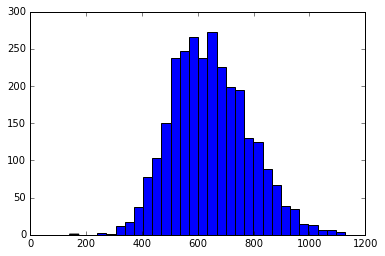

In [1045]:
plt.hist(err_ind_second, bins=30)

### Try to model clusters instead of costs

In [1126]:
df_model.shape

(3048, 9)

In [1125]:
df_health_drop_null.shape

(2810, 18)

In [1129]:
df_model_pred = pd.merge(df_model, df_health_drop_null[['predictions', 'county']], left_index=True, right_index=True)

In [1130]:
df_model_pred.columns

Index([                   u'total_submitted_charges_norm',
                                 u'Adult obesity_% Obese',
             u'Physical inactivity_% Physically Inactive',
       u'Poor mental health days_Mentally Unhealthy Days',
                                 u'Uninsured_% Uninsured',
                                u'Primary Care_PCP Ratio',
                   u'Rec Facility Rate_Rec Facility Rate',
       u'Limited acess to healthy foods_% Limited Access',
                             u'% Fast Foods_% Fast Foods',
                                           u'predictions',
                                                u'county'],
      dtype='object')

In [1131]:
df_model_pred.to_csv('../data/demo_cluster_data.csv', index=False)

In [1141]:
df_all.head()

npi  last_name first_name        credentials gender        city  \
0  1003000126  ENKESHAFI    ARDALAN                 MD      M  CUMBERLAND   
1  1003892589     GARROW     GEORGE                 MD      M  CUMBERLAND   
2  1003951625   MATYASIK    STANLEY                 DO      M  CUMBERLAND   
3  1003975400       WILT       MARK                P A      M  CUMBERLAND   
4  1013224534     MORRIS     CONNIE  MSN, CRNP, FNP-BC      F      LAVALE   

  state        provider_type  num_hcpcs  num_services         ...           \
0    MD    Internal Medicine         22          1648         ...            
1    MD     Medical Oncology         10            67         ...            
2    MD    Pulmonary Disease         18          2914         ...            
3    MD  Physician Assistant         33           177         ...            
4    MD   Nurse Practitioner         11           399         ...            

   num_diabetes_norm  num_heart_failure_norm  num_hypertension_norm  \
0               0.54                    0.50                   0.75   
1               0.28                     NaN                   0.72   
2               0.47                    0.49                   0.75   
3               0.46                    0.51                   0.75   
4               0.30                    0.13                   0.72   

   num_ischemic_heart_norm  num_osteoporosis_norm  \
0                     0.67                   0.13   
1                     0.61                    NaN   
2                     0.64                   0.13   
3                     0.75                    NaN   
4                     0.33                   0.09   

   num_rheumatoid_arthritis_osteoarthirtis_norm  \
0                                          0.47   
1                                          0.33   
2                                          0.50   
3                                          0.53   
4                                          0.39   

   num_schizophrenia_psychotic_norm  num_stroke_norm  total_age_norm  \
0                              0.16             0.20              74   
1                               NaN              NaN              74   
2                              0.10             0.13              73   
3                               NaN             0.09              74   
4                              0.09             0.09              66   

   total_hcc_risk_norm  
0               2.1082  
1               1.7697  
2               2.0689  
3               1.9529  
4               1.0565  

[5 rows x 123 columns]

In [1142]:
df_agg.head()

county  num_hcpcs  num_services  num_unique_bene  \
01001  Autauga       2057      120187.0            20422   
01003  Baldwin      19299     1163082.5           175932   
01005  Barbour       1232       66673.0            10459   
01007     Bibb        230        7221.0             1863   
01009   Blount        751       28179.0             6268   

       total_submitted_charges  total_medicare_allowed_amt  \
01001             1.145194e+07                  5956382.03   
01003             1.266541e+08                 55270877.03   
01005             6.497972e+06                  3083129.17   
01007             4.401974e+05                   324498.09   
01009             3.236438e+06                  1375023.41   

       total_medicare_payment_amt  total_drug_submitted_charges  \
01001                  4324099.62                     244226.92   
01003                 41193530.17                   10607775.70   
01005                  2230230.81                     118654.44   
01007                   223085.76                       2457.00   
01009                   994906.69                      43170.07   

       total_drug_medicare_allowed_amt  total_drug_medicare_payment_amt  \
01001                         73437.42                         62030.85   
01003                       5245876.44                       4107579.47   
01005                         47520.71                         42734.62   
01007                          1977.55                          1922.51   
01009                         17335.15                         16080.00   

              ...           num_diabetes_norm  num_heart_failure_norm  \
01001         ...                    0.378132                0.234742   
01003         ...                    0.306459                0.206900   
01005         ...                    0.388831                0.174367   
01007         ...                    0.380612                0.216608   
01009         ...                    0.375330                0.266669   

       num_hypertension_norm  num_ischemic_heart_norm  num_osteoporosis_norm  \
01001               0.699302                 0.375258               0.069710   
01003               0.715701                 0.431138               0.078749   
01005               0.725549                 0.310711               0.055133   
01007               0.738352                 0.299656               0.050424   
01009               0.733709                 0.428669               0.072650   

       num_rheumatoid_arthritis_osteoarthirtis_norm  \
01001                                      0.407612   
01003                                      0.482307   
01005                                      0.371228   
01007                                      0.415309   
01009                                      0.404520   

       num_schizophrenia_psychotic_norm  num_stroke_norm  total_age_norm  \
01001                          0.052561         0.079124       71.204192   
01003                          0.042576         0.069872       72.597418   
01005                          0.080574         0.056023       68.487523   
01007                          0.061202         0.073323       72.056361   
01009                          0.056010         0.065534       70.764040   

       total_hcc_risk_norm  
01001             1.396064  
01003             1.263246  
01005             1.276637  
01007             1.263420  
01009             1.381137  

[5 rows x 85 columns]

In [1143]:
df

['total_submitted_charges_norm']

In [1154]:
df_health_null_fill.index = [str(x).zfill(5) for x in df_health_null_fill.index.values]

In [1147]:
df_all['county_fips']

0         24001
1         24001
2         24001
3         24001
4         24001
5         24001
6         24001
7         24001
8         24001
9         24001
10        24001
11        24001
12        24001
13        24001
14        24001
15        24001
16        24001
17        24001
18        24001
19        24001
20        24001
21        24001
22        24001
23        24001
24        24001
25        24001
26        24001
27        24001
28        24001
29        24001
          ...  
891714    27049
891715    26063
891716    12105
891717    37175
891718     6053
891719    23029
891720    35043
891721    40101
891722    42131
891723    26139
891724    51660
891725     1009
891726    44007
891727    42129
891728    28111
891729     6029
891730    25003
891731    38101
891732    39133
891733    12009
891734    19085
891735    36101
891736    35013
891737    37067
891738     6081
891739    50025
891740    54099
891741    48339
891742     8097
878037    53520
Name: county_fips, dtype

In [1150]:
df_all['county_fip'] = df_all['county_fips'].apply(lambda x: str(x).zfill(5))

In [1156]:
df_health_null_fill.columns

Index([                                                                u'county_fips',
                                                                    u'num_hcpcs_norm',
                                                                 u'num_services_norm',
                                                      u'total_submitted_charges_norm',
                                                   u'total_medicare_payment_amt_norm',
                                                 u'total_drug_submitted_charges_norm',
                                              u'total_drug_medicare_payment_amt_norm',
                                                u'num_hcpcs_associated_med_srvc_norm',
                                                                 u'num_med_srvc_norm',
                                                  u'total_med_submitted_charges_norm',
                                               u'total_med_medicare_payment_amt_norm',
                                           

In [ ]:
df_fips_predictions = pd.merge(df_all[['county_fip', 'prediction']])

In [1159]:
df_health_null_fill['predictions'].to_csv('/home/ubuntu/medicare-project/data/fips_predictions.csv')

In [1160]:
df_health_null_fill['predictions'].value_counts()

0    2899
2     118
1      31
Name: predictions, dtype: int64

In [1163]:
df_health_drop_null.index

Index([u'01001', u'01003', u'01005', u'01007', u'01009', u'01011', u'01013',
       u'01015', u'01017', u'01019',
       ...
       u'56025', u'56029', u'56031', u'56033', u'56035', u'56037', u'56039',
       u'56041', u'56043', u'56045'],
      dtype='object', length=2810)

In [1164]:
df_health_drop_null['predictions'].to_csv('/home/ubuntu/medicare-project/data/fips_predictions.csv')

In [1197]:
cluster_dict

{'16079': 2,
 '33017': 0,
 '16073': 2,
 '16071': 1,
 '16077': 2,
 '16075': 2,
 '48093': 1,
 '06115': 1,
 '06111': 1,
 '06113': 2,
 '01129': 0,
 '40145': 0,
 '19159': 0,
 '39109': 1,
 '19155': 0,
 '39105': 0,
 '19157': 2,
 '39107': 0,
 '19151': 2,
 '39101': 1,
 '19153': 0,
 '39103': 1,
 '40029': 0,
 '40143': 1,
 '48025': 1,
 '22009': 1,
 '40027': 1,
 '22001': 1,
 '22003': 1,
 '22005': 0,
 '01123': 0,
 '22007': 0,
 '06029': 1,
 '46113': 0,
 '06021': 0,
 '40023': 1,
 '06023': 0,
 '06025': 1,
 '06027': 2,
 '27173': 2,
 '27171': 2,
 '33013': 0,
 '21101': 0,
 '21103': 0,
 '21105': 0,
 '21107': 1,
 '21109': 2,
 '32013': 2,
 '51840': 1,
 '32017': 2,
 '47081': 0,
 '32019': 2,
 '26157': 1,
 '42055': 1,
 '26155': 0,
 '42057': 0,
 '12019': 1,
 '42051': 0,
 '26151': 1,
 '42053': 1,
 '12015': 1,
 '12017': 1,
 '12011': 1,
 '42059': 0,
 '12013': 0,
 '51115': 2,
 '46009': 2,
 '55109': 2,
 '51111': 0,
 '51113': 2,
 '51119': 2,
 '53007': 0,
 '46005': 2,
 '17031': 1,
 '17033': 0,
 '48021': 0,
 '17035': 2,

In [ ]:
index = ['']

### Finding some representative cities/counties in each cluster

In [1207]:
df_cluster_dict = pd.DataFrame(cluster_dict, index=['county code'])

In [1210]:
df_cluster_dict = df_cluster_dict.T

In [1211]:
df_cluster_dict.columns=['cluster']

In [1214]:
df_cluster_dict['cluster'].value_counts()

0    1252
1     817
2     745
Name: cluster, dtype: int64

In [1215]:
df_agg_preds = pd.merge(df_cluster_dict, df_agg, right_index=True, left_index=True)

In [1218]:
df_agg_preds[df_agg_preds['county']=='King']

cluster county  num_hcpcs  num_services  num_unique_bene  \
53033        0   King     237358     8290819.8          1653102   

       total_submitted_charges  total_medicare_allowed_amt  \
53033             1.318669e+09                5.080013e+08   

       total_medicare_payment_amt  total_drug_submitted_charges  \
53033                 382101410.6                  1.012259e+08   

       total_drug_medicare_allowed_amt         ...           \
53033                      52926158.71         ...            

       num_diabetes_norm  num_heart_failure_norm  num_hypertension_norm  \
53033           0.285918                0.215926               0.616103   

       num_ischemic_heart_norm  num_osteoporosis_norm  \
53033                 0.317185               0.073886   

       num_rheumatoid_arthritis_osteoarthirtis_norm  \
53033                                      0.365184   

       num_schizophrenia_psychotic_norm  num_stroke_norm  total_age_norm  \
53033                           0.04622         0.055925        72.46921   

       total_hcc_risk_norm  
53033             1.532218  

[1 rows x 86 columns]

In [1220]:
df_cluster0 = df_agg_preds[df_agg_preds['cluster']==0]

In [1221]:
df_agg_preds[df_agg_preds['county']=='San Francisco']

cluster         county  num_hcpcs  num_services  num_unique_bene  \
06075        0  San Francisco      80965     3171797.3           718928   

       total_submitted_charges  total_medicare_allowed_amt  \
06075             7.818280e+08                2.431139e+08   

       total_medicare_payment_amt  total_drug_submitted_charges  \
06075                1.844768e+08                   52544972.58   

       total_drug_medicare_allowed_amt         ...           \
06075                      26053144.21         ...            

       num_diabetes_norm  num_heart_failure_norm  num_hypertension_norm  \
06075           0.324272                0.217996               0.665101   

       num_ischemic_heart_norm  num_osteoporosis_norm  \
06075                 0.335634               0.102297   

       num_rheumatoid_arthritis_osteoarthirtis_norm  \
06075                                      0.372235   

       num_schizophrenia_psychotic_norm  num_stroke_norm  total_age_norm  \
06075                          0.043817         0.068892       72.317889   

       total_hcc_risk_norm  
06075             1.662875  

[1 rows x 86 columns]

In [1222]:
df_agg_preds[df_agg_preds['county']=='Santa Clara']

cluster       county  num_hcpcs  num_services  num_unique_bene  \
06085        0  Santa Clara     130764     7162983.5          1192122   

       total_submitted_charges  total_medicare_allowed_amt  \
06085             1.213229e+09                4.586244e+08   

       total_medicare_payment_amt  total_drug_submitted_charges  \
06085                3.506235e+08                   94459914.99   

       total_drug_medicare_allowed_amt         ...           \
06085                      40801971.79         ...            

       num_diabetes_norm  num_heart_failure_norm  num_hypertension_norm  \
06085           0.320791                0.205899               0.648928   

       num_ischemic_heart_norm  num_osteoporosis_norm  \
06085                 0.328299               0.105084   

       num_rheumatoid_arthritis_osteoarthirtis_norm  \
06085                                      0.338971   

       num_schizophrenia_psychotic_norm  num_stroke_norm  total_age_norm  \
06085                           0.03162         0.061733       73.788606   

       total_hcc_risk_norm  
06085              1.45504  

[1 rows x 86 columns]

In [1224]:
df_agg_preds[df_agg_preds['county']=='Denver']

cluster  county  num_hcpcs  num_services  num_unique_bene  \
08031        0  Denver      61108       3349573           437814   

       total_submitted_charges  total_medicare_allowed_amt  \
08031             4.235257e+08                1.638379e+08   

       total_medicare_payment_amt  total_drug_submitted_charges  \
08031                1.241655e+08                   86534246.25   

       total_drug_medicare_allowed_amt         ...           \
08031                      38765394.56         ...            

       num_diabetes_norm  num_heart_failure_norm  num_hypertension_norm  \
08031           0.277818                0.211573               0.620266   

       num_ischemic_heart_norm  num_osteoporosis_norm  \
08031                 0.329618               0.101553   

       num_rheumatoid_arthritis_osteoarthirtis_norm  \
08031                                      0.426325   

       num_schizophrenia_psychotic_norm  num_stroke_norm  total_age_norm  \
08031                          0.050513         0.051823       71.284347   

       total_hcc_risk_norm  
08031             1.614001  

[1 rows x 86 columns]

In [1232]:
df_agg_preds[df_agg_preds['county']=='Multnomah']

cluster     county  num_hcpcs  num_services  num_unique_bene  \
41051        0  Multnomah      97627     2768009.8           551160   

       total_submitted_charges  total_medicare_allowed_amt  \
41051             5.019101e+08                1.608165e+08   

       total_medicare_payment_amt  total_drug_submitted_charges  \
41051                1.212956e+08                   55558699.95   

       total_drug_medicare_allowed_amt         ...           \
41051                      22645130.74         ...            

       num_diabetes_norm  num_heart_failure_norm  num_hypertension_norm  \
41051           0.310324                0.253217               0.628689   

       num_ischemic_heart_norm  num_osteoporosis_norm  \
41051                 0.338438               0.078217   

       num_rheumatoid_arthritis_osteoarthirtis_norm  \
41051                                      0.349218   

       num_schizophrenia_psychotic_norm  num_stroke_norm  total_age_norm  \
41051                          0.048473         0.058557       70.433339   

       total_hcc_risk_norm  
41051             1.651776  

[1 rows x 86 columns]

In [1233]:
df_agg_preds[df_agg_preds['county']=='Orleans']

cluster   county  num_hcpcs  num_services  num_unique_bene  \
22071        1  Orleans      31088      860629.1           227346   
36073        0  Orleans       1096       32884.0             8484   
50019        2  Orleans       1038       53377.5             9022   

       total_submitted_charges  total_medicare_allowed_amt  \
22071             1.816731e+08                 66070602.57   
36073             3.615230e+06                  1868852.61   
50019             6.526239e+06                  2924481.31   

       total_medicare_payment_amt  total_drug_submitted_charges  \
22071                 49668494.10                   11941415.87   
36073                  1349166.90                      28495.00   
50019                  2149025.67                     387612.56   

       total_drug_medicare_allowed_amt         ...           \
22071                       6965828.79         ...            
36073                         17597.64         ...            
50019                        245539.80         ...            

       num_diabetes_norm  num_heart_failure_norm  num_hypertension_norm  \
22071           0.402885                0.297985               0.723284   
36073           0.355383                0.255794               0.689188   
50019           0.302118                0.156376               0.573506   

       num_ischemic_heart_norm  num_osteoporosis_norm  \
22071                 0.414960               0.064242   
36073                 0.457824               0.079455   
50019                 0.282625               0.052444   

       num_rheumatoid_arthritis_osteoarthirtis_norm  \
22071                                      0.409234   
36073                                      0.405890   
50019                                      0.313797   

       num_schizophrenia_psychotic_norm  num_stroke_norm  total_age_norm  \
22071                          0.076622         0.092289       67.947525   
36073                          0.053357         0.073731       69.987860   
50019                          0.037712         0.030577       71.512082   

       total_hcc_risk_norm  
22071             1.932526  
36073             1.373027  
50019             1.173908  

[3 rows x 86 columns]

In [1234]:
df_agg_preds[df_agg_preds['county']=='Cook']

cluster county  num_hcpcs  num_services  num_unique_bene  \
13075        1   Cook        487       18631.0             3378   
17031        1   Cook     546147    35530218.1          6337634   
27031        2   Cook        129        3000.0              906   

       total_submitted_charges  total_medicare_allowed_amt  \
13075             2.241751e+06                1.218987e+06   
17031             5.881705e+09                2.111182e+09   
27031             3.482470e+05                9.486717e+04   

       total_medicare_payment_amt  total_drug_submitted_charges  \
13075                8.925199e+05                  2.172680e+04   
17031                1.601108e+09                  5.444538e+08   
27031                6.844878e+04                  0.000000e+00   

       total_drug_medicare_allowed_amt         ...           \
13075                     9.718680e+03         ...            
17031                     2.247927e+08         ...            
27031                     0.000000e+00         ...            

       num_diabetes_norm  num_heart_failure_norm  num_hypertension_norm  \
13075           0.391901                0.287676               0.727543   
17031           0.399734                0.321895               0.716334   
27031           0.222417                0.179768               0.618587   

       num_ischemic_heart_norm  num_osteoporosis_norm  \
13075                 0.410222               0.057330   
17031                 0.462431               0.108520   
27031                 0.252031               0.031567   

       num_rheumatoid_arthritis_osteoarthirtis_norm  \
13075                                      0.462652   
17031                                      0.499785   
27031                                      0.350839   

       num_schizophrenia_psychotic_norm  num_stroke_norm  total_age_norm  \
13075                          0.096957         0.068786       70.038484   
17031                          0.080557         0.097343       73.110850   
27031                          0.014128         0.025784       74.763797   

       total_hcc_risk_norm  
13075             1.543881  
17031             1.816476  
27031             1.022441  

[3 rows x 86 columns]

In [1242]:
df_agg_preds[df_agg_preds['cluster']==2]

cluster                county  num_hcpcs  num_services  \
01023        2               Choctaw        589       72989.0   
01075        2                 Lamar        149       21167.0   
01087        2                 Macon        197        6375.0   
01131        2                Wilcox        163       11244.0   
02050        2                Bethel        417        5577.0   
02090        2  Fairbanks North Star       9047      285065.0   
02110        2                Juneau       3925       67309.0   
02122        2       Kenai Peninsula       4412       99087.0   
02130        2     Ketchikan Gateway        848       15477.0   
02150        2         Kodiak Island        669       10300.0   
02170        2     Matanuska-Susitna       5920      239933.8   
02220        2                 Sitka        859       14725.0   
02261        2        Valdez-Cordova        404        4112.5   
02290        2         Yukon-Koyukuk        346        6404.0   
04001        2                Apache       3005       72932.0   
04003        2               Cochise       6617      324967.0   
04009        2                Graham       1954       56817.0   
04011        2              Greenlee        648        8669.0   
04017        2                Navajo       8567      272105.0   
04023        2            Santa Cruz        801       18881.0   
05013        2               Calhoun         99        5129.0   
05021        2                  Clay        484       16879.0   
05023        2              Cleburne       1050       80142.0   
05029        2                Conway       1374       49818.0   
05037        2                 Cross        751       42114.0   
05047        2              Franklin        617       30353.0   
05049        2                Fulton        492       21283.0   
05053        2                 Grant        593       41093.0   
05065        2                 Izard        269       11516.0   
05071        2               Johnson       1842       76550.5   
...        ...                   ...        ...           ...   
55111        2                  Sauk       6779      143631.7   
55113        2                Sawyer       2433       75390.0   
55115        2               Shawano       3633      131297.0   
55117        2             Sheboygan      14014      584965.0   
55119        2                Taylor        318       12282.0   
55121        2           Trempealeau        562       16094.0   
55123        2                Vernon       1234       43480.0   
55125        2                 Vilas       2307       69189.0   
55129        2              Washburn       1515       54186.0   
55131        2            Washington       9664      314383.0   
55135        2               Waupaca       6307      136621.0   
56001        2                Albany       2676       78866.0   
56003        2              Big Horn        304       11800.0   
56005        2              Campbell       3020       71168.0   
56007        2                Carbon        448        9048.0   
56009        2              Converse       1077       32112.0   
56011        2                 Crook         35        6398.0   
56013        2               Fremont       5024      142613.0   
56015        2                Goshen        831       32773.0   
56019        2               Johnson        353        5798.2   
56023        2               Lincoln       1565       48057.0   
56029        2                  Park       4497      173561.0   
56031        2                Platte        438       20867.0   
56033        2              Sheridan       3279       99931.0   
56035        2              Sublette        798       12032.0   
56037        2            Sweetwater       2818       75621.0   
56039        2                 Teton       4232      118872.0   
56041        2                 Uinta       1416       39314.6   
56043        2              Washakie        569       14830.0   
56045        2                Weston      

In [1251]:
df_agg_preds[df_agg_preds['county']=='Spokane']

cluster   county  num_hcpcs  num_services  num_unique_bene  \
53063        0  Spokane      82943     5057811.4           582258   

       total_submitted_charges  total_medicare_allowed_amt  \
53063             5.350592e+08                2.084039e+08   

       total_medicare_payment_amt  total_drug_submitted_charges  \
53063                1.578921e+08                   97193645.02   

       total_drug_medicare_allowed_amt         ...           \
53063                      43706591.46         ...            

       num_diabetes_norm  num_heart_failure_norm  num_hypertension_norm  \
53063           0.302201                0.214321               0.629831   

       num_ischemic_heart_norm  num_osteoporosis_norm  \
53063                 0.336309               0.097344   

       num_rheumatoid_arthritis_osteoarthirtis_norm  \
53063                                      0.419055   

       num_schizophrenia_psychotic_norm  num_stroke_norm  total_age_norm  \
53063                          0.060922         0.057312       72.371426   

       total_hcc_risk_norm  
53063              1.44585  

[1 rows x 86 columns]

In [1249]:
df_agg_preds[df_agg_preds['cluster']==2][550:600]

cluster       county  num_hcpcs  num_services  num_unique_bene  \
41061        2        Union       1749       75131.1            15062   
41063        2      Wallowa        520       16033.0             3187   
41065        2        Wasco       3623       96760.0            30665   
45005        2    Allendale        286        4403.0             1208   
45013        2     Beaufort      18391     1858040.0           238940   
45081        2       Saluda        128        7056.0             1332   
46005        2       Beadle       2161       96937.0            10475   
46009        2    Bon Homme        337        6386.0             1450   
46011        2    Brookings       3369      102507.0            13175   
46015        2        Brule        537       11425.0             2171   
46019        2        Butte        400       11396.0             2162   
46023        2  Charles Mix        794       19561.0             2935   
46027        2         Clay       1050       31984.0             3763   
46033        2       Custer        282        4526.0             1096   
46035        2      Davison       4131      216835.0            31683   
46037        2          Day        161        6053.0              908   
46041        2        Dewey        273        4014.0              949   
46047        2   Fall River        187        6236.0             1939   
46051        2        Grant        331        9291.0             2572   
46065        2       Hughes       3069       66568.0            17471   
46067        2   Hutchinson        296        6501.0             1735   
46077        2    Kingsbury        195        5588.0             1618   
46079        2         Lake        697       26639.0             4554   
46081        2     Lawrence       4375      111899.0            23462   
46087        2       McCook        248       19050.0             3607   
46091        2     Marshall        164        6054.0             1511   
46093        2        Meade       1424       31233.0             5761   
46101        2        Moody         25        2253.0              587   
46123        2        Tripp        563       18677.0             2275   
46125        2       Turner         58        6807.0             1013   
46129        2     Walworth        167        7168.0             1907   
46135        2      Yankton       8299      489201.0            39413   
47005        2       Benton        720       72851.0             4893   
47023        2      Chester       1537       68421.0             6421   
47091        2      Johnson        348       13706.0             2144   
47101        2        Lewis        537       18534.0             3816   
47161        2      Stewart        276       16920.0             2808   
48043        2     Brewster        718       19403.0             4267   
48111        2       Dallam        118        2902.0              673   
48211        2     Hemphill        275        7577.0             1442   
48243        2   Jeff Davis        113        4156.0              483   
48287        2          Lee        170       20191.0             1474   
48307        2    McCulloch        148        4985.0             1481   
48343        2       Morris        158       17041.0             1164   
48357        2    Ochiltree        324       18284.0             2138   
48369        2       Parmer        195        8031.0             1124   
48377        2     Presidio        197        4168.0              706   
48379        2        Rains         46        8861.0              730   
48417        2  Shackelford        156        4656.0              857   
48437        2      Swisher         99        2295.0              705   

       total_submitted_charges  total_medicare_allowed_amt  \
41061             8.802873e+06                  4235871.13   
41063             1.143420e+06                   738889.65   
41065             1.627149e+07                  6691084.63   
45005             1.785687e+05     